In [4]:
import tabula
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
import operator as op
from scipy import stats
from  matplotlib.ticker import PercentFormatter
from scipy.stats import ttest_ind

In [7]:
#Import reference tables as data frames
ref_dir = '/Users/Derek/Downloads/sfl_adu_ref_range_table_1.csv'
ref = pd.read_csv(ref_dir)

#Import Immunophenotyping data
wd_dir = '/Users/Derek/Downloads/immunophenotyping.xlsx'
wd = pd.read_excel(wd_dir, None)
for each in wd: 
    wd[each] = wd[each].iloc[:,:29]

/Users/Derek/opt/anaconda3/lib/python3.8/site-packages/seaborn/utils.py:189: FutureWarning: This function is deprecated and will be removed in a future version
  warnings.warn(msg, FutureWarning)


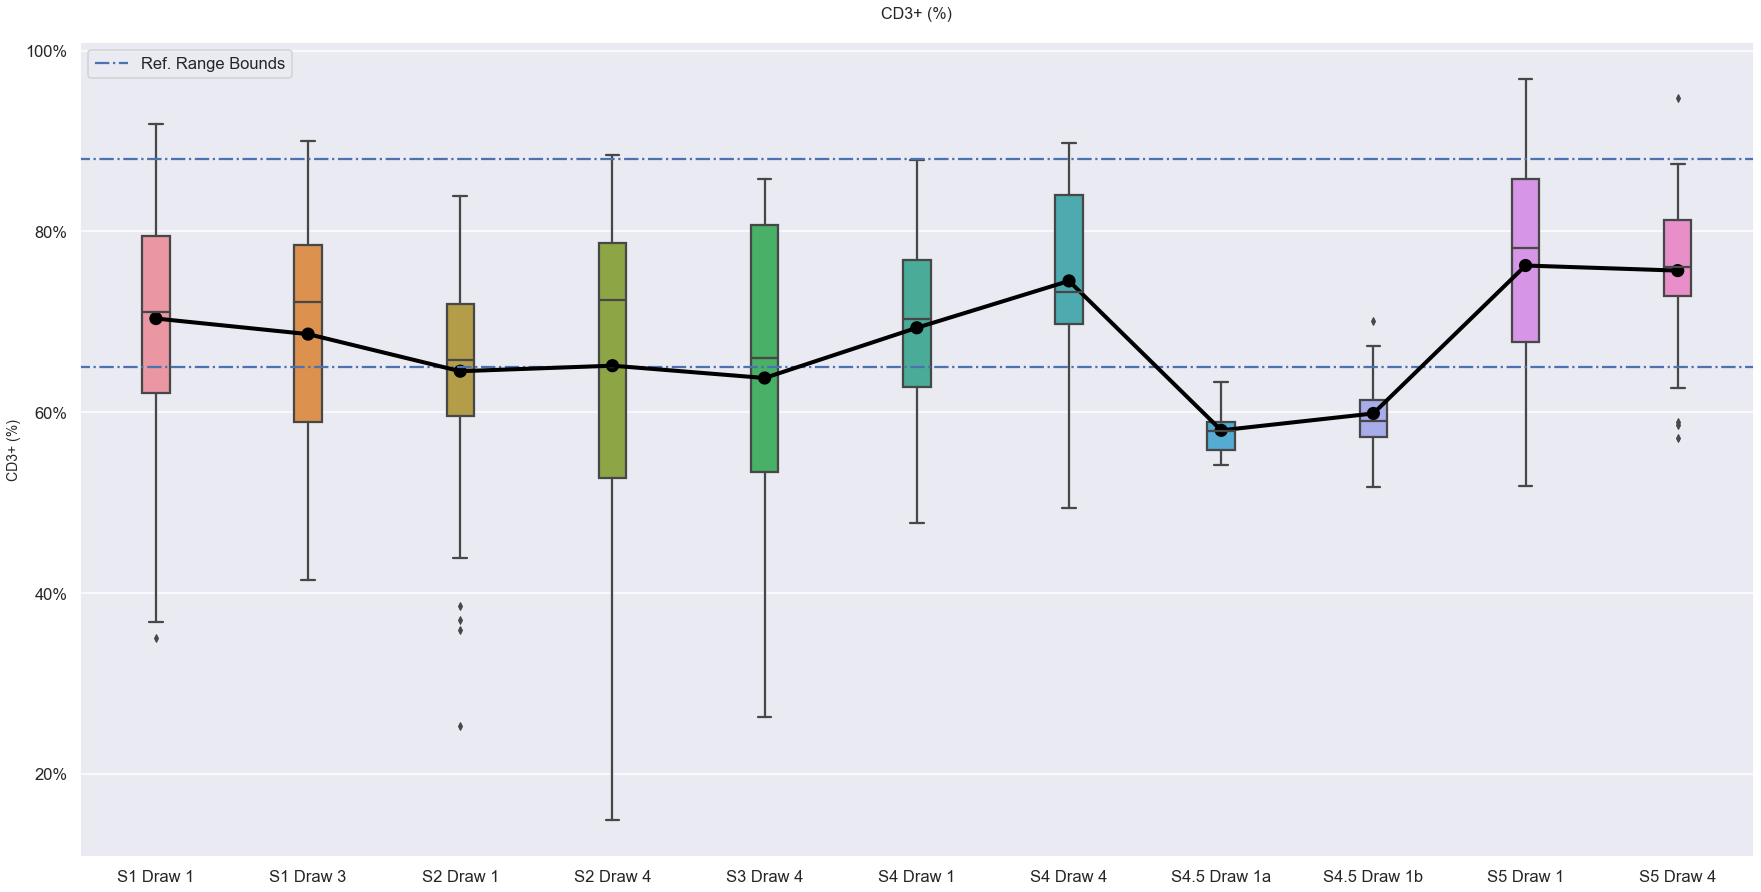

/Users/Derek/opt/anaconda3/lib/python3.8/site-packages/seaborn/utils.py:189: FutureWarning: This function is deprecated and will be removed in a future version
  warnings.warn(msg, FutureWarning)


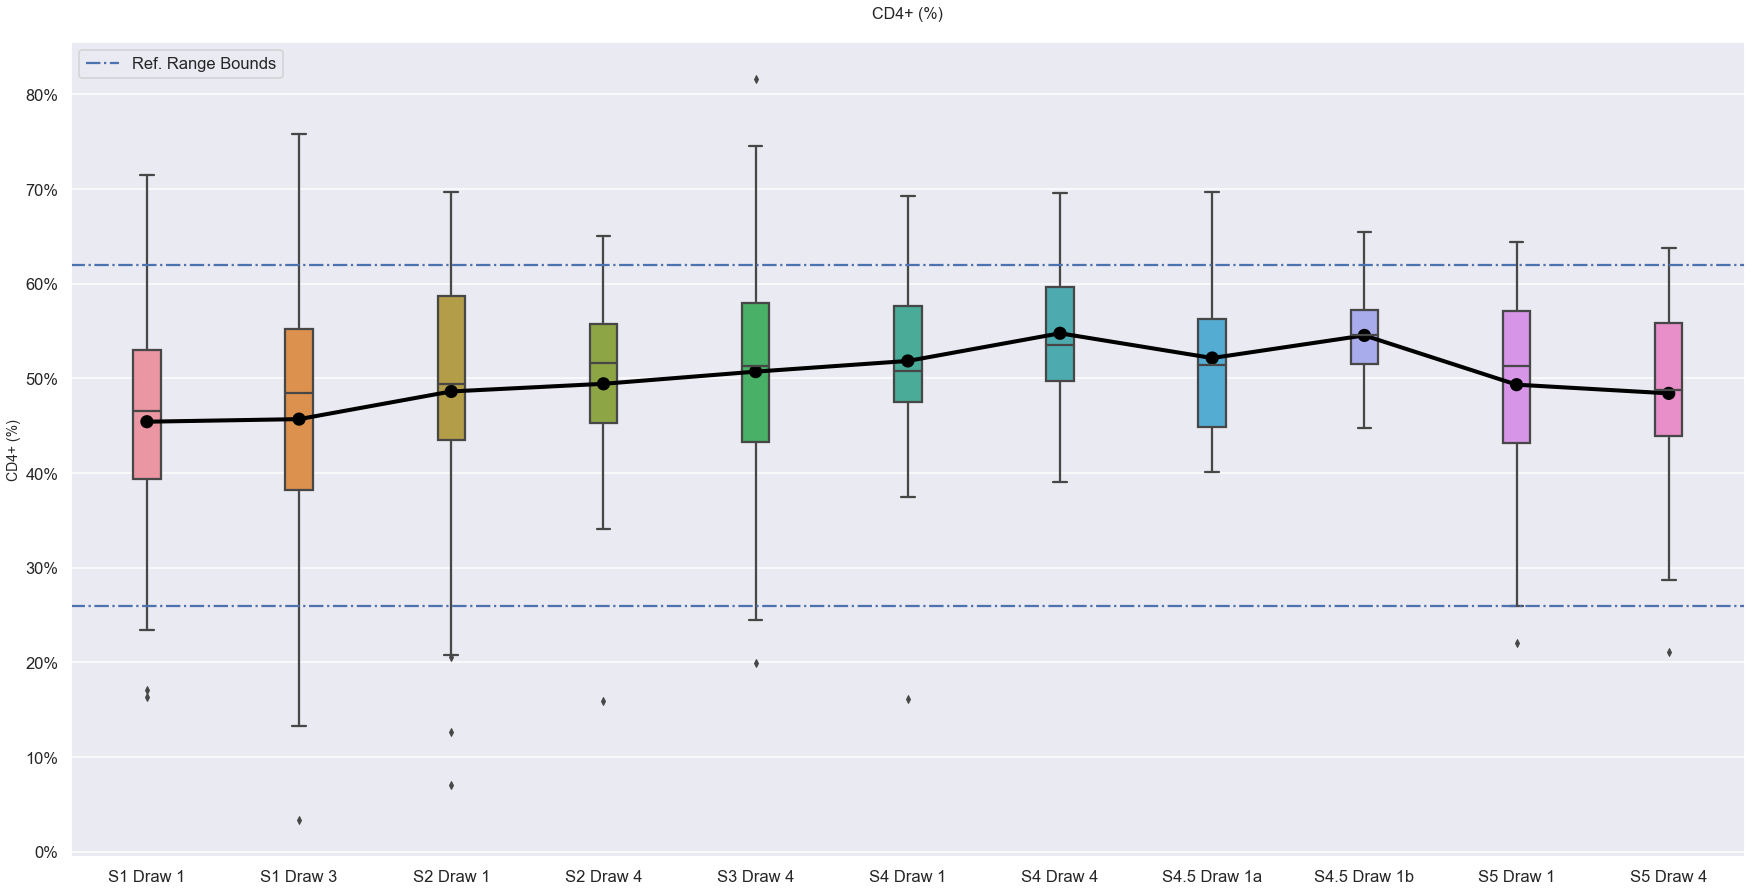

/Users/Derek/opt/anaconda3/lib/python3.8/site-packages/seaborn/utils.py:189: FutureWarning: This function is deprecated and will be removed in a future version
  warnings.warn(msg, FutureWarning)


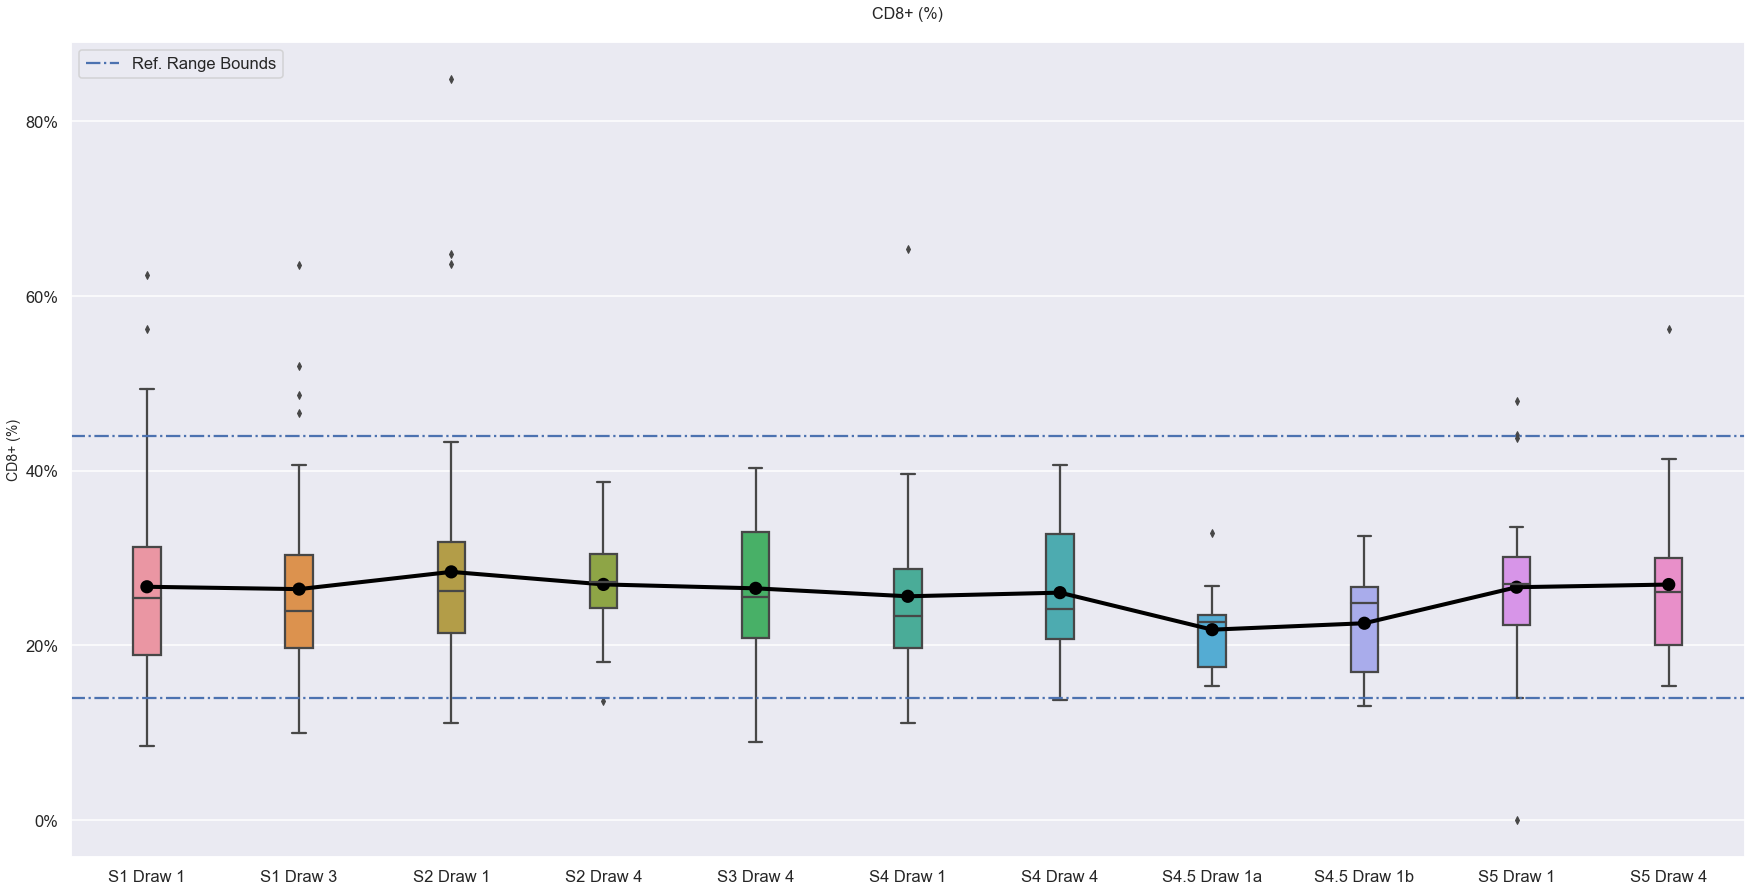

/Users/Derek/opt/anaconda3/lib/python3.8/site-packages/seaborn/utils.py:189: FutureWarning: This function is deprecated and will be removed in a future version
  warnings.warn(msg, FutureWarning)


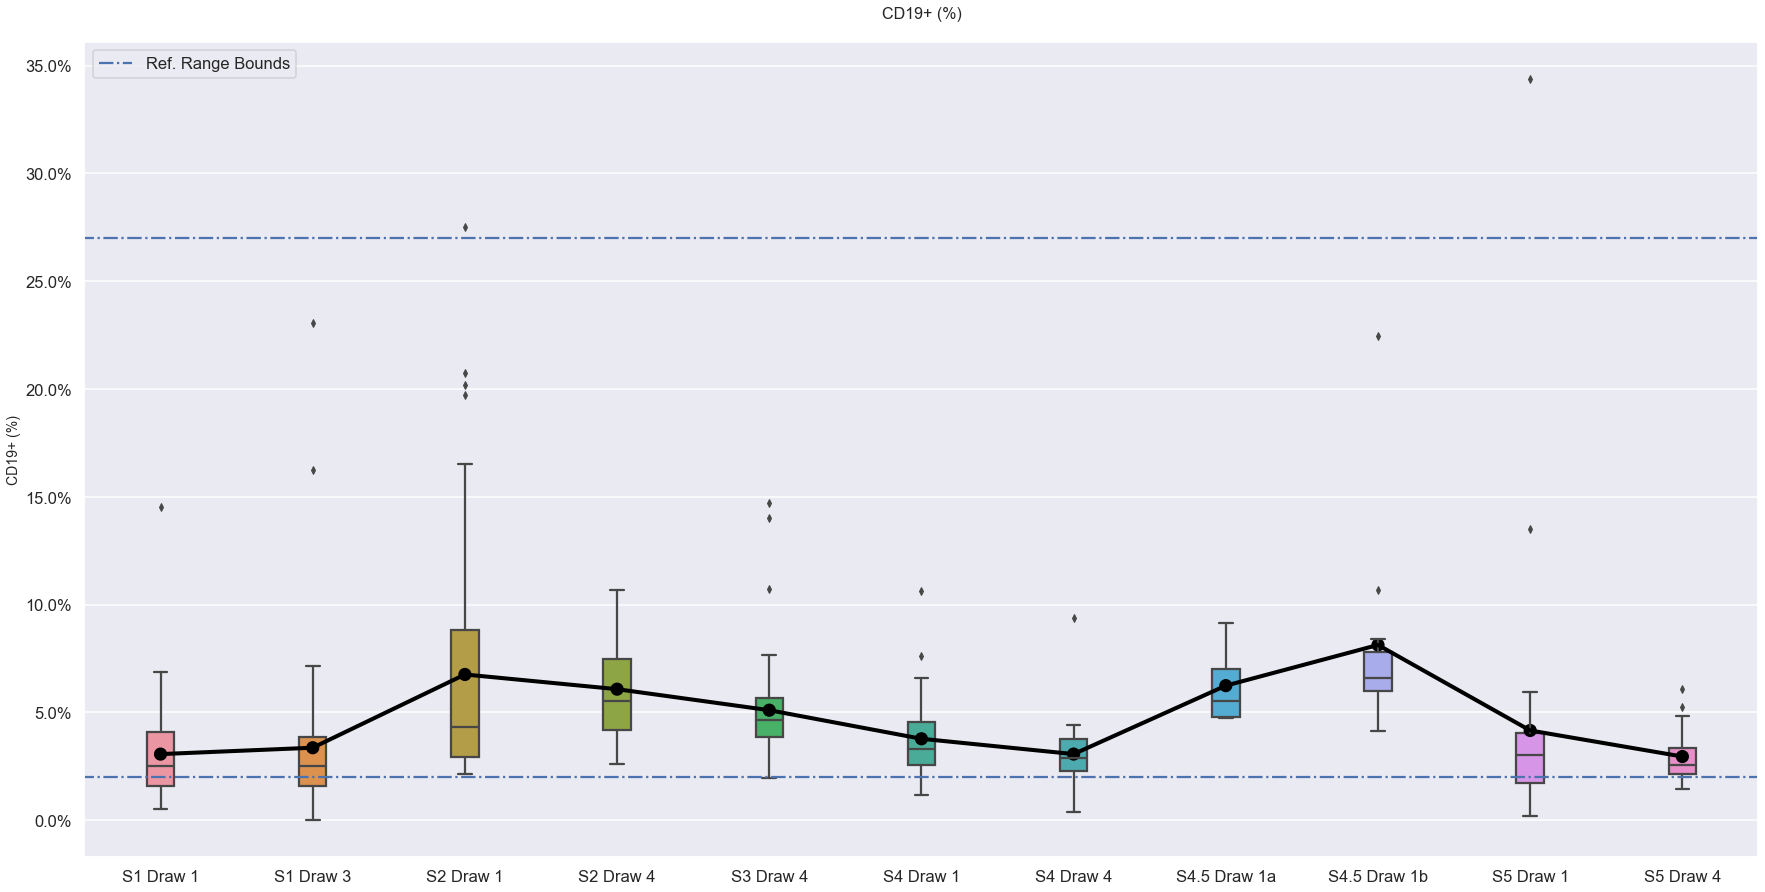

/Users/Derek/opt/anaconda3/lib/python3.8/site-packages/seaborn/utils.py:189: FutureWarning: This function is deprecated and will be removed in a future version
  warnings.warn(msg, FutureWarning)
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


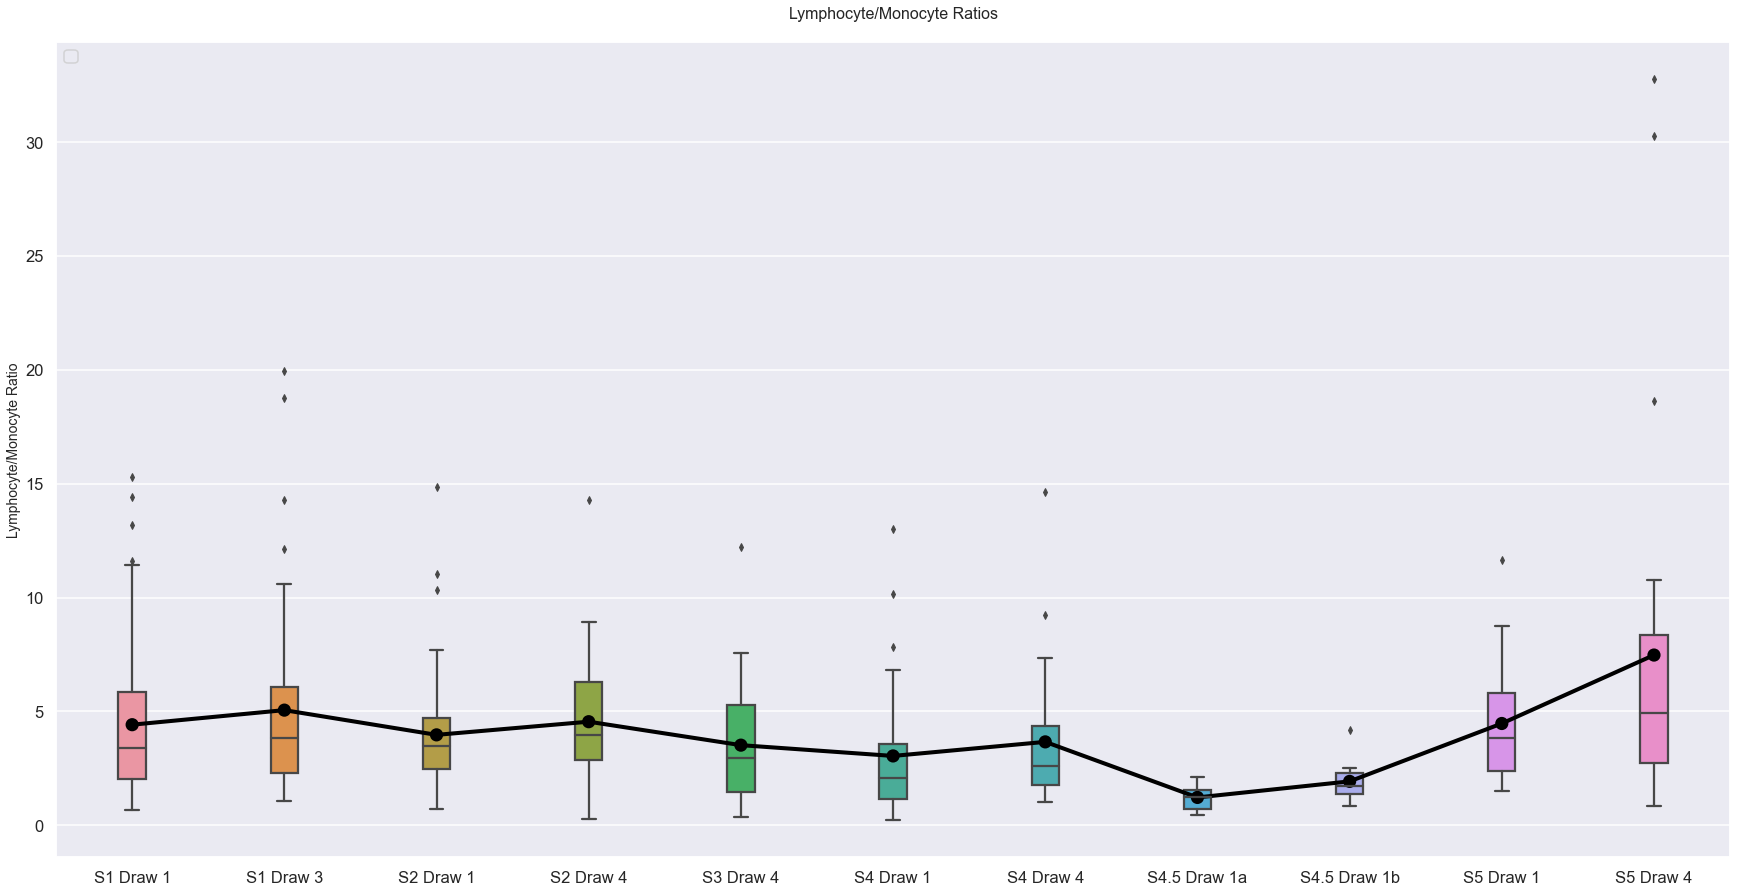

/Users/Derek/opt/anaconda3/lib/python3.8/site-packages/seaborn/utils.py:189: FutureWarning: This function is deprecated and will be removed in a future version
  warnings.warn(msg, FutureWarning)


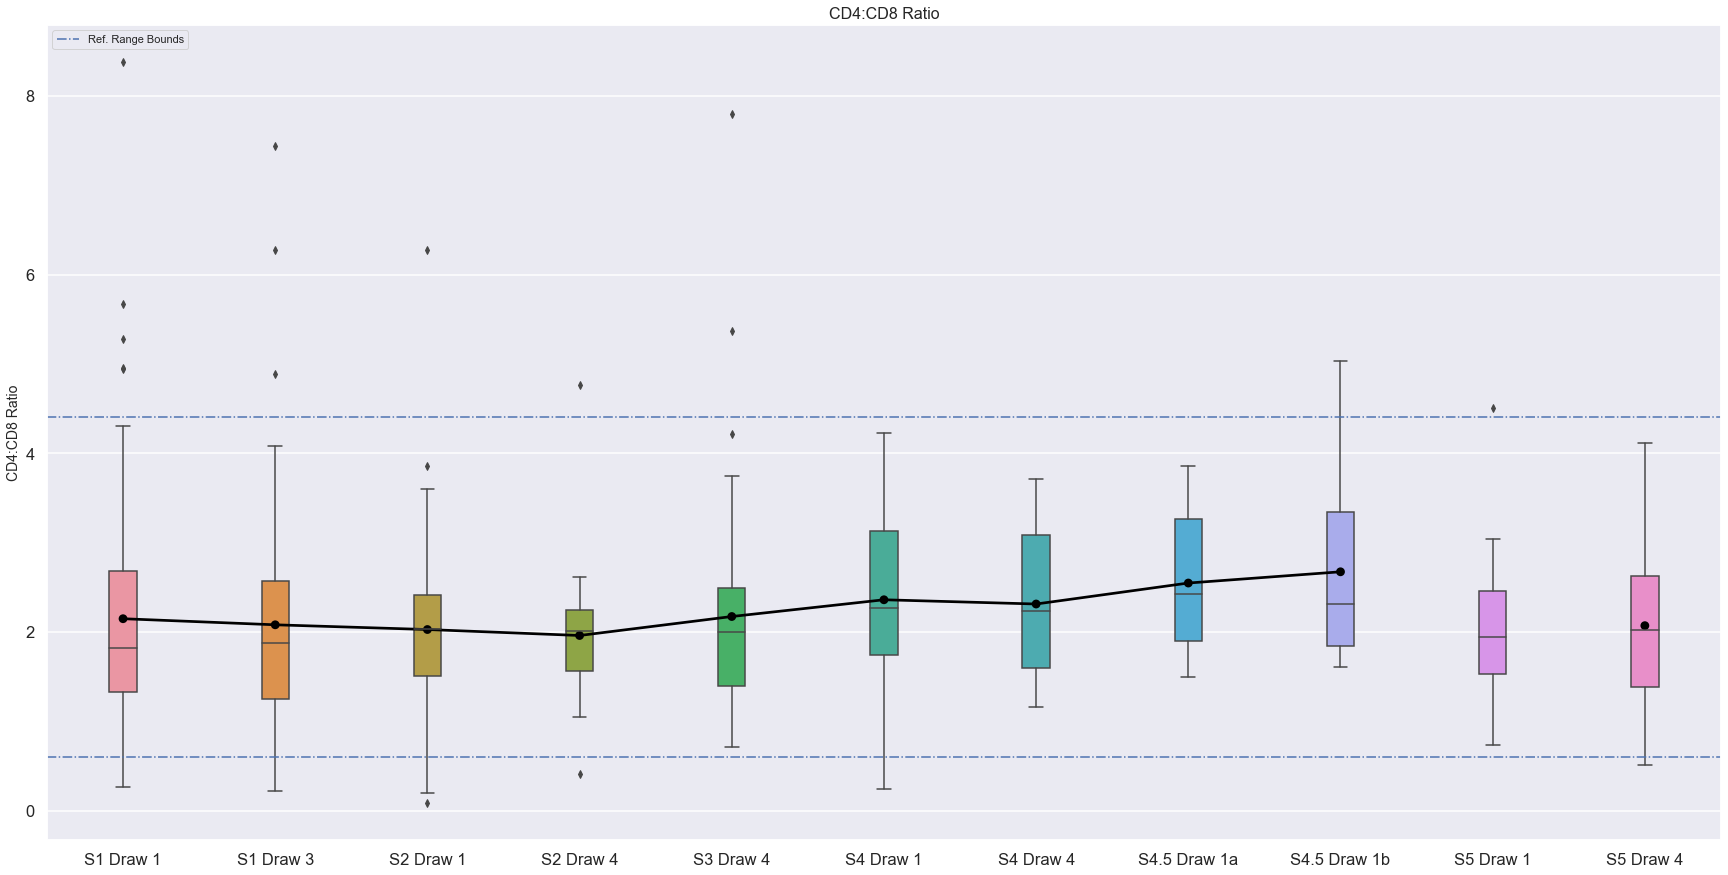

In [9]:
#First, pick out the features needed
wd_list = list(wd.keys())[:11]
desired_feat = wd['s1d1'].columns[np.r_[16:20,23]] #CD3+ (%), CD4+ (%), CD8+ (%), CD19+ (%)

#Set some universal seaborn style params.
sns.set_style("ticks")
sns.set(context='talk', style='darkgrid')

#Set the dims and other common parameters for the plots
dims = (30, 15)
title_size = 16
axes_label_size = 14
ref_idx = dict(zip(desired_feat, [np.where("CD3+ (%)"==ref['Parameters'])[0][0], 
                                  np.where("CD4+ (%)"==ref['Parameters'])[0][0], 
                                  np.where("CD8+ (%)"==ref['Parameters'])[0][0], 
                                  np.where("CD19+ (%)"==ref['Parameters'])[0][0], 
                                  "NA"]))
#Where the index for the following metric is in the ref tables
cd4_cd8_ratio_idx = np.where("CD4:CD8 ratio"==ref['Parameters'])[0][0] 

#Draw multiple box plots for each metric
for i in desired_feat:
    plot_data= {
        'S1 Draw 1': wd[wd_list[0]][i],
        'S1 Draw 3': wd[wd_list[1]][i],
        'S2 Draw 1': wd[wd_list[2]][i],
        'S2 Draw 4': wd[wd_list[3]][i],
        'S3 Draw 4': wd[wd_list[4]][i],
        'S4 Draw 1': wd[wd_list[5]][i],
        'S4 Draw 4': wd[wd_list[6]][i],
        'S4.5 Draw 1a': wd[wd_list[7]][i],
        'S4.5 Draw 1b': wd[wd_list[8]][i],
        'S5 Draw 1': wd[wd_list[9]][i],
        'S5 Draw 4': wd[wd_list[10]][i]
    }
    sorted_keys, sorted_vals = zip(*sorted(plot_data.items(), key=op.itemgetter(0)))

    #Get data in a proper format
    fixed_data = list(plot_data)
    fig, ax = plt.subplots(figsize=dims)

    #Set up the graph parameters.
    b = sns.boxplot(data=sorted_vals, width=.18)
    
    #Formatting based on data type
    if i != 'lymphocyte/monocyte ratio':
        sns.utils.axlabel(xlabel='', ylabel=i[1:] + ' (%)', fontsize=axes_label_size)
        b.set_title(i[1:] + ' (%)\n', fontsize=title_size)
        
        #Reference ranges found in the Florida paper
        ax.hlines(ref.loc[ref_idx[i],['Ref. Max']]/100, xmin = -1, xmax = 12, ls='-.', label = 'Ref. Range Lower Bound')
        ax.hlines(ref.loc[ref_idx[i],['Ref. Min']]/100, xmin = -1, xmax = 12, ls='-.', label = 'Ref. Range Upper Bound')
    else:
        sns.utils.axlabel(xlabel='', ylabel='Lymphocyte/Monocyte Ratio', fontsize=axes_label_size)
        b.set_title('Lymphocyte/Monocyte Ratios\n', fontsize=title_size)
    
    ax = sns.pointplot(data=sorted_vals, ci=None, color='black')
    
    if i != 'lymphocyte/monocyte ratio':
        b.axes.yaxis.set_major_formatter(PercentFormatter(1))
        
    #Category labels added here
    plt.xticks(plt.xticks()[0], sorted_keys)
    handles, _ = ax.get_legend_handles_labels()
    ax.legend(loc='upper left', handles=handles, labels=["Ref. Range Bounds"])
    plt.show()

#A separate run needed for CD4:CD8 Ratio.
plot_data= {
    'S1 Draw 1': wd[wd_list[0]][desired_feat[1]]/wd[wd_list[0]][desired_feat[2]],
    'S1 Draw 3': wd[wd_list[1]][desired_feat[1]]/wd[wd_list[1]][desired_feat[2]],
    'S2 Draw 1': wd[wd_list[2]][desired_feat[1]]/wd[wd_list[2]][desired_feat[2]],
    'S2 Draw 4': wd[wd_list[3]][desired_feat[1]]/wd[wd_list[3]][desired_feat[2]],
    'S3 Draw 4': wd[wd_list[4]][desired_feat[1]]/wd[wd_list[4]][desired_feat[2]],
    'S4 Draw 1': wd[wd_list[5]][desired_feat[1]]/wd[wd_list[5]][desired_feat[2]],
    'S4 Draw 4': wd[wd_list[6]][desired_feat[1]]/wd[wd_list[6]][desired_feat[2]],
    'S4.5 Draw 1a': wd[wd_list[7]][desired_feat[1]]/wd[wd_list[7]][desired_feat[2]],
    'S4.5 Draw 1b': wd[wd_list[8]][desired_feat[1]]/wd[wd_list[8]][desired_feat[2]],
    'S5 Draw 1': wd[wd_list[9]][desired_feat[1]]/wd[wd_list[9]][desired_feat[2]],
    'S5 Draw 4': wd[wd_list[10]][desired_feat[1]]/wd[wd_list[10]][desired_feat[2]],
}
sorted_keys, sorted_vals = zip(*sorted(plot_data.items(), key=op.itemgetter(0)))

#Get data in a proper format
fixed_data = list(plot_data)
fig, ax = plt.subplots(figsize=dims)

#Set up the graph parameters
sns.set(context='notebook', style='darkgrid')

b = sns.boxplot(data=sorted_vals, width=.18)

sns.utils.axlabel(xlabel='', ylabel='CD4:CD8 Ratio', fontsize=axes_label_size)
b.set_title('CD4:CD8 Ratio', fontsize=title_size)

#Reference ranges found in the Florida paper
ax.hlines(ref.loc[cd4_cd8_ratio_idx,['Ref. Min']], xmin = -1, xmax = 12, ls='-.', label = 'Ref. Range Lower Bound')
ax.hlines(ref.loc[cd4_cd8_ratio_idx,['Ref. Max']], xmin = -1, xmax = 12, ls='-.', label = 'Ref. Range Upper Bound')

ax = sns.pointplot(data=sorted_vals, ci=None, color='black')
if i != 'lymphocyte/monocyte ratio':
    b.axes.yaxis.set_major_formatter(PercentFormatter(1))

#Category labels added here
plt.xticks(plt.xticks()[0], sorted_keys)
handles, _ = ax.get_legend_handles_labels()
ax.legend(loc='upper left', handles=handles, labels=["Ref. Range Bounds"])
plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\utils.py:178: FutureWarning: This function is deprecated and will be removed in a future version
  warnings.warn(msg, FutureWarning)


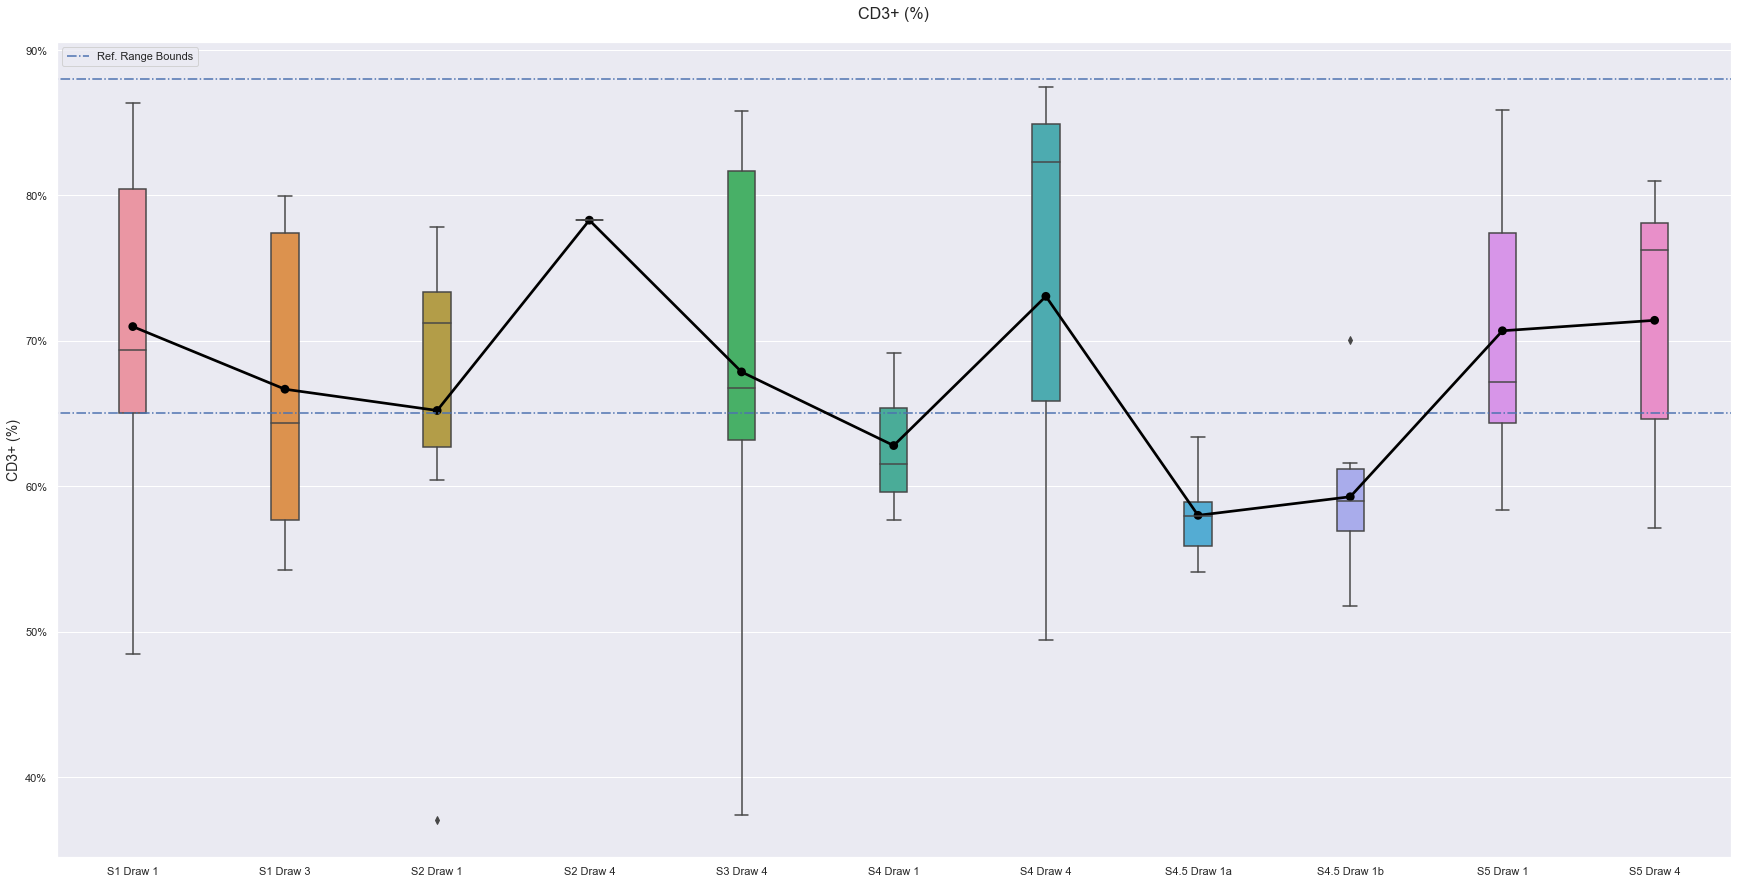

In [125]:
i = desired_feat[0]
plot_data= {
    'S1 Draw 1': wd[wd_list[0]].loc[wd[wd_list[0]]['Subject ID'].isin(wd[wd_list[7]]['Subject ID'])][i],
    'S1 Draw 3': wd[wd_list[1]].loc[wd[wd_list[1]]['Subject ID'].isin(wd[wd_list[7]]['Subject ID'])][i],
    'S2 Draw 1': wd[wd_list[2]].loc[wd[wd_list[2]]['Subject ID'].isin(wd[wd_list[7]]['Subject ID'])][i],
    'S2 Draw 4': wd[wd_list[3]].loc[wd[wd_list[3]]['Subject ID'].isin(wd[wd_list[7]]['Subject ID'])][i],
    'S3 Draw 4': wd[wd_list[4]].loc[wd[wd_list[4]]['Subject ID'].isin(wd[wd_list[7]]['Subject ID'])][i],
    'S4 Draw 1': wd[wd_list[5]].loc[wd[wd_list[5]]['Subject ID'].isin(wd[wd_list[7]]['Subject ID'])][i],
    'S4 Draw 4': wd[wd_list[6]].loc[wd[wd_list[6]]['Subject ID'].isin(wd[wd_list[7]]['Subject ID'])][i],
    'S4.5 Draw 1a': wd[wd_list[7]].loc[wd[wd_list[7]]['Subject ID'].isin(wd[wd_list[7]]['Subject ID'])][i],
    'S4.5 Draw 1b': wd[wd_list[8]].loc[wd[wd_list[8]]['Subject ID'].isin(wd[wd_list[7]]['Subject ID'])][i],
    'S5 Draw 1': wd[wd_list[9]].loc[wd[wd_list[9]]['Subject ID'].isin(wd[wd_list[7]]['Subject ID'])][i],
    'S5 Draw 4': wd[wd_list[10]].loc[wd[wd_list[10]]['Subject ID'].isin(wd[wd_list[7]]['Subject ID'])][i]
}
sorted_keys, sorted_vals = zip(*sorted(plot_data.items(), key=op.itemgetter(0)))

#Get data in a proper format.
fixed_data = list(plot_data)
fig, ax = plt.subplots(figsize=dims)

#Set up the graph parameters.
b = sns.boxplot(data=sorted_vals, width=.18)

if i != 'lymphocyte/monocyte ratio':
    sns.utils.axlabel(xlabel='', ylabel=i[1:] + ' (%)', fontsize=axes_label_size)
    b.set_title(i[1:] + ' (%)\n', fontsize=title_size)

    #Reference ranges found in the Florida paper.
    ax.hlines(ref.loc[ref_idx[i],['Ref. Max']]/100, xmin = -1, xmax = 12, ls='-.', label = 'Ref. Range Lower Bound')
    ax.hlines(ref.loc[ref_idx[i],['Ref. Min']]/100, xmin = -1, xmax = 12, ls='-.', label = 'Ref. Range Upper Bound')
else:
    sns.utils.axlabel(xlabel='', ylabel='Lymphocyte/Monocyte Ratio', fontsize=axes_label_size)
    b.set_title('Lymphocyte/Monocyte Ratios\n', fontsize=title_size)

ax = sns.pointplot(data=sorted_vals, ci=None, color='black')

if i != 'lymphocyte/monocyte ratio':
    b.axes.yaxis.set_major_formatter(PercentFormatter(1))

#Category labels added here
plt.xticks(plt.xticks()[0], sorted_keys)
handles, _ = ax.get_legend_handles_labels()
ax.legend(loc='upper left', handles=handles, labels=["Ref. Range Bounds"])
plt.show()

In [151]:
len(sorted_vals[9])

5

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\utils.py:178: FutureWarning: This function is deprecated and will be removed in a future version
  warnings.warn(msg, FutureWarning)


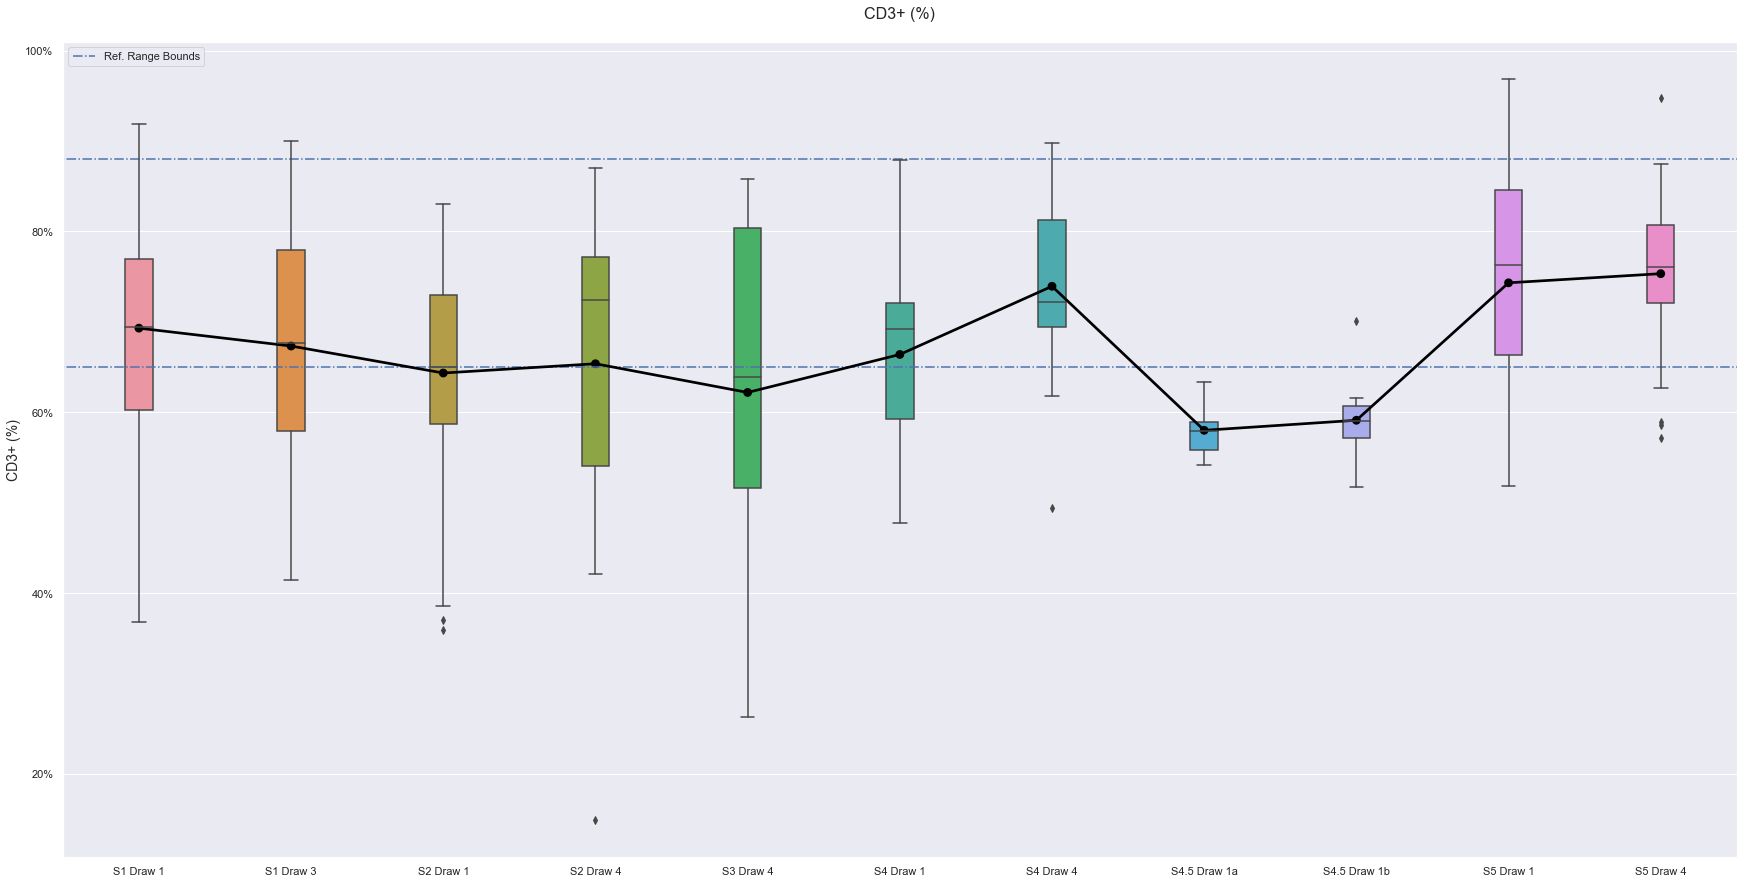

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\utils.py:178: FutureWarning: This function is deprecated and will be removed in a future version
  warnings.warn(msg, FutureWarning)


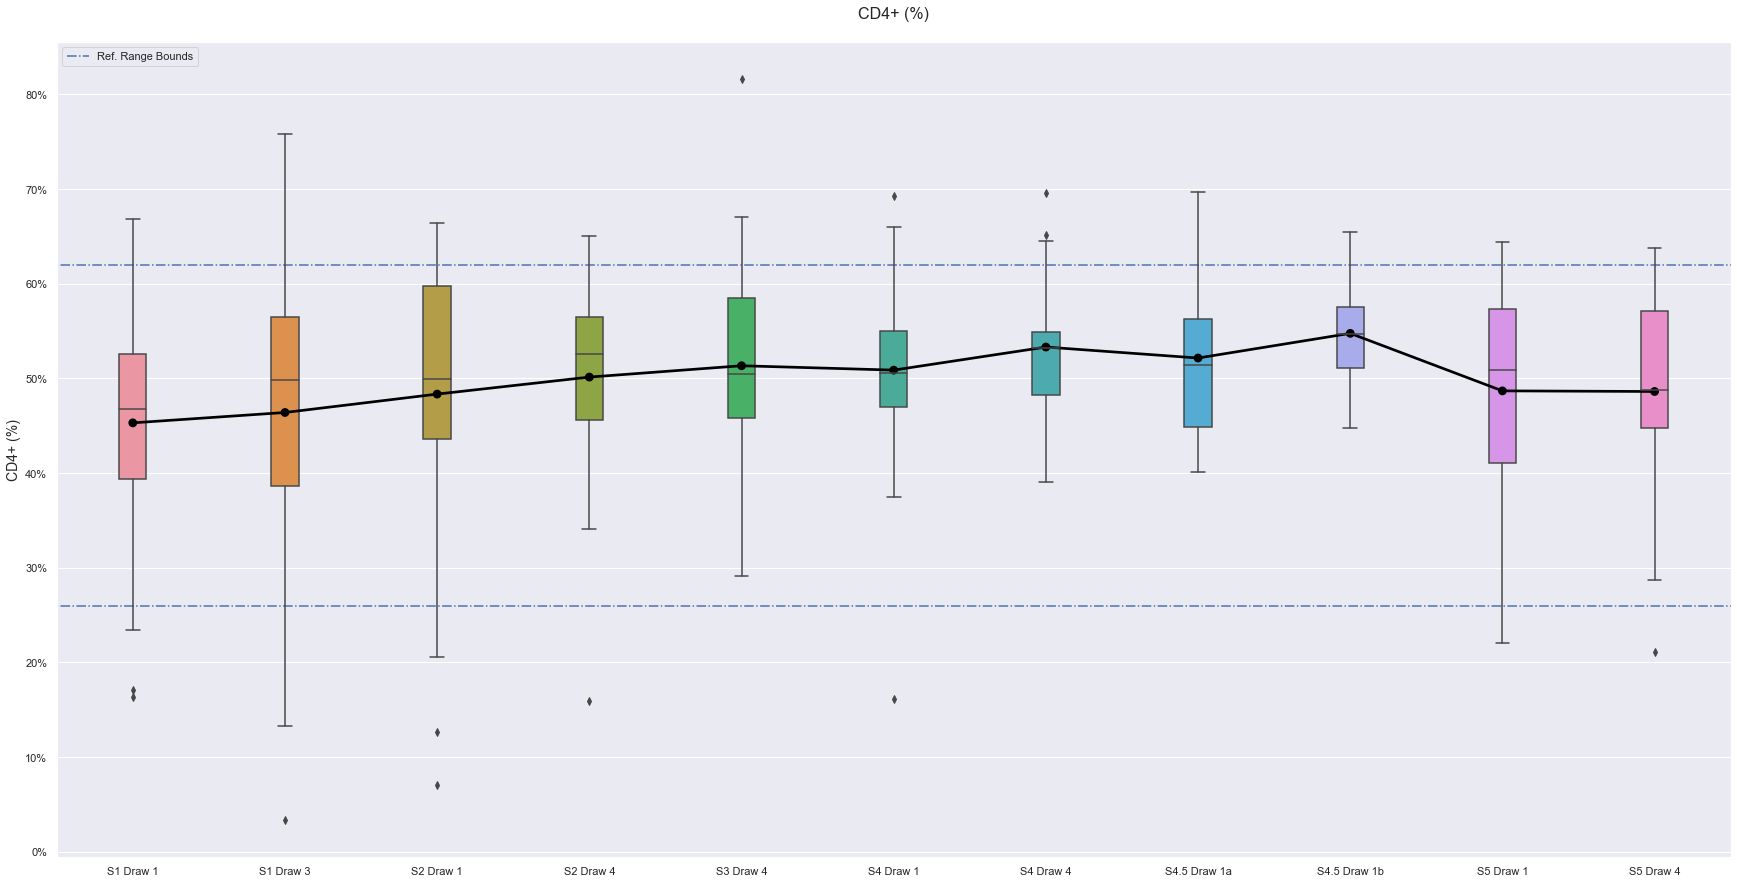

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\utils.py:178: FutureWarning: This function is deprecated and will be removed in a future version
  warnings.warn(msg, FutureWarning)


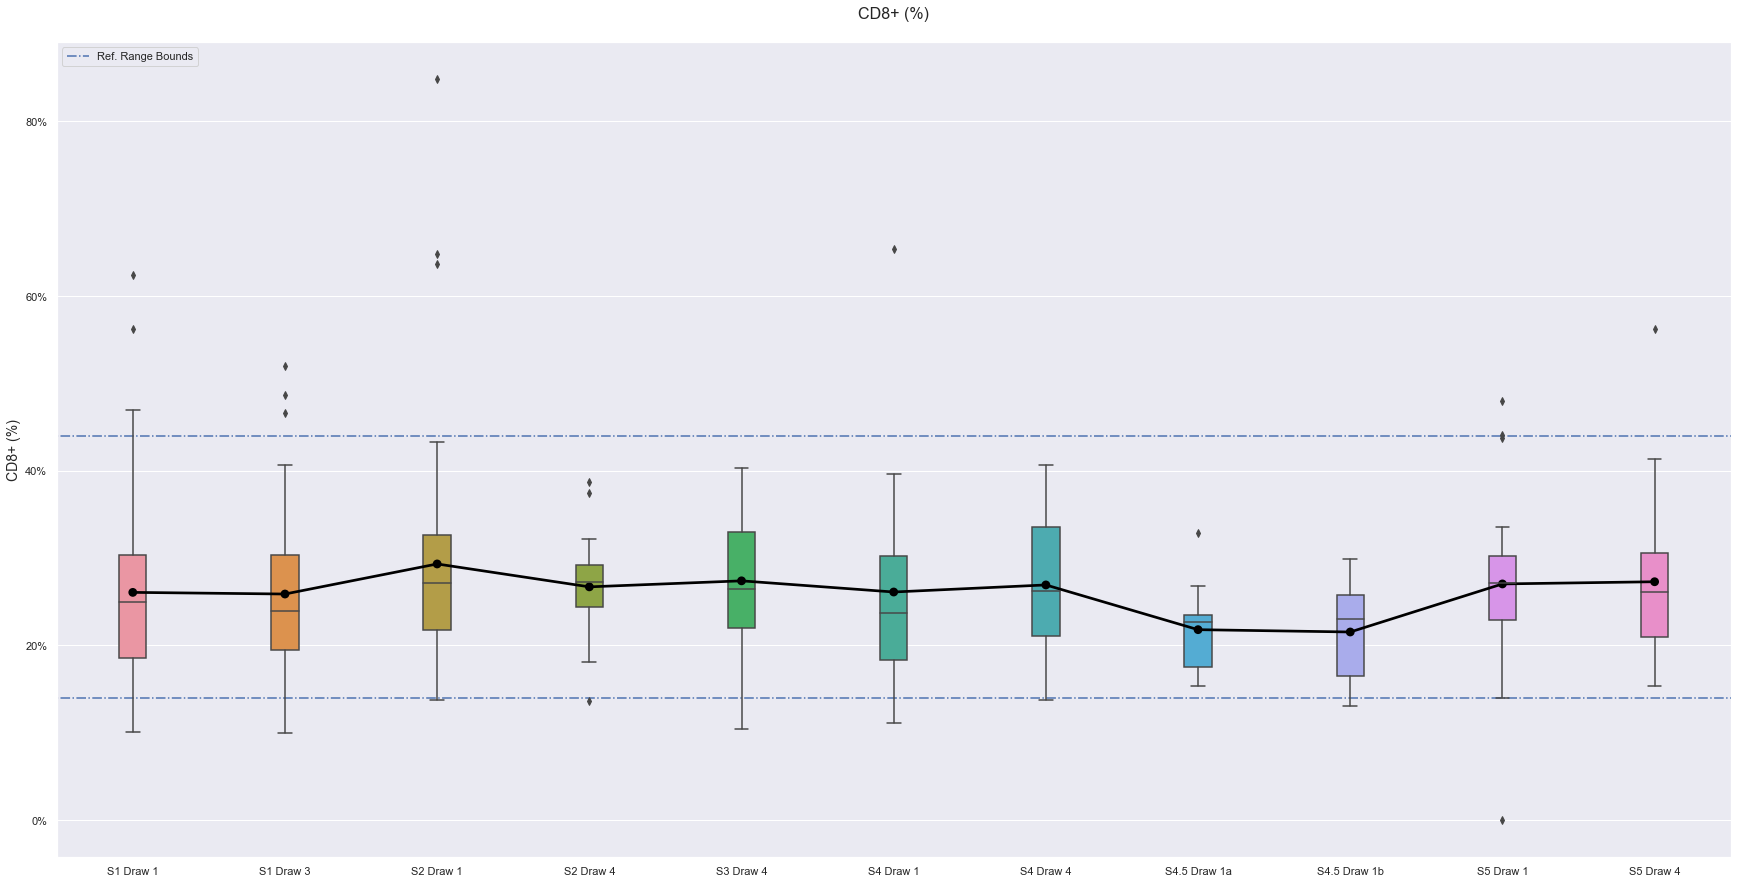

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\utils.py:178: FutureWarning: This function is deprecated and will be removed in a future version
  warnings.warn(msg, FutureWarning)


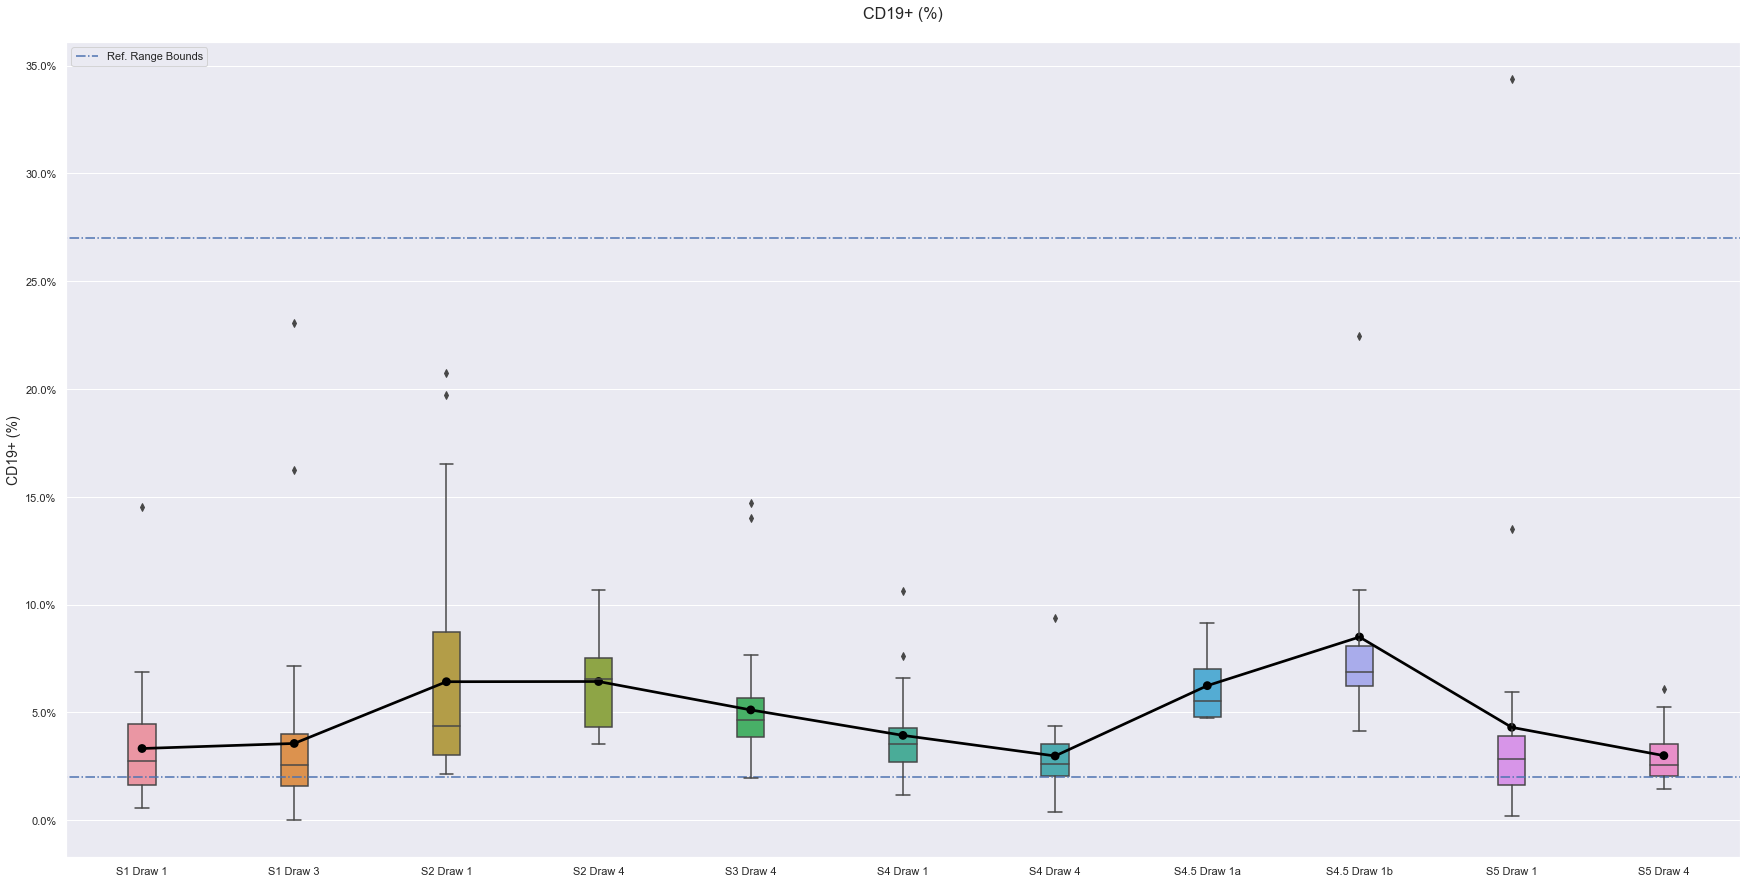

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\utils.py:178: FutureWarning: This function is deprecated and will be removed in a future version
  warnings.warn(msg, FutureWarning)
No handles with labels found to put in legend.


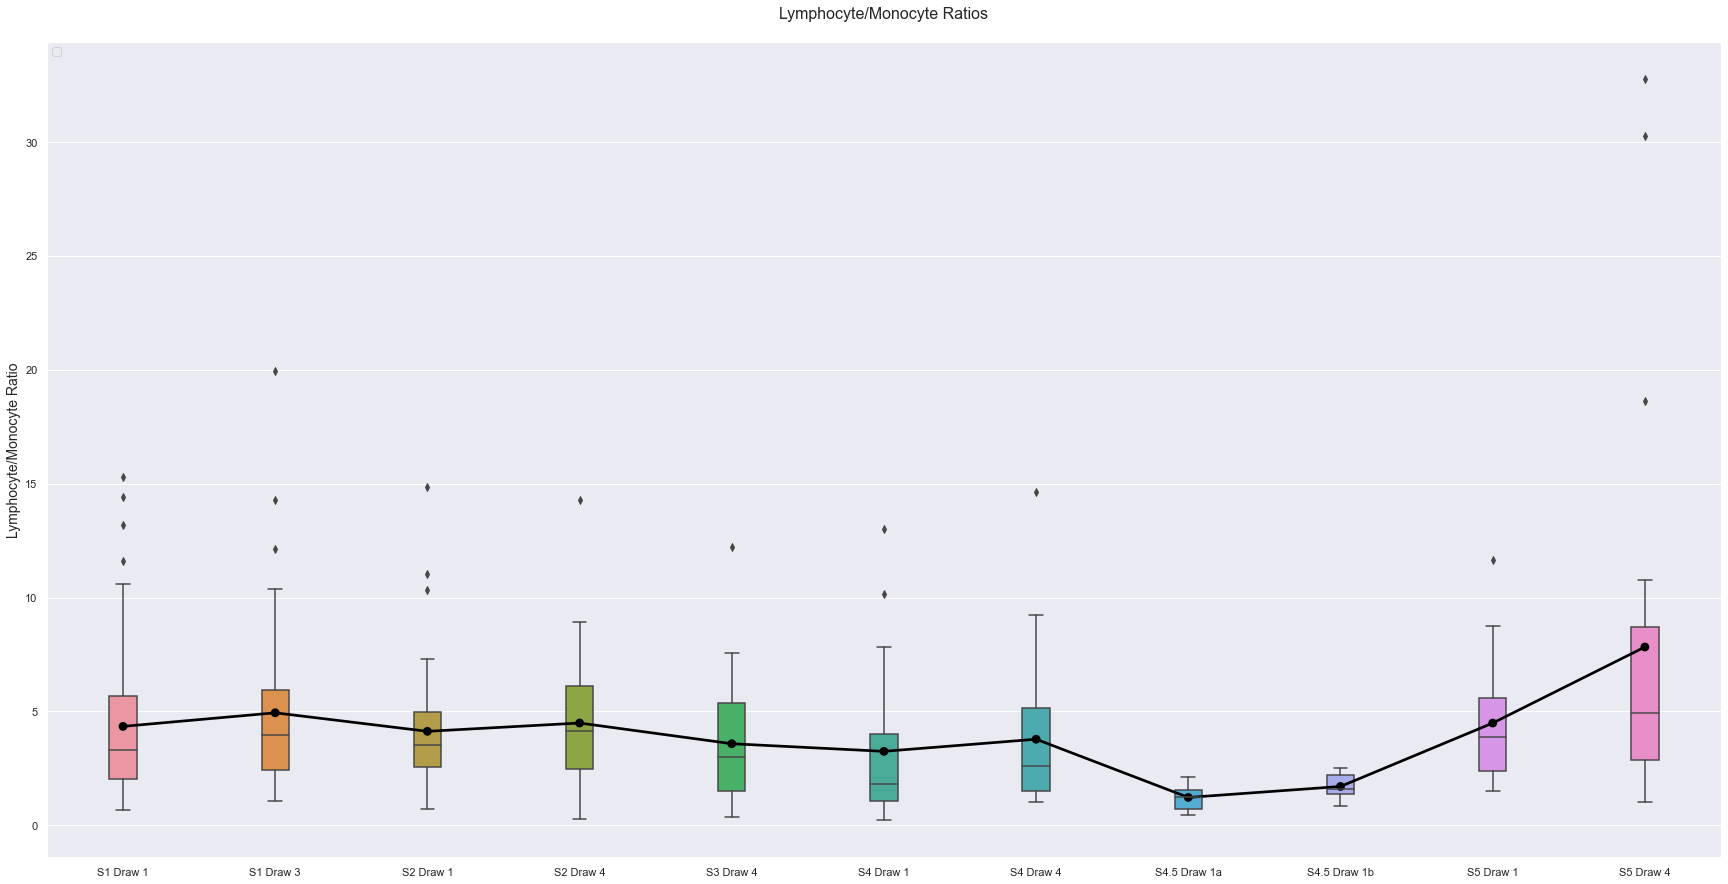

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\utils.py:178: FutureWarning: This function is deprecated and will be removed in a future version
  warnings.warn(msg, FutureWarning)


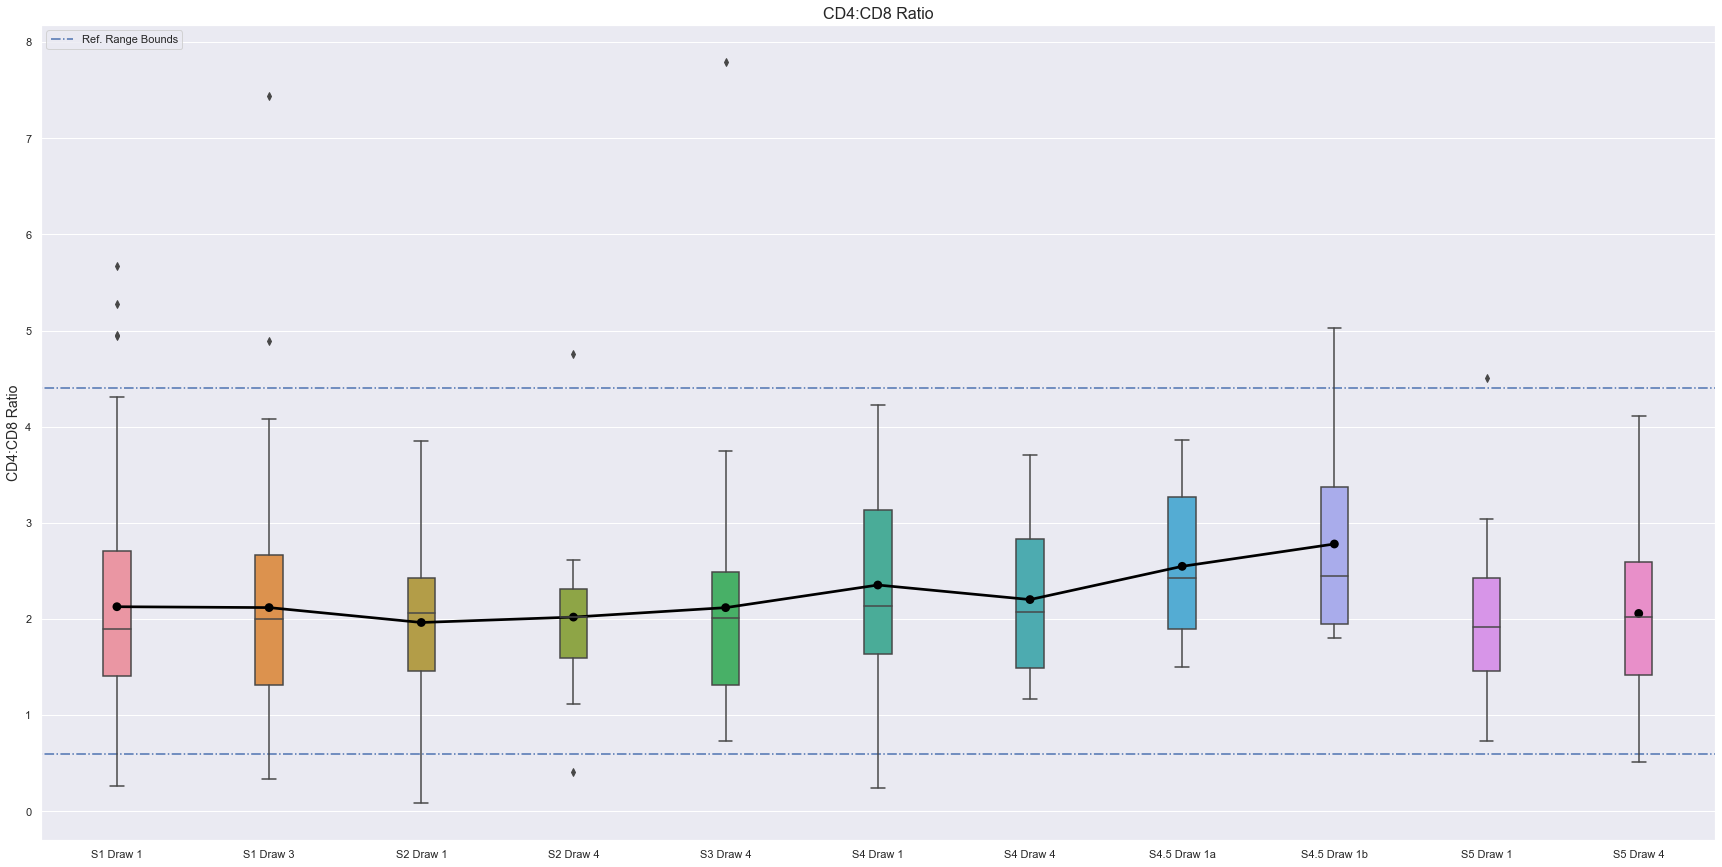

In [126]:
#This time, try only males.
for i in desired_feat:
    plot_data= {
        'S1 Draw 1': wd[wd_list[0]][wd[wd_list[0]]['Gender'] == 'M'][i],
        'S1 Draw 3': wd[wd_list[1]][wd[wd_list[1]]['Gender'] == 'M'][i],
        'S2 Draw 1': wd[wd_list[2]][wd[wd_list[2]]['Gender'] == 'M'][i],
        'S2 Draw 4': wd[wd_list[3]][wd[wd_list[3]]['Gender'] == 'M'][i],
        'S3 Draw 4': wd[wd_list[4]][wd[wd_list[4]]['Gender'] == 'M'][i],
        'S4 Draw 1': wd[wd_list[5]][wd[wd_list[5]]['Gender'] == 'M'][i],
        'S4 Draw 4': wd[wd_list[6]][wd[wd_list[6]]['Gender'] == 'M'][i],
        'S4.5 Draw 1a': wd[wd_list[7]][wd[wd_list[7]]['Gender'] == 'M'][i],
        'S4.5 Draw 1b': wd[wd_list[8]][wd[wd_list[8]]['Gender'] == 'M'][i],
        'S5 Draw 1': wd[wd_list[9]][wd[wd_list[9]]['Gender'] == 'M'][i],
        'S5 Draw 4': wd[wd_list[10]][wd[wd_list[10]]['Gender'] == 'M'][i]
    }
    sorted_keys, sorted_vals = zip(*sorted(plot_data.items(), key=op.itemgetter(0)))

    #Get data in a proper format.
    fixed_data = list(plot_data)
    fig, ax = plt.subplots(figsize=dims)

    #Set up the graph parameters.
    sns.set(context='notebook', style='darkgrid')

    b = sns.boxplot(data=sorted_vals, width=.18)

    if i != 'lymphocyte/monocyte ratio':
        sns.utils.axlabel(xlabel='', ylabel=i[1:] + ' (%)', fontsize=axes_label_size)
        b.set_title(i[1:] + ' (%)\n', fontsize=title_size)
        
        #Reference ranges found in the Florida paper.
        ax.hlines(ref.loc[ref_idx[i],['Ref. Min']]/100, xmin = -1, xmax = 12, ls='-.', label = 'Ref. Range Lower Bound')
        ax.hlines(ref.loc[ref_idx[i],['Ref. Max']]/100, xmin = -1, xmax = 12, ls='-.', label = 'Ref. Range Upper Bound')
    else:
        sns.utils.axlabel(xlabel='', ylabel='Lymphocyte/Monocyte Ratio', fontsize=axes_label_size)
        b.set_title('Lymphocyte/Monocyte Ratios\n', fontsize=title_size)
    
    ax = sns.pointplot(data=sorted_vals, ci=None, color='black')
    #sns.swarmplot(data=sorted_vals, size=6, edgecolor="black", linewidth=.9)
    
    if i != 'lymphocyte/monocyte ratio':
        b.axes.yaxis.set_major_formatter(PercentFormatter(1))
        
    #Category labels added here
    plt.xticks(plt.xticks()[0], sorted_keys)
    handles, _ = ax.get_legend_handles_labels()
    ax.legend(loc='upper left', handles=handles, labels=["Ref. Range Bounds"])
    plt.show()
    
#A separate run needed for CD4:CD8 Ratio.
plot_data= {
    'S1 Draw 1': wd[wd_list[0]][wd[wd_list[0]]['Gender'] == 'M'][desired_feat[1]]/wd[wd_list[0]][wd[wd_list[0]]['Gender'] == 'M'][desired_feat[2]],
    'S1 Draw 3': wd[wd_list[1]][wd[wd_list[1]]['Gender'] == 'M'][desired_feat[1]]/wd[wd_list[1]][wd[wd_list[1]]['Gender'] == 'M'][desired_feat[2]],
    'S2 Draw 1': wd[wd_list[2]][wd[wd_list[2]]['Gender'] == 'M'][desired_feat[1]]/wd[wd_list[2]][wd[wd_list[2]]['Gender'] == 'M'][desired_feat[2]],
    'S2 Draw 4': wd[wd_list[3]][wd[wd_list[3]]['Gender'] == 'M'][desired_feat[1]]/wd[wd_list[3]][wd[wd_list[3]]['Gender'] == 'M'][desired_feat[2]],
    'S3 Draw 4': wd[wd_list[4]][wd[wd_list[4]]['Gender'] == 'M'][desired_feat[1]]/wd[wd_list[4]][wd[wd_list[4]]['Gender'] == 'M'][desired_feat[2]],
    'S4 Draw 1': wd[wd_list[5]][wd[wd_list[5]]['Gender'] == 'M'][desired_feat[1]]/wd[wd_list[5]][wd[wd_list[5]]['Gender'] == 'M'][desired_feat[2]],
    'S4 Draw 4': wd[wd_list[6]][wd[wd_list[6]]['Gender'] == 'M'][desired_feat[1]]/wd[wd_list[6]][wd[wd_list[6]]['Gender'] == 'M'][desired_feat[2]],
    'S4.5 Draw 1a': wd[wd_list[7]][wd[wd_list[7]]['Gender'] == 'M'][desired_feat[1]]/wd[wd_list[7]][wd[wd_list[7]]['Gender'] == 'M'][desired_feat[2]],
    'S4.5 Draw 1b': wd[wd_list[8]][wd[wd_list[8]]['Gender'] == 'M'][desired_feat[1]]/wd[wd_list[8]][wd[wd_list[8]]['Gender'] == 'M'][desired_feat[2]],
    'S5 Draw 1': wd[wd_list[9]][wd[wd_list[9]]['Gender'] == 'M'][desired_feat[1]]/wd[wd_list[9]][wd[wd_list[9]]['Gender'] == 'M'][desired_feat[2]],
    'S5 Draw 4': wd[wd_list[10]][wd[wd_list[10]]['Gender'] == 'M'][desired_feat[1]]/wd[wd_list[10]][wd[wd_list[10]]['Gender'] == 'M'][desired_feat[2]]
}
sorted_keys, sorted_vals = zip(*sorted(plot_data.items(), key=op.itemgetter(0)))

#Get data in a proper format.
fixed_data = list(plot_data)
fig, ax = plt.subplots(figsize=dims)

#Set up the graph parameters.
sns.set(context='notebook', style='darkgrid')

b = sns.boxplot(data=sorted_vals, width=.18)

sns.utils.axlabel(xlabel='', ylabel='CD4:CD8 Ratio', fontsize=axes_label_size)
b.set_title('CD4:CD8 Ratio', fontsize=title_size)

#Reference ranges found in the Florida paper.
ax.hlines(ref.loc[cd4_cd8_ratio_idx,['Ref. Min']], xmin = -1, xmax = 12, ls='-.', label = 'Ref. Range Lower Bound')
ax.hlines(ref.loc[cd4_cd8_ratio_idx,['Ref. Max']], xmin = -1, xmax = 12, ls='-.', label = 'Ref. Range Upper Bound')

ax = sns.pointplot(data=sorted_vals, ci=None, color='black')
#sns.swarmplot(data=sorted_vals, size=6, edgecolor="black", linewidth=.9)

if i != 'lymphocyte/monocyte ratio':
    b.axes.yaxis.set_major_formatter(PercentFormatter(1))

#Category labels added here
plt.xticks(plt.xticks()[0], sorted_keys)
handles, _ = ax.get_legend_handles_labels()
ax.legend(loc='upper left', handles=handles, labels=["Ref. Range Bounds"])
plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\utils.py:178: FutureWarning: This function is deprecated and will be removed in a future version
  warnings.warn(msg, FutureWarning)


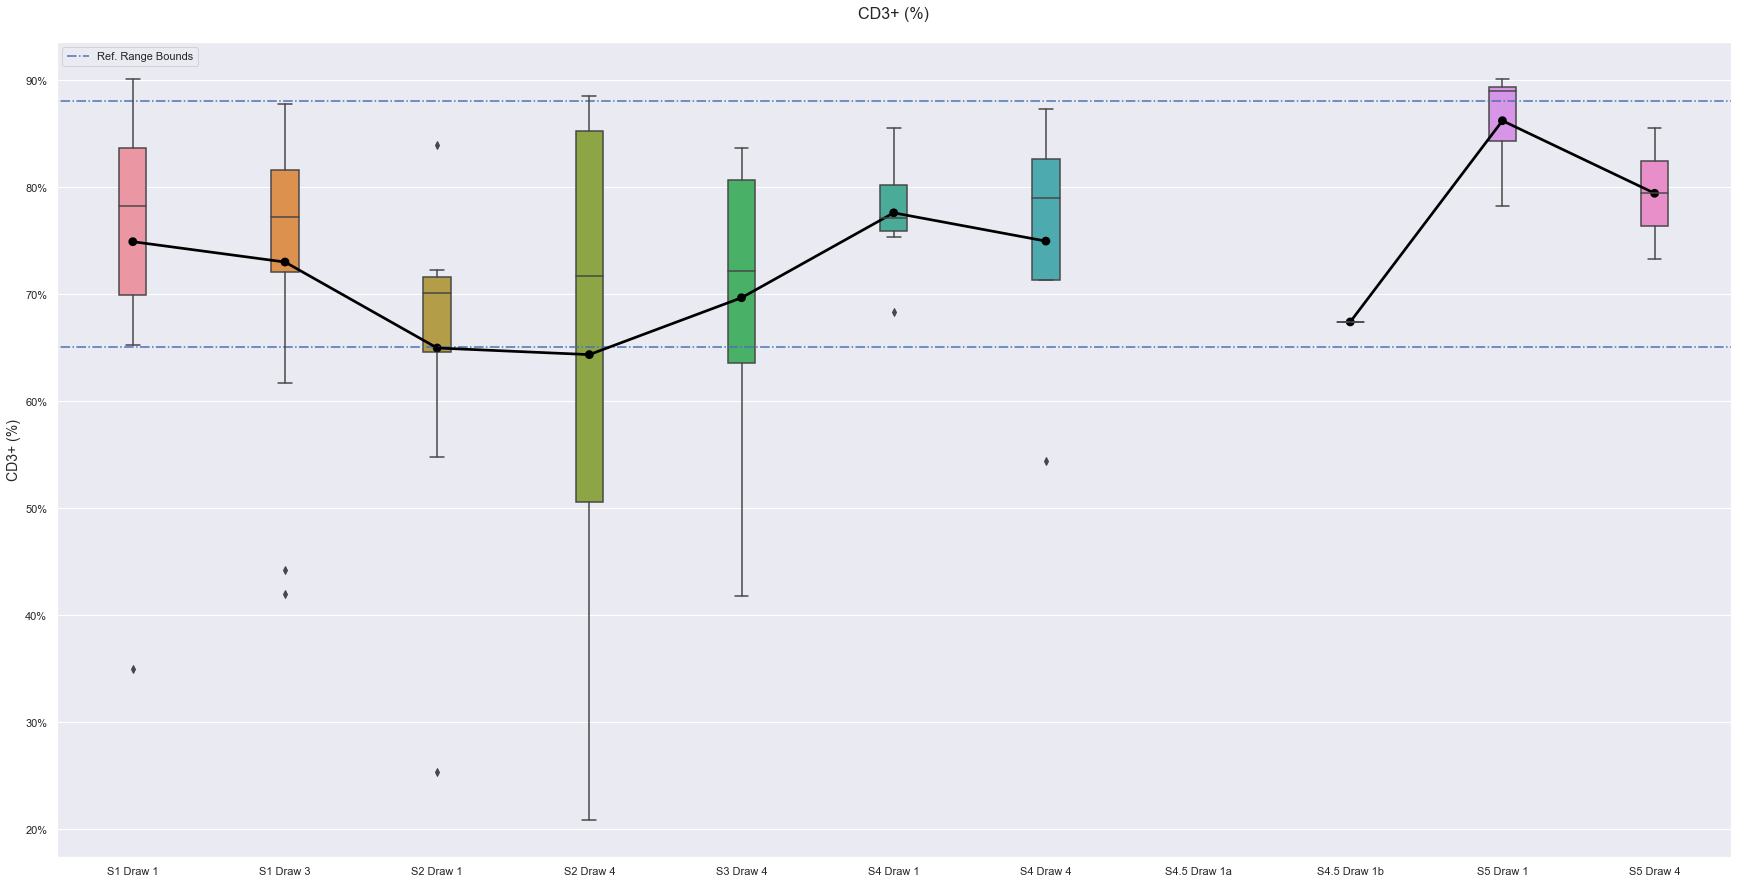

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\utils.py:178: FutureWarning: This function is deprecated and will be removed in a future version
  warnings.warn(msg, FutureWarning)


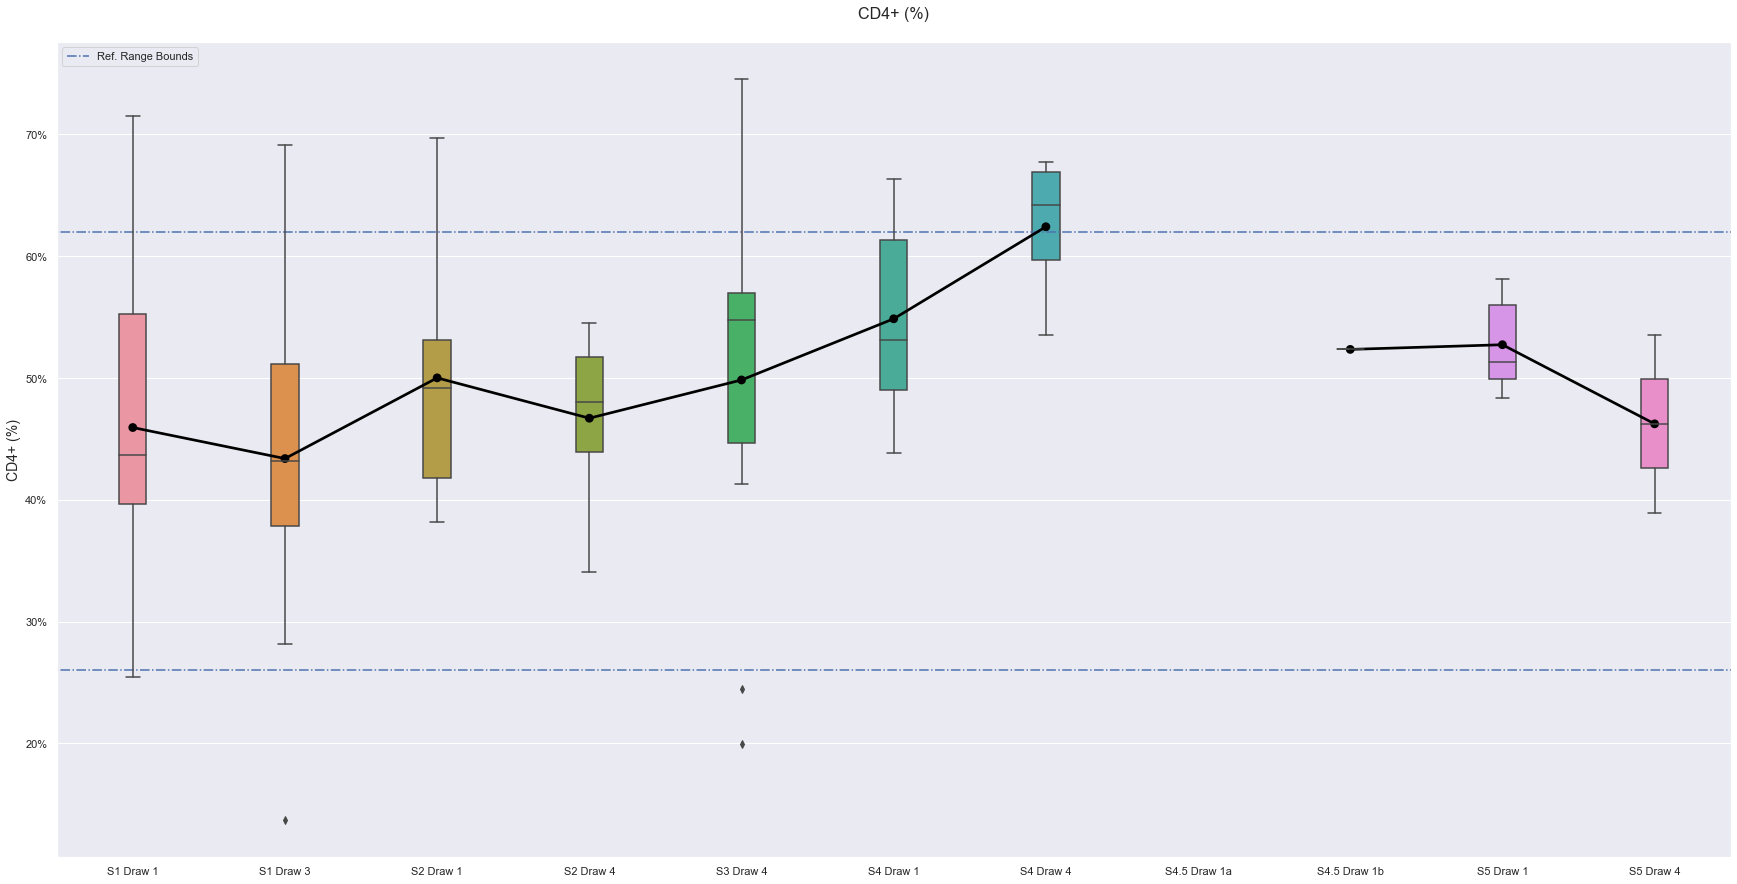

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\utils.py:178: FutureWarning: This function is deprecated and will be removed in a future version
  warnings.warn(msg, FutureWarning)


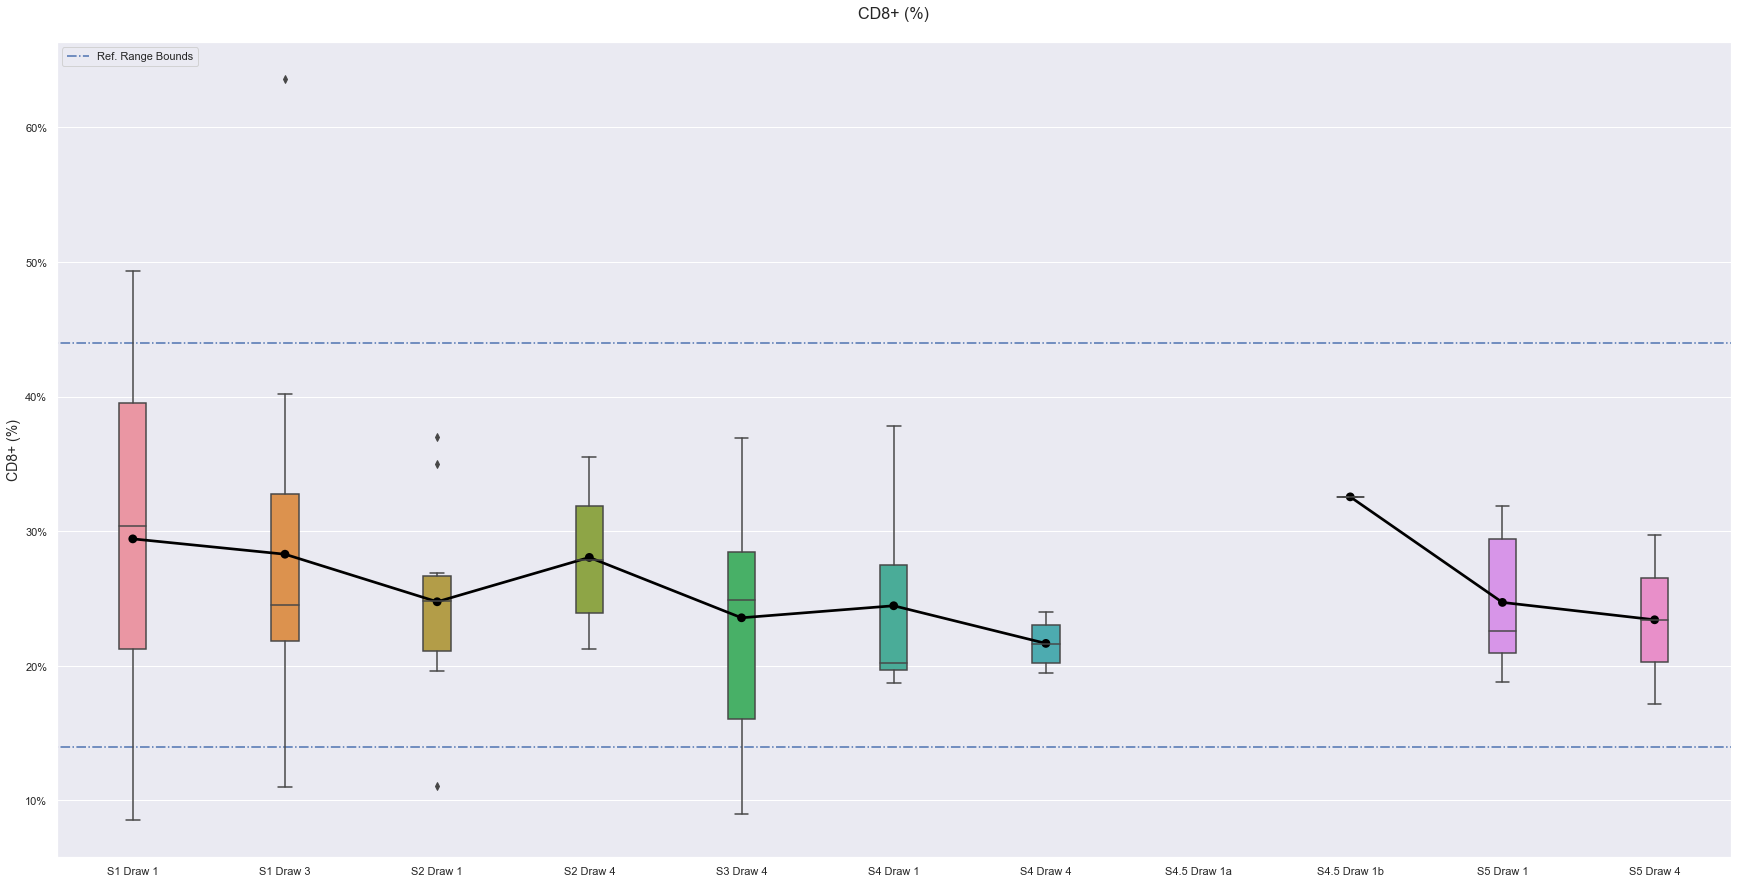

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\utils.py:178: FutureWarning: This function is deprecated and will be removed in a future version
  warnings.warn(msg, FutureWarning)


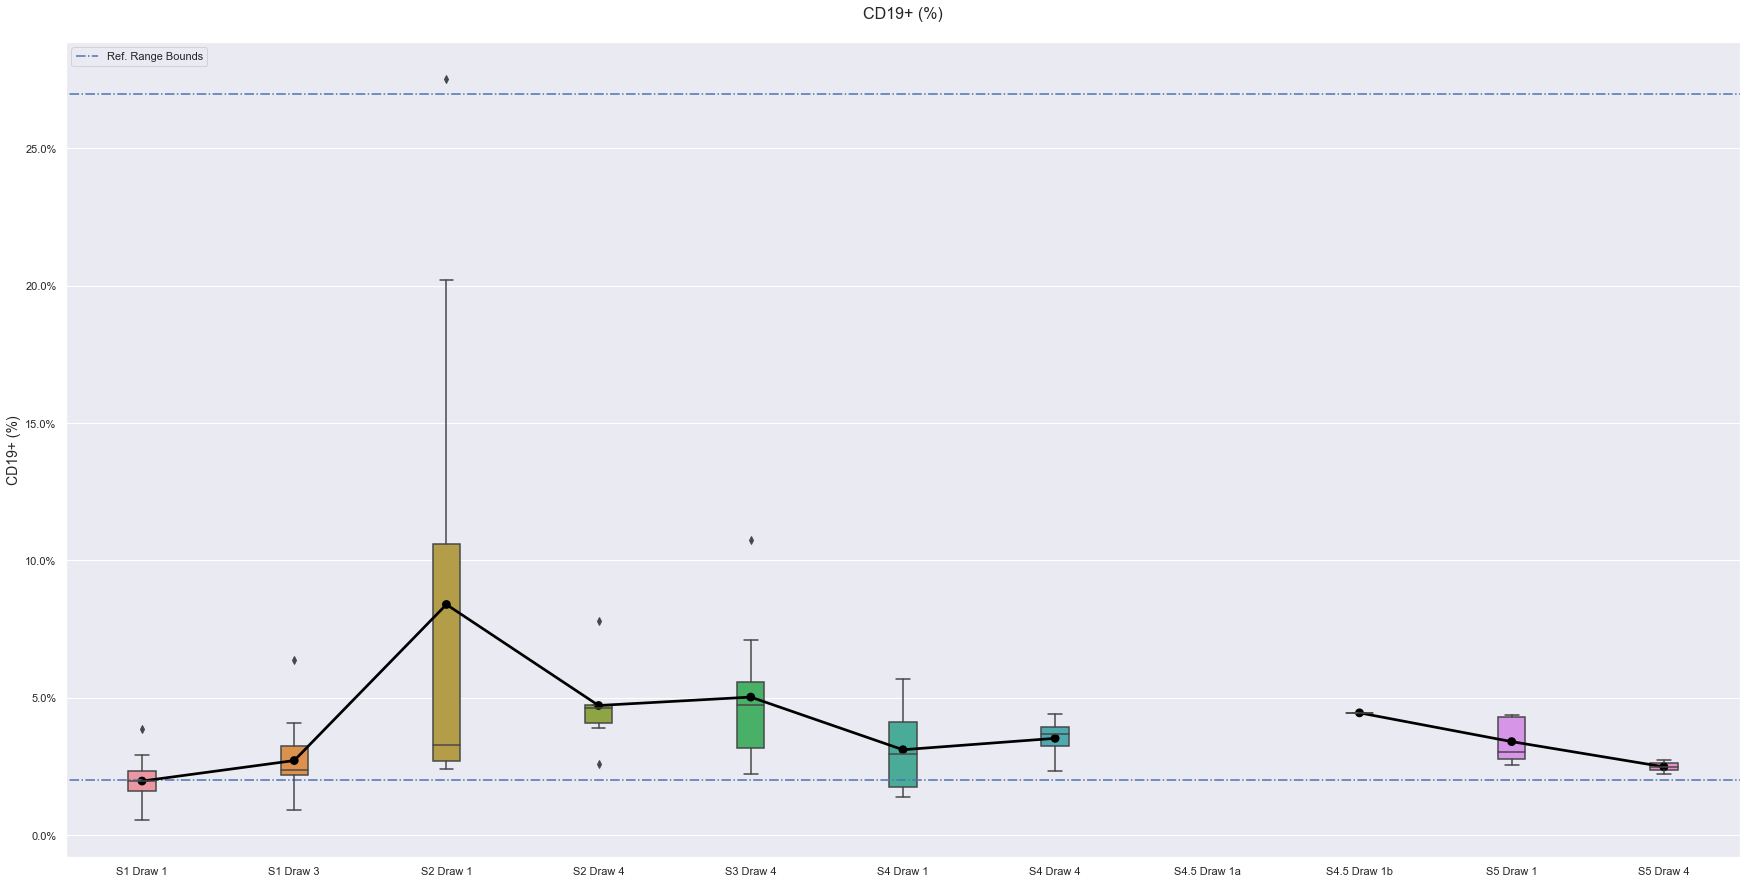

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\utils.py:178: FutureWarning: This function is deprecated and will be removed in a future version
  warnings.warn(msg, FutureWarning)
No handles with labels found to put in legend.


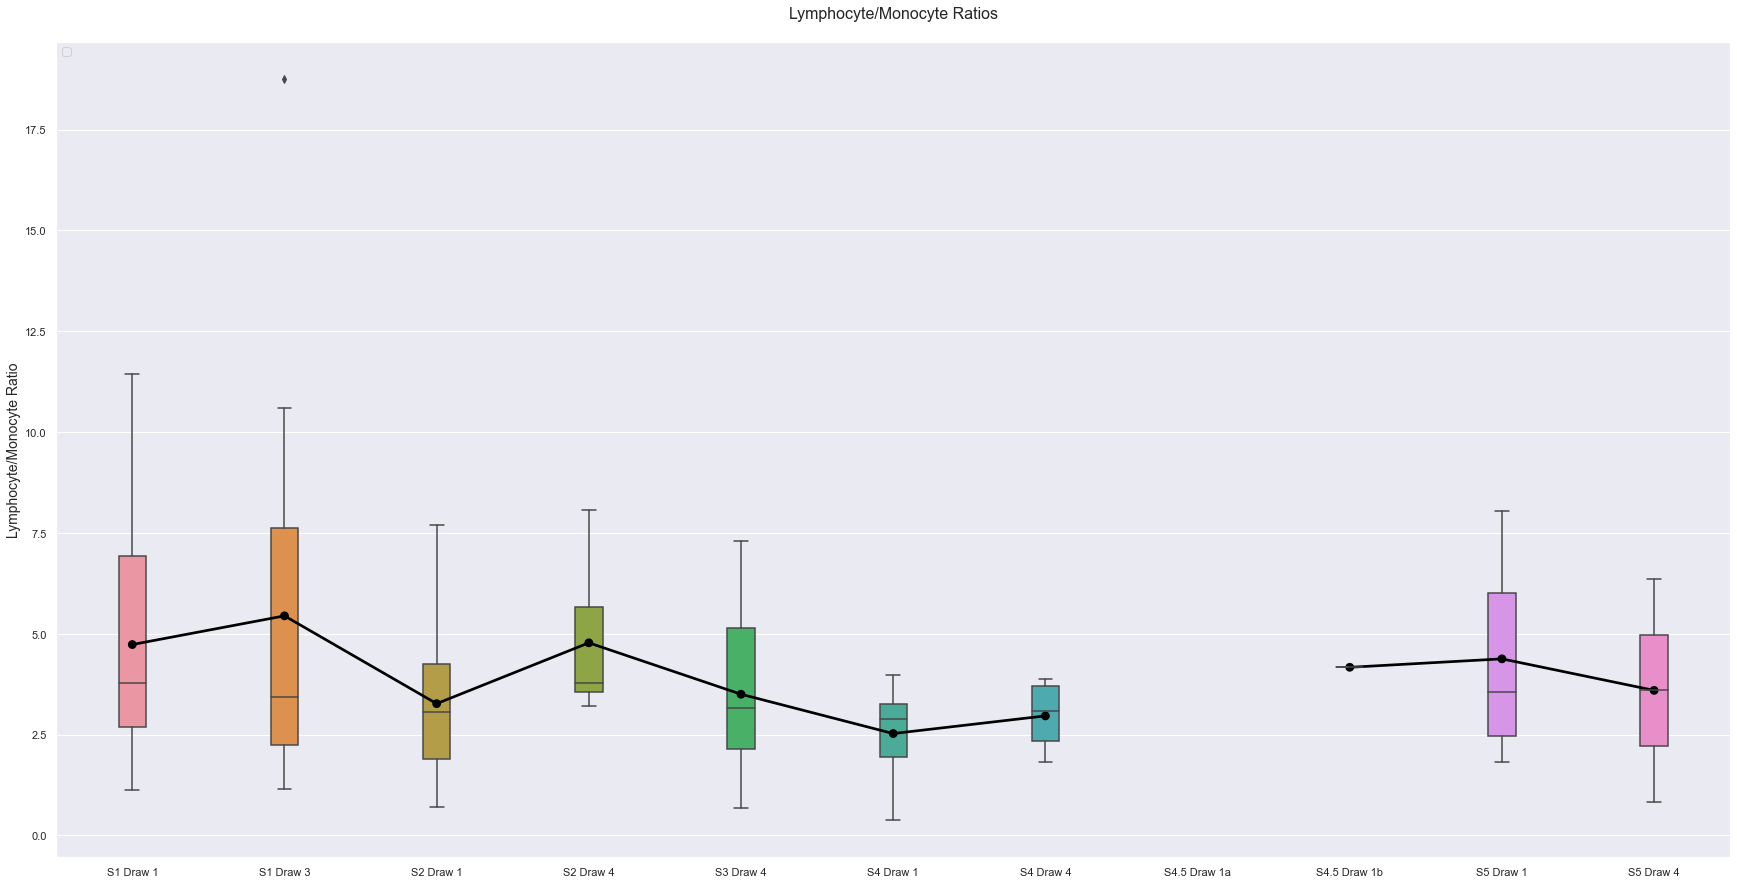

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\utils.py:178: FutureWarning: This function is deprecated and will be removed in a future version
  warnings.warn(msg, FutureWarning)


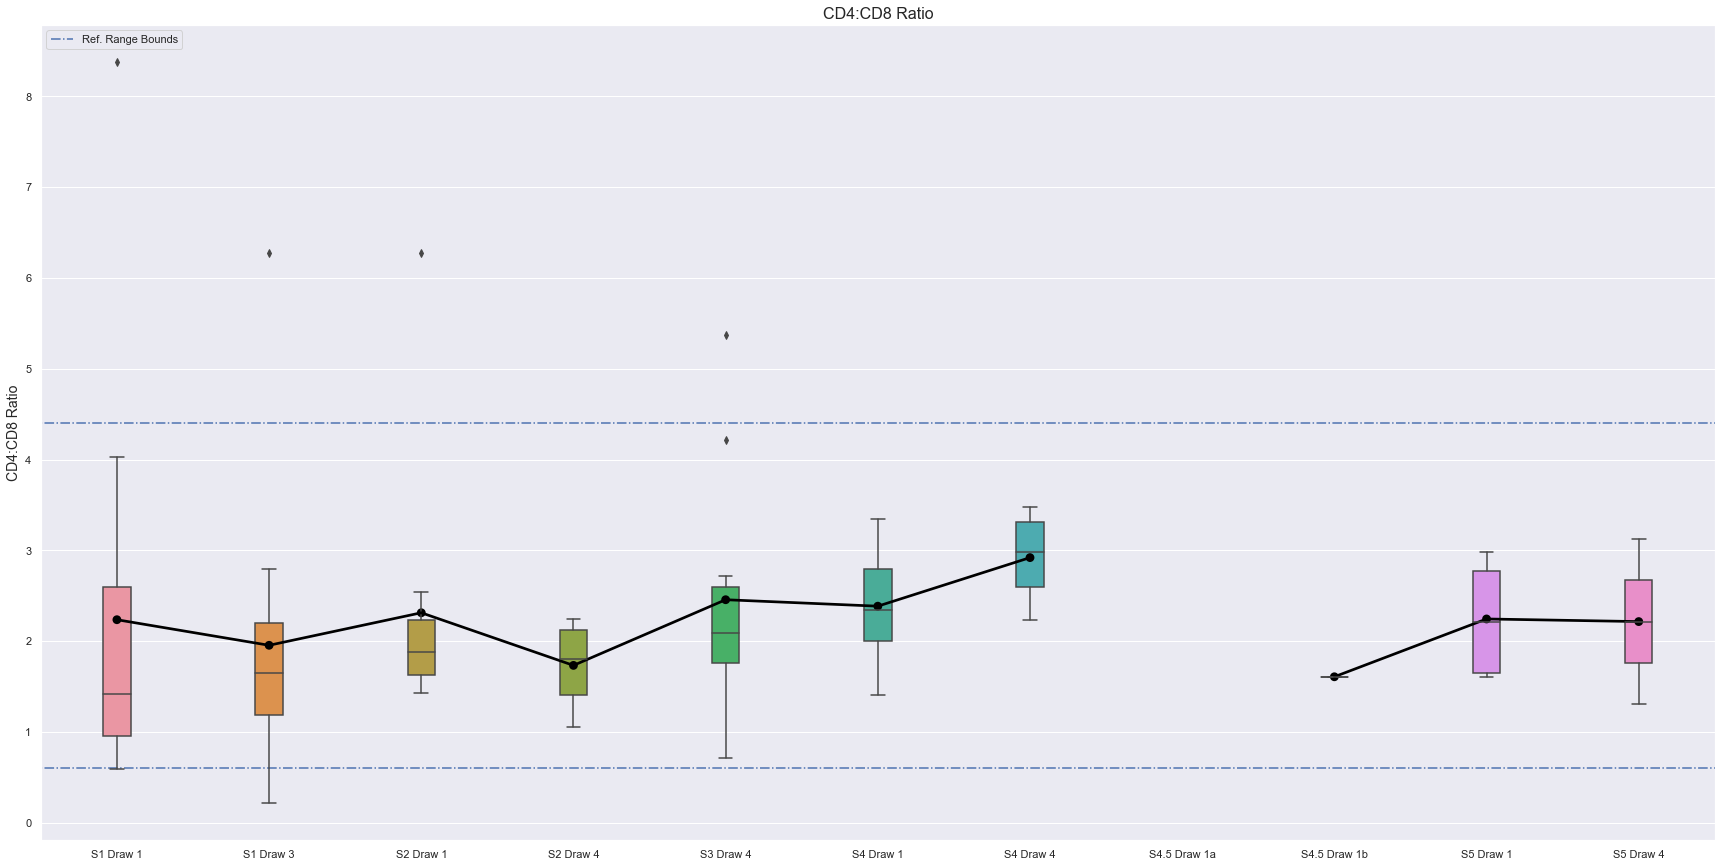

In [127]:
#This time, try only females.
for i in desired_feat:
    plot_data= {
        'S1 Draw 1': wd[wd_list[0]][wd[wd_list[0]]['Gender'] == 'F'][i],
        'S1 Draw 3': wd[wd_list[1]][wd[wd_list[1]]['Gender'] == 'F'][i],
        'S2 Draw 1': wd[wd_list[2]][wd[wd_list[2]]['Gender'] == 'F'][i],
        'S2 Draw 4': wd[wd_list[3]][wd[wd_list[3]]['Gender'] == 'F'][i],
        'S3 Draw 4': wd[wd_list[4]][wd[wd_list[4]]['Gender'] == 'F'][i],
        'S4 Draw 1': wd[wd_list[5]][wd[wd_list[5]]['Gender'] == 'F'][i],
        'S4 Draw 4': wd[wd_list[6]][wd[wd_list[6]]['Gender'] == 'F'][i],
        'S4.5 Draw 1a': wd[wd_list[7]][wd[wd_list[7]]['Gender'] == 'F'][i],
        'S4.5 Draw 1b': wd[wd_list[8]][wd[wd_list[8]]['Gender'] == 'F'][i],
        'S5 Draw 1': wd[wd_list[9]][wd[wd_list[9]]['Gender'] == 'F'][i],
        'S5 Draw 4': wd[wd_list[10]][wd[wd_list[10]]['Gender'] == 'F'][i]
    }
    sorted_keys, sorted_vals = zip(*sorted(plot_data.items(), key=op.itemgetter(0)))

    #Get data in a proper format.
    fixed_data = list(plot_data)
    fig, ax = plt.subplots(figsize=dims)

    #Set up the graph parameters.
    sns.set(context='notebook', style='darkgrid')

    b = sns.boxplot(data=sorted_vals, width=.18)
    
    if i != 'lymphocyte/monocyte ratio':
        sns.utils.axlabel(xlabel='', ylabel=i[1:] + ' (%)', fontsize=axes_label_size)
        b.set_title(i[1:] + ' (%)\n', fontsize=title_size)
        
        #Reference ranges found in the Florida paper.
        ax.hlines(ref.loc[ref_idx[i],['Ref. Min']]/100, xmin = -1, xmax = 12, ls='-.', label = 'Ref. Range Lower Bound')
        ax.hlines(ref.loc[ref_idx[i],['Ref. Max']]/100, xmin = -1, xmax = 12, ls='-.', label = 'Ref. Range Upper Bound')
    else:
        sns.utils.axlabel(xlabel='', ylabel='Lymphocyte/Monocyte Ratio', fontsize=axes_label_size)
        b.set_title('Lymphocyte/Monocyte Ratios\n', fontsize=title_size)
    
    ax = sns.pointplot(data=sorted_vals, ci=None, color='black')
    #sns.swarmplot(data=sorted_vals, size=6, edgecolor="black", linewidth=.9)
    
    if i != 'lymphocyte/monocyte ratio':
        b.axes.yaxis.set_major_formatter(PercentFormatter(1))
        
    #Category labels added here
    plt.xticks(plt.xticks()[0], sorted_keys)
    handles, _ = ax.get_legend_handles_labels()
    ax.legend(loc='upper left', handles=handles, labels=["Ref. Range Bounds"])
    plt.show()
    
#A separate run needed for CD4:CD8 Ratio.
plot_data= {
    'S1 Draw 1': wd[wd_list[0]][wd[wd_list[0]]['Gender'] == 'F'][desired_feat[1]]/wd[wd_list[0]][wd[wd_list[0]]['Gender'] == 'F'][desired_feat[2]],
    'S1 Draw 3': wd[wd_list[1]][wd[wd_list[1]]['Gender'] == 'F'][desired_feat[1]]/wd[wd_list[1]][wd[wd_list[1]]['Gender'] == 'F'][desired_feat[2]],
    'S2 Draw 1': wd[wd_list[2]][wd[wd_list[2]]['Gender'] == 'F'][desired_feat[1]]/wd[wd_list[2]][wd[wd_list[2]]['Gender'] == 'F'][desired_feat[2]],
    'S2 Draw 4': wd[wd_list[3]][wd[wd_list[3]]['Gender'] == 'F'][desired_feat[1]]/wd[wd_list[3]][wd[wd_list[3]]['Gender'] == 'F'][desired_feat[2]],
    'S3 Draw 4': wd[wd_list[4]][wd[wd_list[4]]['Gender'] == 'F'][desired_feat[1]]/wd[wd_list[4]][wd[wd_list[4]]['Gender'] == 'F'][desired_feat[2]],
    'S4 Draw 1': wd[wd_list[5]][wd[wd_list[5]]['Gender'] == 'F'][desired_feat[1]]/wd[wd_list[5]][wd[wd_list[5]]['Gender'] == 'F'][desired_feat[2]],
    'S4 Draw 4': wd[wd_list[6]][wd[wd_list[6]]['Gender'] == 'F'][desired_feat[1]]/wd[wd_list[6]][wd[wd_list[6]]['Gender'] == 'F'][desired_feat[2]],
    'S4.5 Draw 1a': wd[wd_list[7]][wd[wd_list[7]]['Gender'] == 'F'][desired_feat[1]]/wd[wd_list[7]][wd[wd_list[7]]['Gender'] == 'F'][desired_feat[2]],
    'S4.5 Draw 1b': wd[wd_list[8]][wd[wd_list[8]]['Gender'] == 'F'][desired_feat[1]]/wd[wd_list[8]][wd[wd_list[8]]['Gender'] == 'F'][desired_feat[2]],
    'S5 Draw 1': wd[wd_list[9]][wd[wd_list[9]]['Gender'] == 'F'][desired_feat[1]]/wd[wd_list[9]][wd[wd_list[9]]['Gender'] == 'F'][desired_feat[2]],
    'S5 Draw 4': wd[wd_list[10]][wd[wd_list[10]]['Gender'] == 'F'][desired_feat[1]]/wd[wd_list[10]][wd[wd_list[10]]['Gender'] == 'F'][desired_feat[2]]
}
sorted_keys, sorted_vals = zip(*sorted(plot_data.items(), key=op.itemgetter(0)))

#Get data in a proper format.
fixed_data = list(plot_data)
fig, ax = plt.subplots(figsize=dims)

#Set up the graph parameters.
sns.set(context='notebook', style='darkgrid')

b = sns.boxplot(data=sorted_vals, width=.18)

sns.utils.axlabel(xlabel='', ylabel='CD4:CD8 Ratio', fontsize=axes_label_size)
b.set_title('CD4:CD8 Ratio', fontsize=title_size)

#Reference ranges found in the Florida paper.
ax.hlines(ref.loc[cd4_cd8_ratio_idx,['Ref. Min']], xmin = -1, xmax = 12, ls='-.', label = 'Ref. Range Lower Bound')
ax.hlines(ref.loc[cd4_cd8_ratio_idx,['Ref. Max']], xmin = -1, xmax = 12, ls='-.', label = 'Ref. Range Upper Bound')

ax = sns.pointplot(data=sorted_vals, ci=None, color='black')
#sns.swarmplot(data=sorted_vals, size=6, edgecolor="black", linewidth=.9)

if i != 'lymphocyte/monocyte ratio':
    b.axes.yaxis.set_major_formatter(PercentFormatter(1))

#Category labels added here
plt.xticks(plt.xticks()[0], sorted_keys)
handles, _ = ax.get_legend_handles_labels()
ax.legend(loc='upper left', handles=handles, labels=["Ref. Range Bounds"])
plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\utils.py:178: FutureWarning: This function is deprecated and will be removed in a future version
  warnings.warn(msg, FutureWarning)


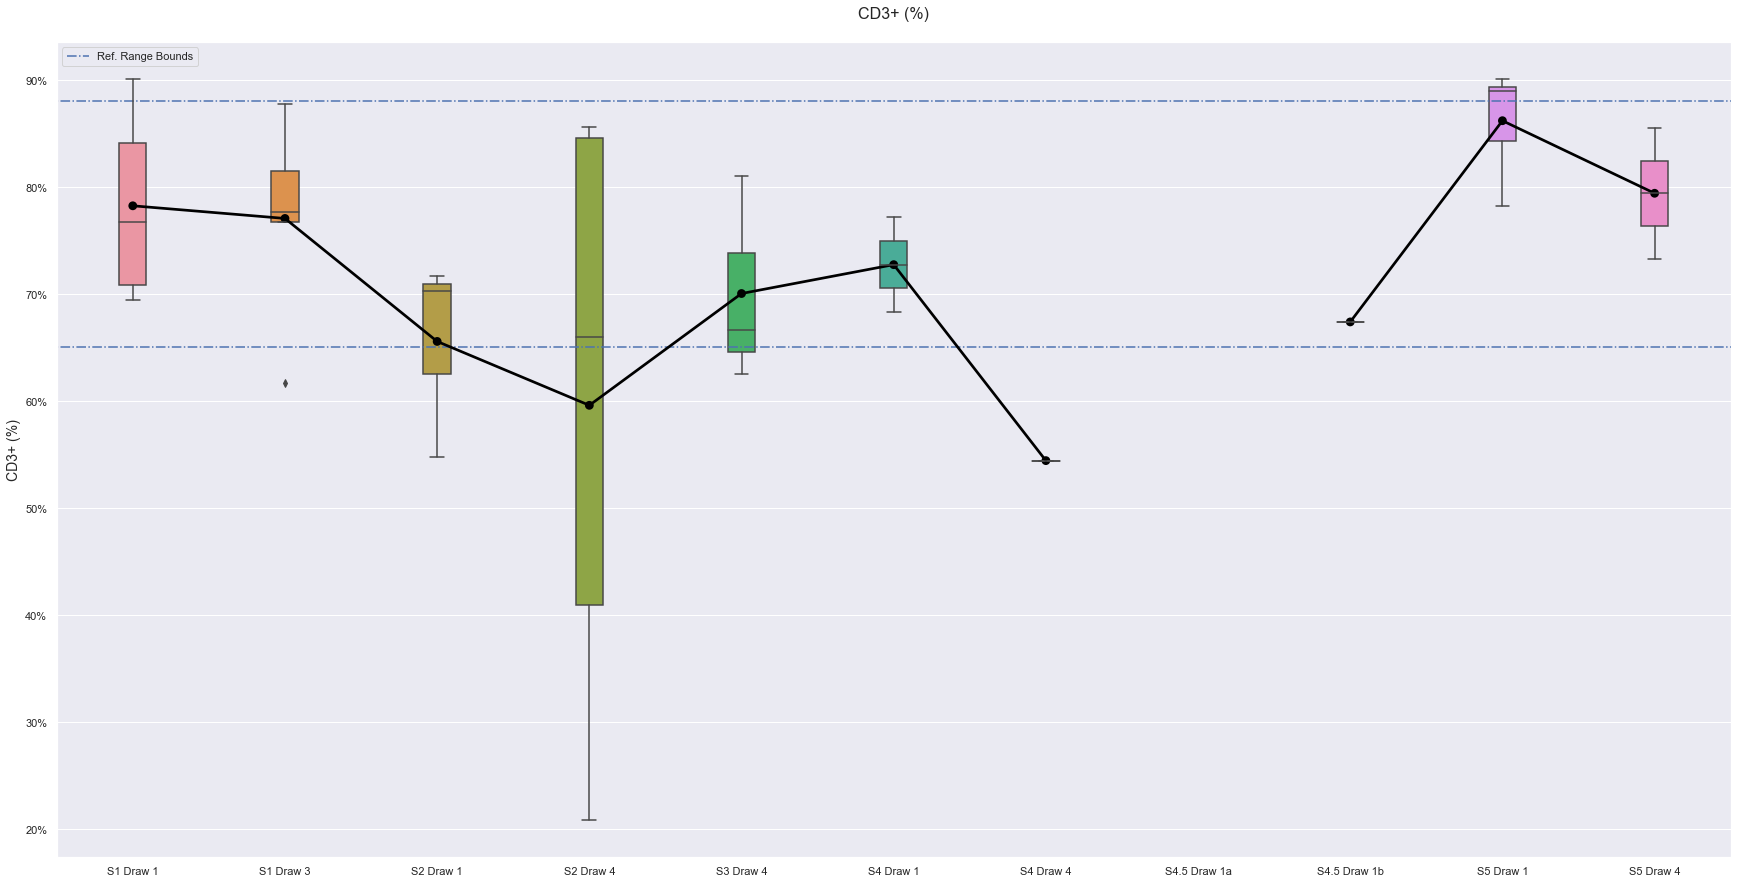

In [145]:
i = desired_feat[0]
plot_data= {
    'S1 Draw 1': wd[wd_list[0]].loc[wd[wd_list[0]]['Subject ID'].isin(wd[wd_list[9]][wd[wd_list[9]]['Gender'] == 'F']['Subject ID'])][i],
    'S1 Draw 3': wd[wd_list[1]].loc[wd[wd_list[1]]['Subject ID'].isin(wd[wd_list[9]][wd[wd_list[9]]['Gender'] == 'F']['Subject ID'])][i],
    'S2 Draw 1': wd[wd_list[2]].loc[wd[wd_list[2]]['Subject ID'].isin(wd[wd_list[9]][wd[wd_list[9]]['Gender'] == 'F']['Subject ID'])][i],
    'S2 Draw 4': wd[wd_list[3]].loc[wd[wd_list[3]]['Subject ID'].isin(wd[wd_list[9]][wd[wd_list[9]]['Gender'] == 'F']['Subject ID'])][i],
    'S3 Draw 4': wd[wd_list[4]].loc[wd[wd_list[4]]['Subject ID'].isin(wd[wd_list[9]][wd[wd_list[9]]['Gender'] == 'F']['Subject ID'])][i],
    'S4 Draw 1': wd[wd_list[5]].loc[wd[wd_list[5]]['Subject ID'].isin(wd[wd_list[9]][wd[wd_list[9]]['Gender'] == 'F']['Subject ID'])][i],
    'S4 Draw 4': wd[wd_list[6]].loc[wd[wd_list[6]]['Subject ID'].isin(wd[wd_list[9]][wd[wd_list[9]]['Gender'] == 'F']['Subject ID'])][i],
    'S4.5 Draw 1a': wd[wd_list[7]].loc[wd[wd_list[7]]['Subject ID'].isin(wd[wd_list[9]][wd[wd_list[9]]['Gender'] == 'F']['Subject ID'])][i],
    'S4.5 Draw 1b': wd[wd_list[8]].loc[wd[wd_list[8]]['Subject ID'].isin(wd[wd_list[9]][wd[wd_list[9]]['Gender'] == 'F']['Subject ID'])][i],
    'S5 Draw 1': wd[wd_list[9]].loc[wd[wd_list[9]]['Subject ID'].isin(wd[wd_list[9]][wd[wd_list[9]]['Gender'] == 'F']['Subject ID'])][i],
    'S5 Draw 4': wd[wd_list[10]].loc[wd[wd_list[10]]['Subject ID'].isin(wd[wd_list[9]][wd[wd_list[9]]['Gender'] == 'F']['Subject ID'])][i]
}
sorted_keys, sorted_vals = zip(*sorted(plot_data.items(), key=op.itemgetter(0)))

#Get data in a proper format.
fixed_data = list(plot_data)
fig, ax = plt.subplots(figsize=dims)

#Set up the graph parameters.
b = sns.boxplot(data=sorted_vals, width=.18)

if i != 'lymphocyte/monocyte ratio':
    sns.utils.axlabel(xlabel='', ylabel=i[1:] + ' (%)', fontsize=axes_label_size)
    b.set_title(i[1:] + ' (%)\n', fontsize=title_size)

    #Reference ranges found in the Florida paper.
    ax.hlines(ref.loc[ref_idx[i],['Ref. Max']]/100, xmin = -1, xmax = 12, ls='-.', label = 'Ref. Range Lower Bound')
    ax.hlines(ref.loc[ref_idx[i],['Ref. Min']]/100, xmin = -1, xmax = 12, ls='-.', label = 'Ref. Range Upper Bound')
else:
    sns.utils.axlabel(xlabel='', ylabel='Lymphocyte/Monocyte Ratio', fontsize=axes_label_size)
    b.set_title('Lymphocyte/Monocyte Ratios\n', fontsize=title_size)

ax = sns.pointplot(data=sorted_vals, ci=None, color='black')
#sns.swarmplot(data=sorted_vals, size=6, edgecolor="black", linewidth=.9)

if i != 'lymphocyte/monocyte ratio':
    b.axes.yaxis.set_major_formatter(PercentFormatter(1))

#Category labels added here
plt.xticks(plt.xticks()[0], sorted_keys)
handles, _ = ax.get_legend_handles_labels()
ax.legend(loc='upper left', handles=handles, labels=["Ref. Range Bounds"])
plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\utils.py:178: FutureWarning: This function is deprecated and will be removed in a future version
  warnings.warn(msg, FutureWarning)


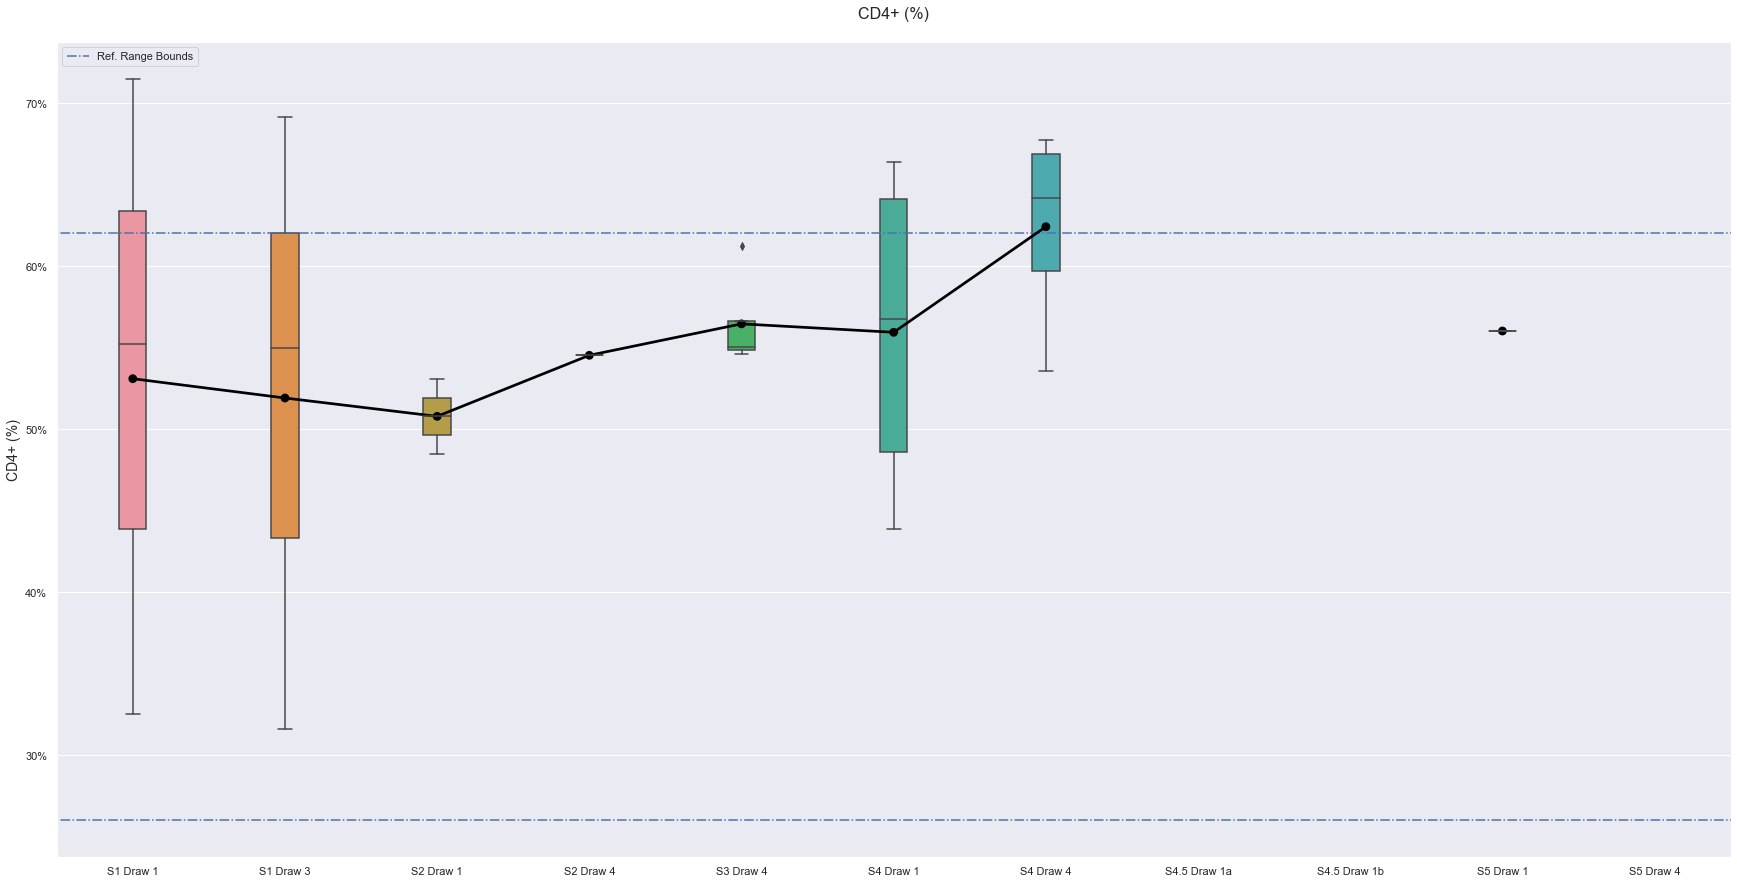

In [132]:
i = desired_feat[1]
plot_data= {
    'S1 Draw 1': wd[wd_list[0]].loc[wd[wd_list[0]]['Subject ID'].isin(wd[wd_list[6]][wd[wd_list[6]]['Gender'] == 'F']['Subject ID'])][i],
    'S1 Draw 3': wd[wd_list[1]].loc[wd[wd_list[1]]['Subject ID'].isin(wd[wd_list[6]][wd[wd_list[6]]['Gender'] == 'F']['Subject ID'])][i],
    'S2 Draw 1': wd[wd_list[2]].loc[wd[wd_list[2]]['Subject ID'].isin(wd[wd_list[6]][wd[wd_list[6]]['Gender'] == 'F']['Subject ID'])][i],
    'S2 Draw 4': wd[wd_list[3]].loc[wd[wd_list[3]]['Subject ID'].isin(wd[wd_list[6]][wd[wd_list[6]]['Gender'] == 'F']['Subject ID'])][i],
    'S3 Draw 4': wd[wd_list[4]].loc[wd[wd_list[4]]['Subject ID'].isin(wd[wd_list[6]][wd[wd_list[6]]['Gender'] == 'F']['Subject ID'])][i],
    'S4 Draw 1': wd[wd_list[5]].loc[wd[wd_list[5]]['Subject ID'].isin(wd[wd_list[6]][wd[wd_list[6]]['Gender'] == 'F']['Subject ID'])][i],
    'S4 Draw 4': wd[wd_list[6]].loc[wd[wd_list[6]]['Subject ID'].isin(wd[wd_list[6]][wd[wd_list[6]]['Gender'] == 'F']['Subject ID'])][i],
    'S4.5 Draw 1a': wd[wd_list[7]].loc[wd[wd_list[7]]['Subject ID'].isin(wd[wd_list[6]][wd[wd_list[6]]['Gender'] == 'F']['Subject ID'])][i],
    'S4.5 Draw 1b': wd[wd_list[8]].loc[wd[wd_list[8]]['Subject ID'].isin(wd[wd_list[6]][wd[wd_list[6]]['Gender'] == 'F']['Subject ID'])][i],
    'S5 Draw 1': wd[wd_list[9]].loc[wd[wd_list[9]]['Subject ID'].isin(wd[wd_list[6]][wd[wd_list[6]]['Gender'] == 'F']['Subject ID'])][i],
    'S5 Draw 4': wd[wd_list[10]].loc[wd[wd_list[10]]['Subject ID'].isin(wd[wd_list[6]][wd[wd_list[6]]['Gender'] == 'F']['Subject ID'])][i]
}
sorted_keys, sorted_vals = zip(*sorted(plot_data.items(), key=op.itemgetter(0)))

#Get data in a proper format.
fixed_data = list(plot_data)
fig, ax = plt.subplots(figsize=dims)

#Set up the graph parameters.
b = sns.boxplot(data=sorted_vals, width=.18)

if i != 'lymphocyte/monocyte ratio':
    sns.utils.axlabel(xlabel='', ylabel=i[1:] + ' (%)', fontsize=axes_label_size)
    b.set_title(i[1:] + ' (%)\n', fontsize=title_size)

    #Reference ranges found in the Florida paper.
    ax.hlines(ref.loc[ref_idx[i],['Ref. Max']]/100, xmin = -1, xmax = 12, ls='-.', label = 'Ref. Range Lower Bound')
    ax.hlines(ref.loc[ref_idx[i],['Ref. Min']]/100, xmin = -1, xmax = 12, ls='-.', label = 'Ref. Range Upper Bound')
else:
    sns.utils.axlabel(xlabel='', ylabel='Lymphocyte/Monocyte Ratio', fontsize=axes_label_size)
    b.set_title('Lymphocyte/Monocyte Ratios\n', fontsize=title_size)

ax = sns.pointplot(data=sorted_vals, ci=None, color='black')
#sns.swarmplot(data=sorted_vals, size=6, edgecolor="black", linewidth=.9)

if i != 'lymphocyte/monocyte ratio':
    b.axes.yaxis.set_major_formatter(PercentFormatter(1))

#Category labels added here
plt.xticks(plt.xticks()[0], sorted_keys)
handles, _ = ax.get_legend_handles_labels()
ax.legend(loc='upper left', handles=handles, labels=["Ref. Range Bounds"])
plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\utils.py:178: FutureWarning: This function is deprecated and will be removed in a future version
  warnings.warn(msg, FutureWarning)


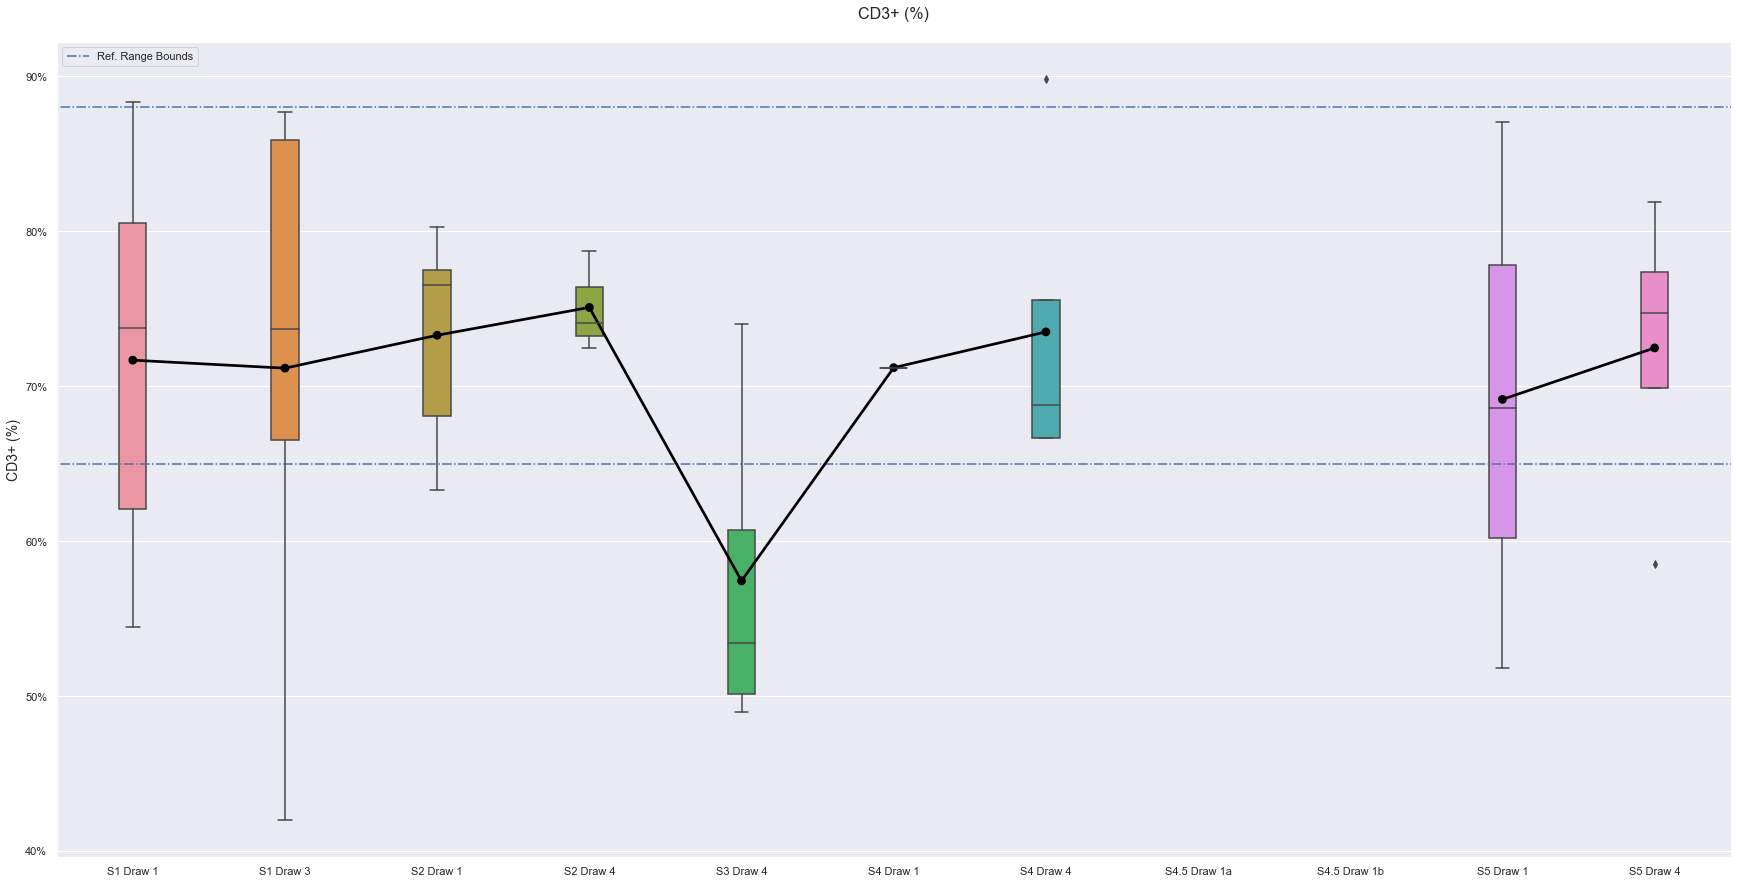

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\utils.py:178: FutureWarning: This function is deprecated and will be removed in a future version
  warnings.warn(msg, FutureWarning)


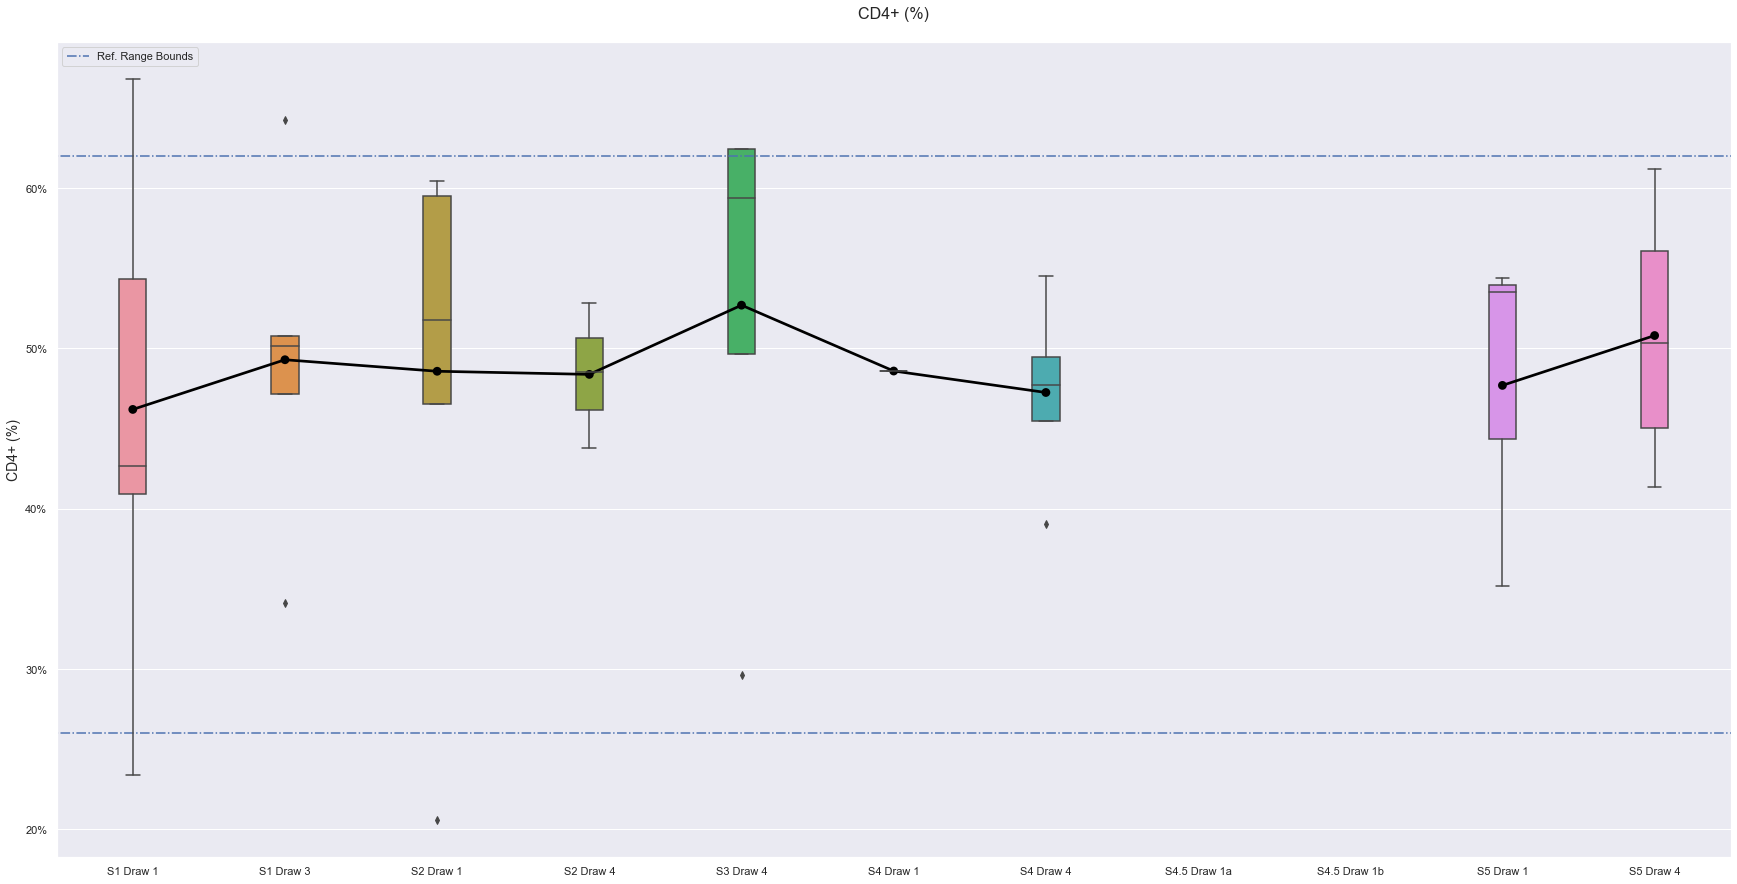

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\utils.py:178: FutureWarning: This function is deprecated and will be removed in a future version
  warnings.warn(msg, FutureWarning)


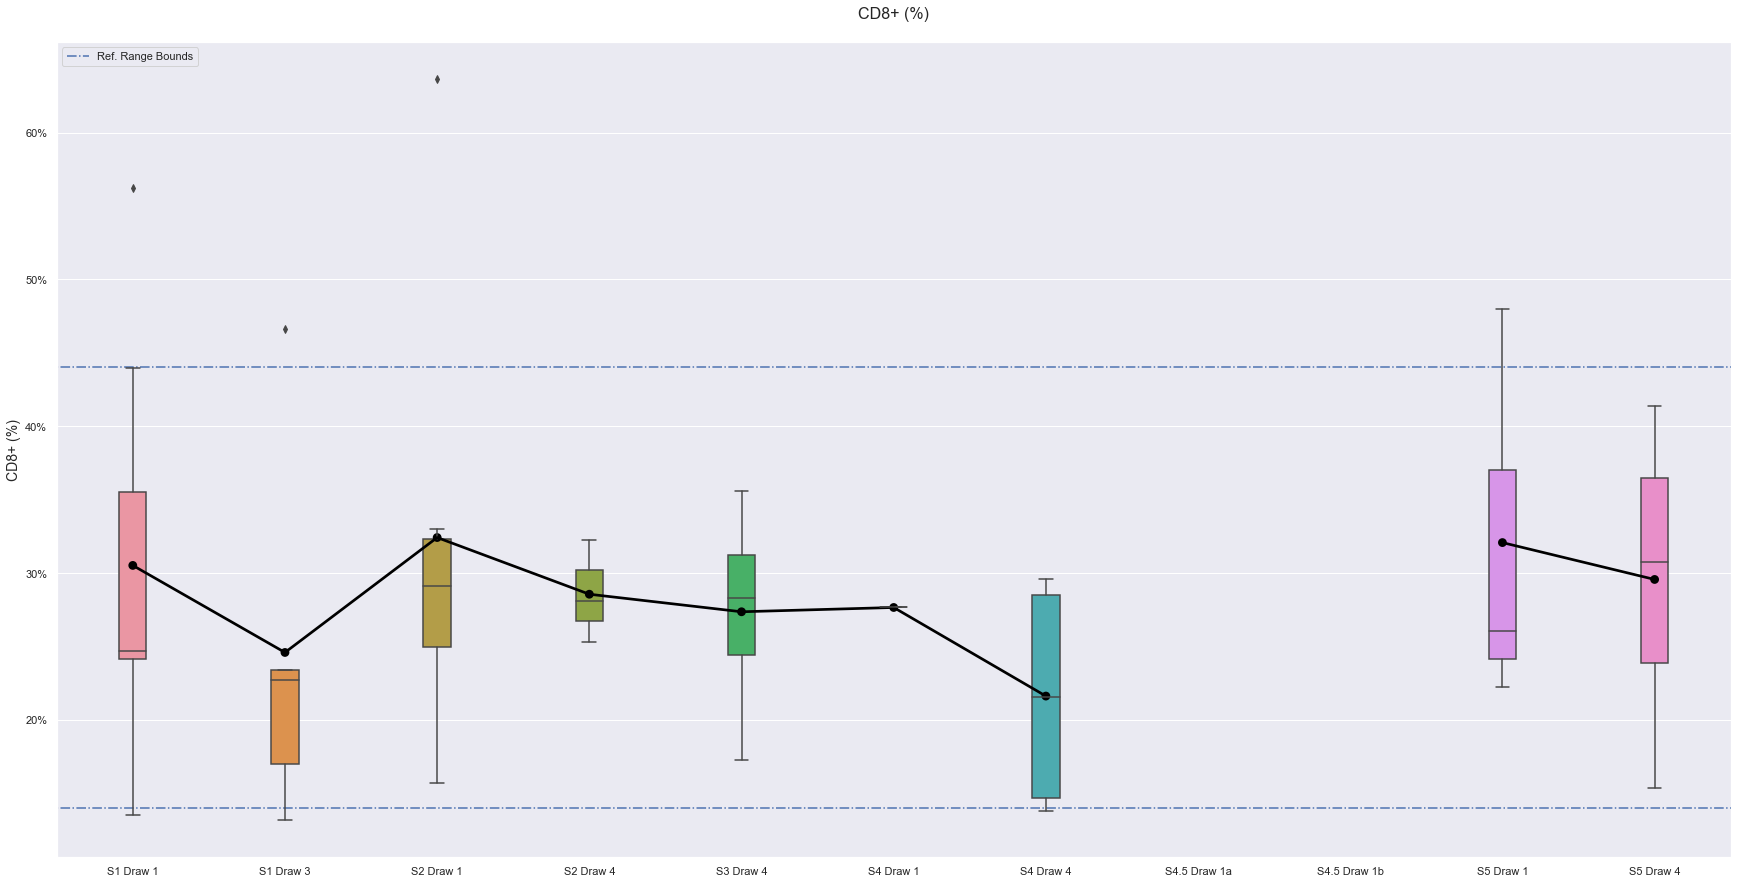

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\utils.py:178: FutureWarning: This function is deprecated and will be removed in a future version
  warnings.warn(msg, FutureWarning)


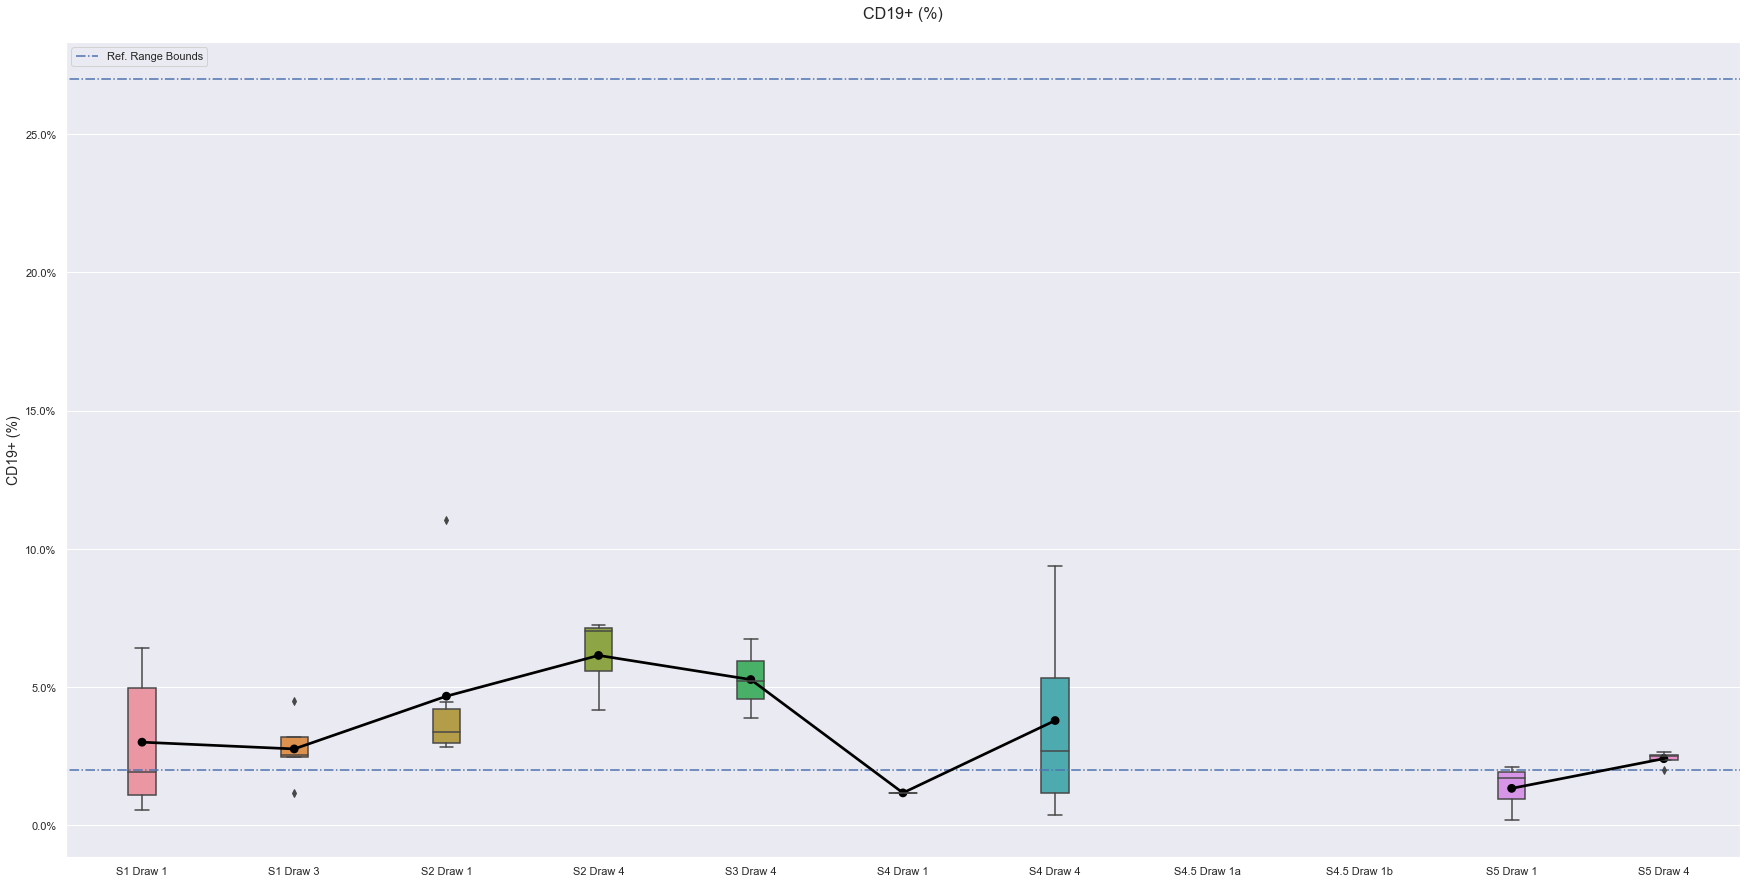

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\utils.py:178: FutureWarning: This function is deprecated and will be removed in a future version
  warnings.warn(msg, FutureWarning)
No handles with labels found to put in legend.


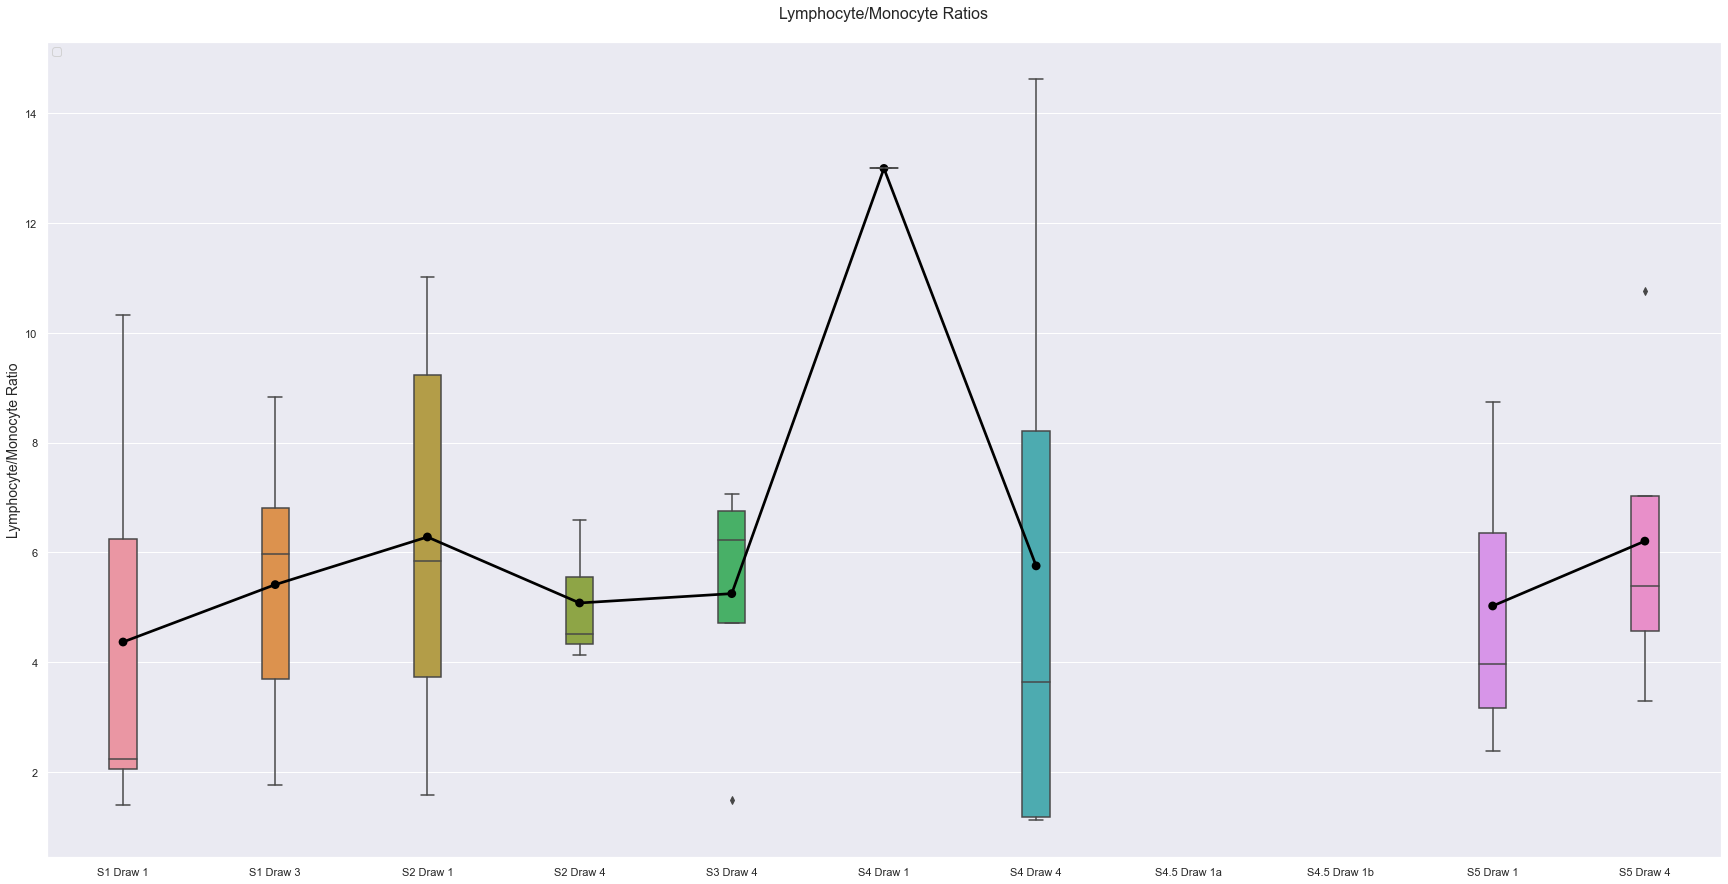

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\utils.py:178: FutureWarning: This function is deprecated and will be removed in a future version
  warnings.warn(msg, FutureWarning)


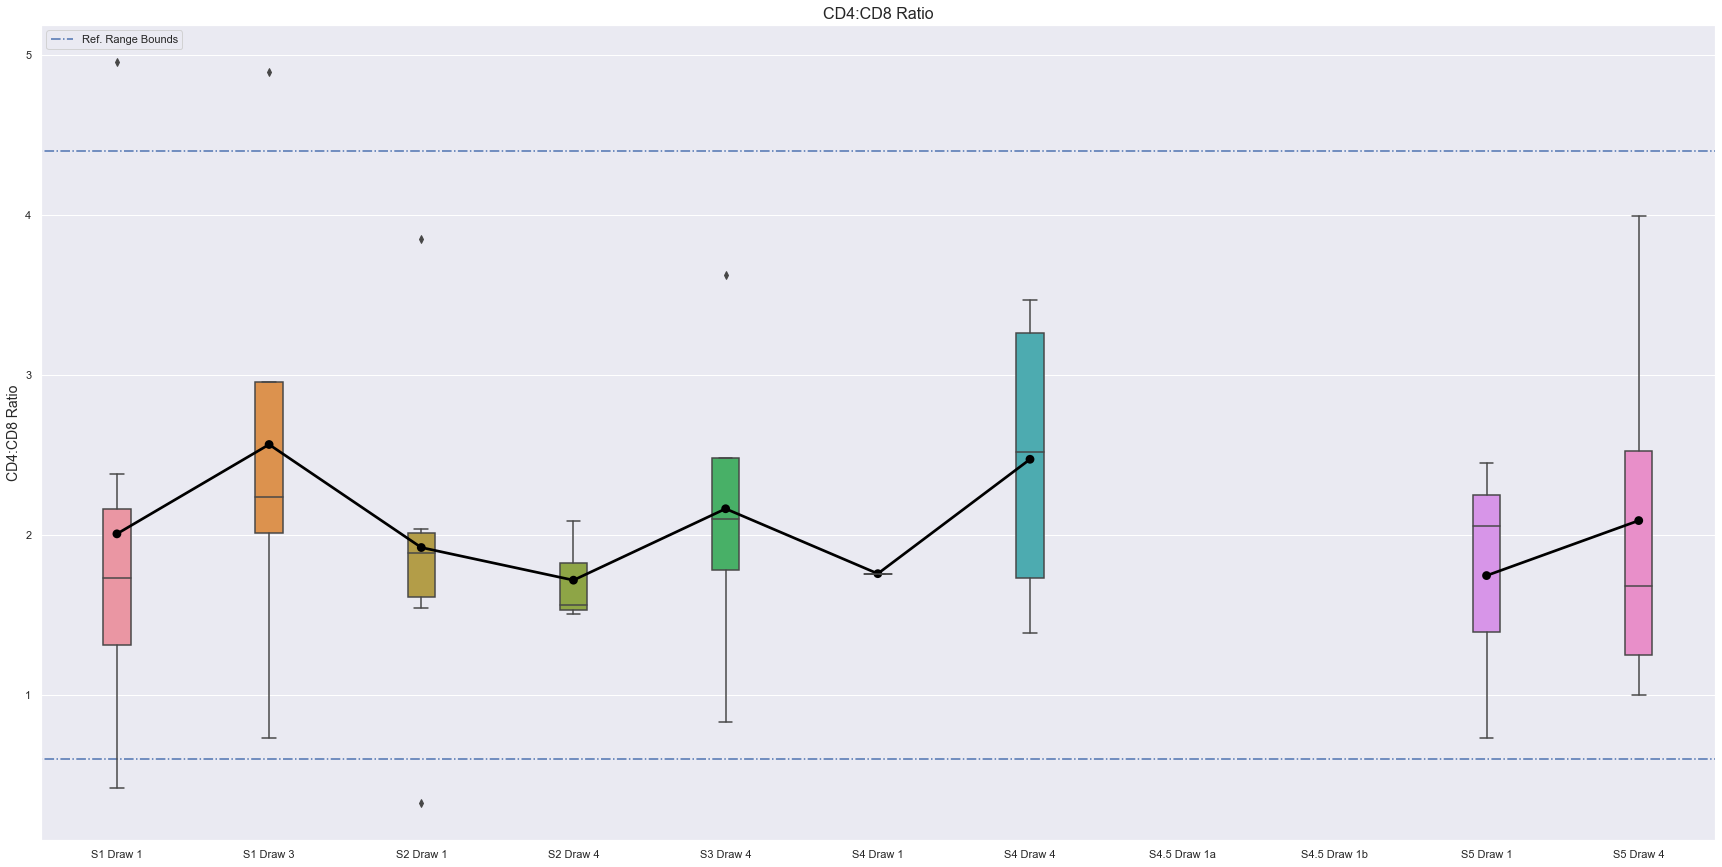

In [133]:
#This time, try only Very Poor.
for i in desired_feat:
    plot_data= {
        'S1 Draw 1': wd[wd_list[0]][wd[wd_list[0]]['VO2 Rank (Bin)'] == 'Very Poor'][i],
        'S1 Draw 3': wd[wd_list[1]][wd[wd_list[1]]['VO2 Rank (Bin)'] == 'Very Poor'][i],
        'S2 Draw 1': wd[wd_list[2]][wd[wd_list[2]]['VO2 Rank (Bin)'] == 'Very Poor'][i],
        'S2 Draw 4': wd[wd_list[3]][wd[wd_list[3]]['VO2 Rank (Bin)'] == 'Very Poor'][i],
        'S3 Draw 4': wd[wd_list[4]][wd[wd_list[4]]['VO2 Rank (Bin)'] == 'Very Poor'][i],
        'S4 Draw 1': wd[wd_list[5]][wd[wd_list[5]]['VO2 Rank (Bin)'] == 'Very Poor'][i],
        'S4 Draw 4': wd[wd_list[6]][wd[wd_list[6]]['VO2 Rank (Bin)'] == 'Very Poor'][i],
        'S4.5 Draw 1a': wd[wd_list[7]][wd[wd_list[7]]['VO2 Rank (Bin)'] == 'Very Poor'][i],
        'S4.5 Draw 1b': wd[wd_list[8]][wd[wd_list[8]]['VO2 Rank (Bin)'] == 'Very Poor'][i],
        'S5 Draw 1': wd[wd_list[9]][wd[wd_list[9]]['VO2 Rank (Bin)'] == 'Very Poor'][i],
        'S5 Draw 4': wd[wd_list[10]][wd[wd_list[10]]['VO2 Rank (Bin)'] == 'Very Poor'][i]
    }
    sorted_keys, sorted_vals = zip(*sorted(plot_data.items(), key=op.itemgetter(0)))

    #Get data in a proper format.
    fixed_data = list(plot_data)
    fig, ax = plt.subplots(figsize=dims)

    #Set up the graph parameters.
    sns.set(context='notebook', style='darkgrid')

    b = sns.boxplot(data=sorted_vals, width=.18)
    
    if i != 'lymphocyte/monocyte ratio':
        sns.utils.axlabel(xlabel='', ylabel=i[1:] + ' (%)', fontsize=axes_label_size)
        b.set_title(i[1:] + ' (%)\n', fontsize=title_size)
        
        #Reference ranges found in the Florida paper.
        ax.hlines(ref.loc[ref_idx[i],['Ref. Min']]/100, xmin = -1, xmax = 12, ls='-.', label = 'Ref. Range Lower Bound')
        ax.hlines(ref.loc[ref_idx[i],['Ref. Max']]/100, xmin = -1, xmax = 12, ls='-.', label = 'Ref. Range Upper Bound')
    else:
        sns.utils.axlabel(xlabel='', ylabel='Lymphocyte/Monocyte Ratio', fontsize=axes_label_size)
        b.set_title('Lymphocyte/Monocyte Ratios\n', fontsize=title_size)
    
    ax = sns.pointplot(data=sorted_vals, ci=None, color='black')
    #sns.swarmplot(data=sorted_vals, size=6, edgecolor="black", linewidth=.9)
    
    if i != 'lymphocyte/monocyte ratio':
        b.axes.yaxis.set_major_formatter(PercentFormatter(1))
        
    #Category labels added here
    plt.xticks(plt.xticks()[0], sorted_keys)
    handles, _ = ax.get_legend_handles_labels()
    ax.legend(loc='upper left', handles=handles, labels=["Ref. Range Bounds"])
    plt.show()
    
#A separate run needed for CD4:CD8 Ratio.
plot_data= {
    'S1 Draw 1': wd[wd_list[0]][wd[wd_list[0]]['VO2 Rank (Bin)'] == 'Very Poor'][desired_feat[1]]/wd[wd_list[0]][wd[wd_list[0]]['VO2 Rank (Bin)'] == 'Very Poor'][desired_feat[2]],
    'S1 Draw 3': wd[wd_list[1]][wd[wd_list[1]]['VO2 Rank (Bin)'] == 'Very Poor'][desired_feat[1]]/wd[wd_list[1]][wd[wd_list[1]]['VO2 Rank (Bin)'] == 'Very Poor'][desired_feat[2]],
    'S2 Draw 1': wd[wd_list[2]][wd[wd_list[2]]['VO2 Rank (Bin)'] == 'Very Poor'][desired_feat[1]]/wd[wd_list[2]][wd[wd_list[2]]['VO2 Rank (Bin)'] == 'Very Poor'][desired_feat[2]],
    'S2 Draw 4': wd[wd_list[3]][wd[wd_list[3]]['VO2 Rank (Bin)'] == 'Very Poor'][desired_feat[1]]/wd[wd_list[3]][wd[wd_list[3]]['VO2 Rank (Bin)'] == 'Very Poor'][desired_feat[2]],
    'S3 Draw 4': wd[wd_list[4]][wd[wd_list[4]]['VO2 Rank (Bin)'] == 'Very Poor'][desired_feat[1]]/wd[wd_list[4]][wd[wd_list[4]]['VO2 Rank (Bin)'] == 'Very Poor'][desired_feat[2]],
    'S4 Draw 1': wd[wd_list[5]][wd[wd_list[5]]['VO2 Rank (Bin)'] == 'Very Poor'][desired_feat[1]]/wd[wd_list[5]][wd[wd_list[5]]['VO2 Rank (Bin)'] == 'Very Poor'][desired_feat[2]],
    'S4 Draw 4': wd[wd_list[6]][wd[wd_list[6]]['VO2 Rank (Bin)'] == 'Very Poor'][desired_feat[1]]/wd[wd_list[6]][wd[wd_list[6]]['VO2 Rank (Bin)'] == 'Very Poor'][desired_feat[2]],
    'S4.5 Draw 1a': wd[wd_list[7]][wd[wd_list[7]]['VO2 Rank (Bin)'] == 'Very Poor'][desired_feat[1]]/wd[wd_list[7]][wd[wd_list[7]]['VO2 Rank (Bin)'] == 'Very Poor'][desired_feat[2]],
    'S4.5 Draw 1b': wd[wd_list[8]][wd[wd_list[8]]['VO2 Rank (Bin)'] == 'Very Poor'][desired_feat[1]]/wd[wd_list[8]][wd[wd_list[8]]['VO2 Rank (Bin)'] == 'Very Poor'][desired_feat[2]],
    'S5 Draw 1': wd[wd_list[9]][wd[wd_list[9]]['VO2 Rank (Bin)'] == 'Very Poor'][desired_feat[1]]/wd[wd_list[9]][wd[wd_list[9]]['VO2 Rank (Bin)'] == 'Very Poor'][desired_feat[2]],
    'S5 Draw 4': wd[wd_list[10]][wd[wd_list[10]]['VO2 Rank (Bin)'] == 'Very Poor'][desired_feat[1]]/wd[wd_list[10]][wd[wd_list[10]]['VO2 Rank (Bin)'] == 'Very Poor'][desired_feat[2]]
}
sorted_keys, sorted_vals = zip(*sorted(plot_data.items(), key=op.itemgetter(0)))

#Get data in a proper format.
fixed_data = list(plot_data)
fig, ax = plt.subplots(figsize=dims)

#Set up the graph parameters.
sns.set(context='notebook', style='darkgrid')

b = sns.boxplot(data=sorted_vals, width=.18)

sns.utils.axlabel(xlabel='', ylabel='CD4:CD8 Ratio', fontsize=axes_label_size)
b.set_title('CD4:CD8 Ratio', fontsize=title_size)

#Reference ranges found in the Florida paper.
ax.hlines(ref.loc[cd4_cd8_ratio_idx,['Ref. Min']], xmin = -1, xmax = 12, ls='-.', label = 'Ref. Range Lower Bound')
ax.hlines(ref.loc[cd4_cd8_ratio_idx,['Ref. Max']], xmin = -1, xmax = 12, ls='-.', label = 'Ref. Range Upper Bound')

ax = sns.pointplot(data=sorted_vals, ci=None, color='black')
#sns.swarmplot(data=sorted_vals, size=6, edgecolor="black", linewidth=.9)

if i != 'lymphocyte/monocyte ratio':
    b.axes.yaxis.set_major_formatter(PercentFormatter(1))

#Category labels added here
plt.xticks(plt.xticks()[0], sorted_keys)
handles, _ = ax.get_legend_handles_labels()
ax.legend(loc='upper left', handles=handles, labels=["Ref. Range Bounds"])
plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\utils.py:178: FutureWarning: This function is deprecated and will be removed in a future version
  warnings.warn(msg, FutureWarning)


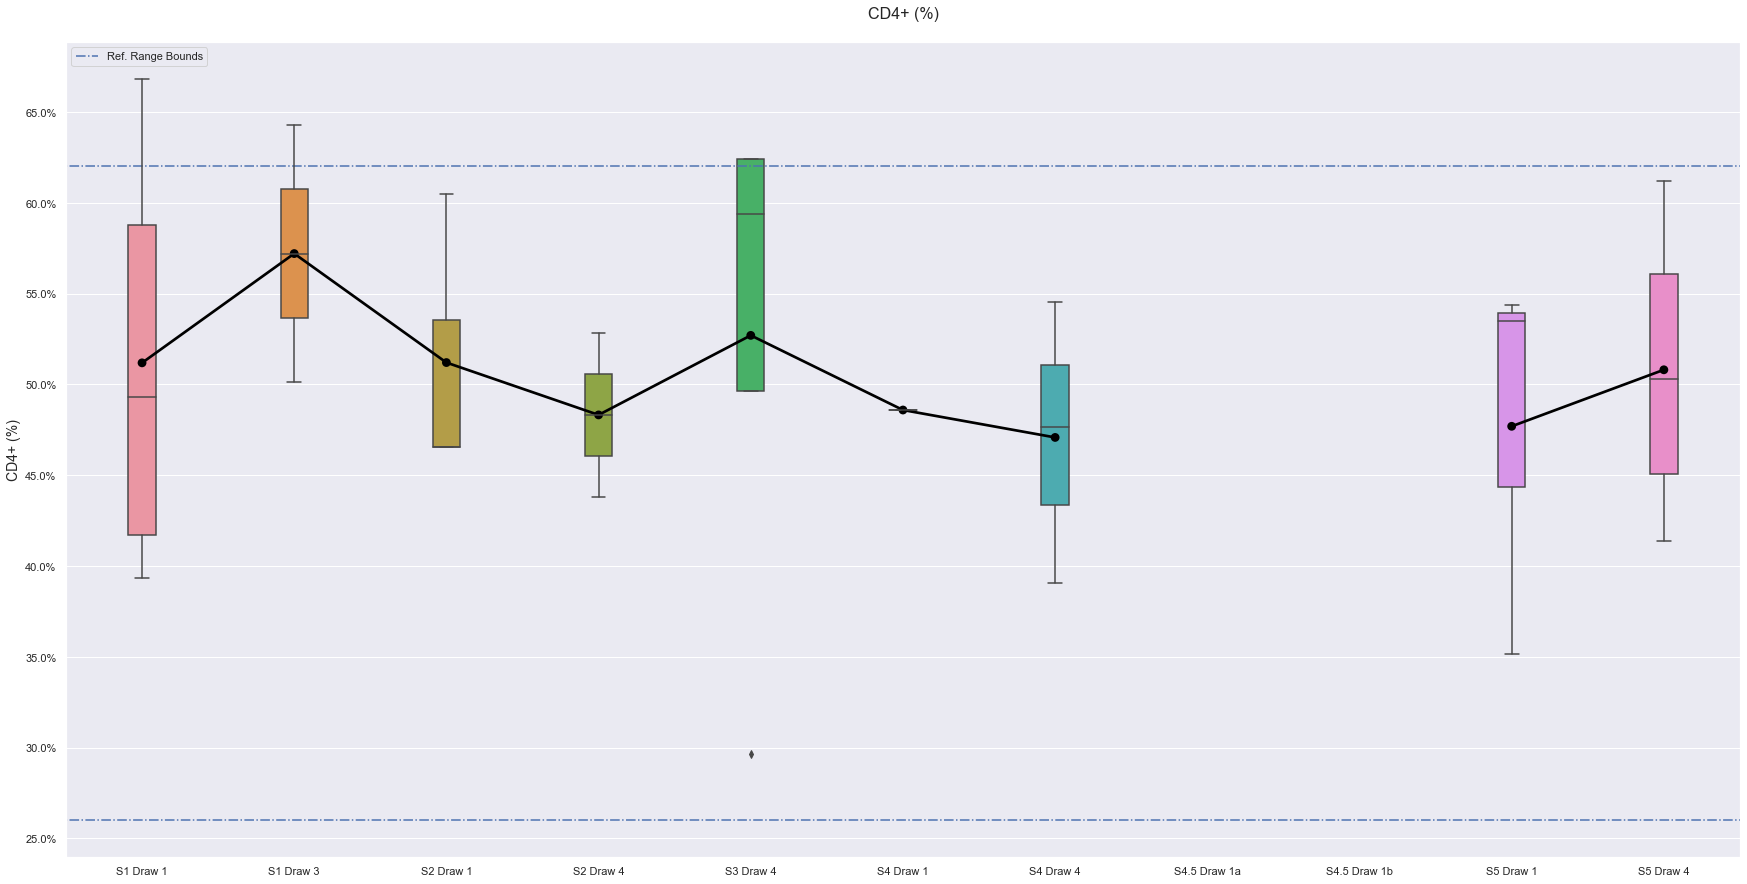

In [134]:
i = desired_feat[1]
plot_data= {
    'S1 Draw 1': wd[wd_list[0]].loc[wd[wd_list[0]]['Subject ID'].isin(wd[wd_list[4]][wd[wd_list[4]]['VO2 Rank (Bin)'] == 'Very Poor']['Subject ID'])][i],
    'S1 Draw 3': wd[wd_list[1]].loc[wd[wd_list[1]]['Subject ID'].isin(wd[wd_list[4]][wd[wd_list[4]]['VO2 Rank (Bin)'] == 'Very Poor']['Subject ID'])][i],
    'S2 Draw 1': wd[wd_list[2]].loc[wd[wd_list[2]]['Subject ID'].isin(wd[wd_list[4]][wd[wd_list[4]]['VO2 Rank (Bin)'] == 'Very Poor']['Subject ID'])][i],
    'S2 Draw 4': wd[wd_list[3]].loc[wd[wd_list[3]]['Subject ID'].isin(wd[wd_list[4]][wd[wd_list[4]]['VO2 Rank (Bin)'] == 'Very Poor']['Subject ID'])][i],
    'S3 Draw 4': wd[wd_list[4]].loc[wd[wd_list[4]]['Subject ID'].isin(wd[wd_list[4]][wd[wd_list[4]]['VO2 Rank (Bin)'] == 'Very Poor']['Subject ID'])][i],
    'S4 Draw 1': wd[wd_list[5]].loc[wd[wd_list[5]]['Subject ID'].isin(wd[wd_list[4]][wd[wd_list[4]]['VO2 Rank (Bin)'] == 'Very Poor']['Subject ID'])][i],
    'S4 Draw 4': wd[wd_list[6]].loc[wd[wd_list[6]]['Subject ID'].isin(wd[wd_list[4]][wd[wd_list[4]]['VO2 Rank (Bin)'] == 'Very Poor']['Subject ID'])][i],
    'S4.5 Draw 1a': wd[wd_list[7]].loc[wd[wd_list[7]]['Subject ID'].isin(wd[wd_list[4]][wd[wd_list[4]]['VO2 Rank (Bin)'] == 'Very Poor']['Subject ID'])][i],
    'S4.5 Draw 1b': wd[wd_list[8]].loc[wd[wd_list[8]]['Subject ID'].isin(wd[wd_list[4]][wd[wd_list[4]]['VO2 Rank (Bin)'] == 'Very Poor']['Subject ID'])][i],
    'S5 Draw 1': wd[wd_list[9]].loc[wd[wd_list[9]]['Subject ID'].isin(wd[wd_list[4]][wd[wd_list[4]]['VO2 Rank (Bin)'] == 'Very Poor']['Subject ID'])][i],
    'S5 Draw 4': wd[wd_list[10]].loc[wd[wd_list[10]]['Subject ID'].isin(wd[wd_list[4]][wd[wd_list[4]]['VO2 Rank (Bin)'] == 'Very Poor']['Subject ID'])][i]
}
sorted_keys, sorted_vals = zip(*sorted(plot_data.items(), key=op.itemgetter(0)))

#Get data in a proper format.
fixed_data = list(plot_data)
fig, ax = plt.subplots(figsize=dims)

#Set up the graph parameters.
b = sns.boxplot(data=sorted_vals, width=.18)

if i != 'lymphocyte/monocyte ratio':
    sns.utils.axlabel(xlabel='', ylabel=i[1:] + ' (%)', fontsize=axes_label_size)
    b.set_title(i[1:] + ' (%)\n', fontsize=title_size)

    #Reference ranges found in the Florida paper.
    ax.hlines(ref.loc[ref_idx[i],['Ref. Max']]/100, xmin = -1, xmax = 12, ls='-.', label = 'Ref. Range Lower Bound')
    ax.hlines(ref.loc[ref_idx[i],['Ref. Min']]/100, xmin = -1, xmax = 12, ls='-.', label = 'Ref. Range Upper Bound')
else:
    sns.utils.axlabel(xlabel='', ylabel='Lymphocyte/Monocyte Ratio', fontsize=axes_label_size)
    b.set_title('Lymphocyte/Monocyte Ratios\n', fontsize=title_size)

ax = sns.pointplot(data=sorted_vals, ci=None, color='black')
#sns.swarmplot(data=sorted_vals, size=6, edgecolor="black", linewidth=.9)

if i != 'lymphocyte/monocyte ratio':
    b.axes.yaxis.set_major_formatter(PercentFormatter(1))

#Category labels added here
plt.xticks(plt.xticks()[0], sorted_keys)
handles, _ = ax.get_legend_handles_labels()
ax.legend(loc='upper left', handles=handles, labels=["Ref. Range Bounds"])
plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\utils.py:178: FutureWarning: This function is deprecated and will be removed in a future version
  warnings.warn(msg, FutureWarning)


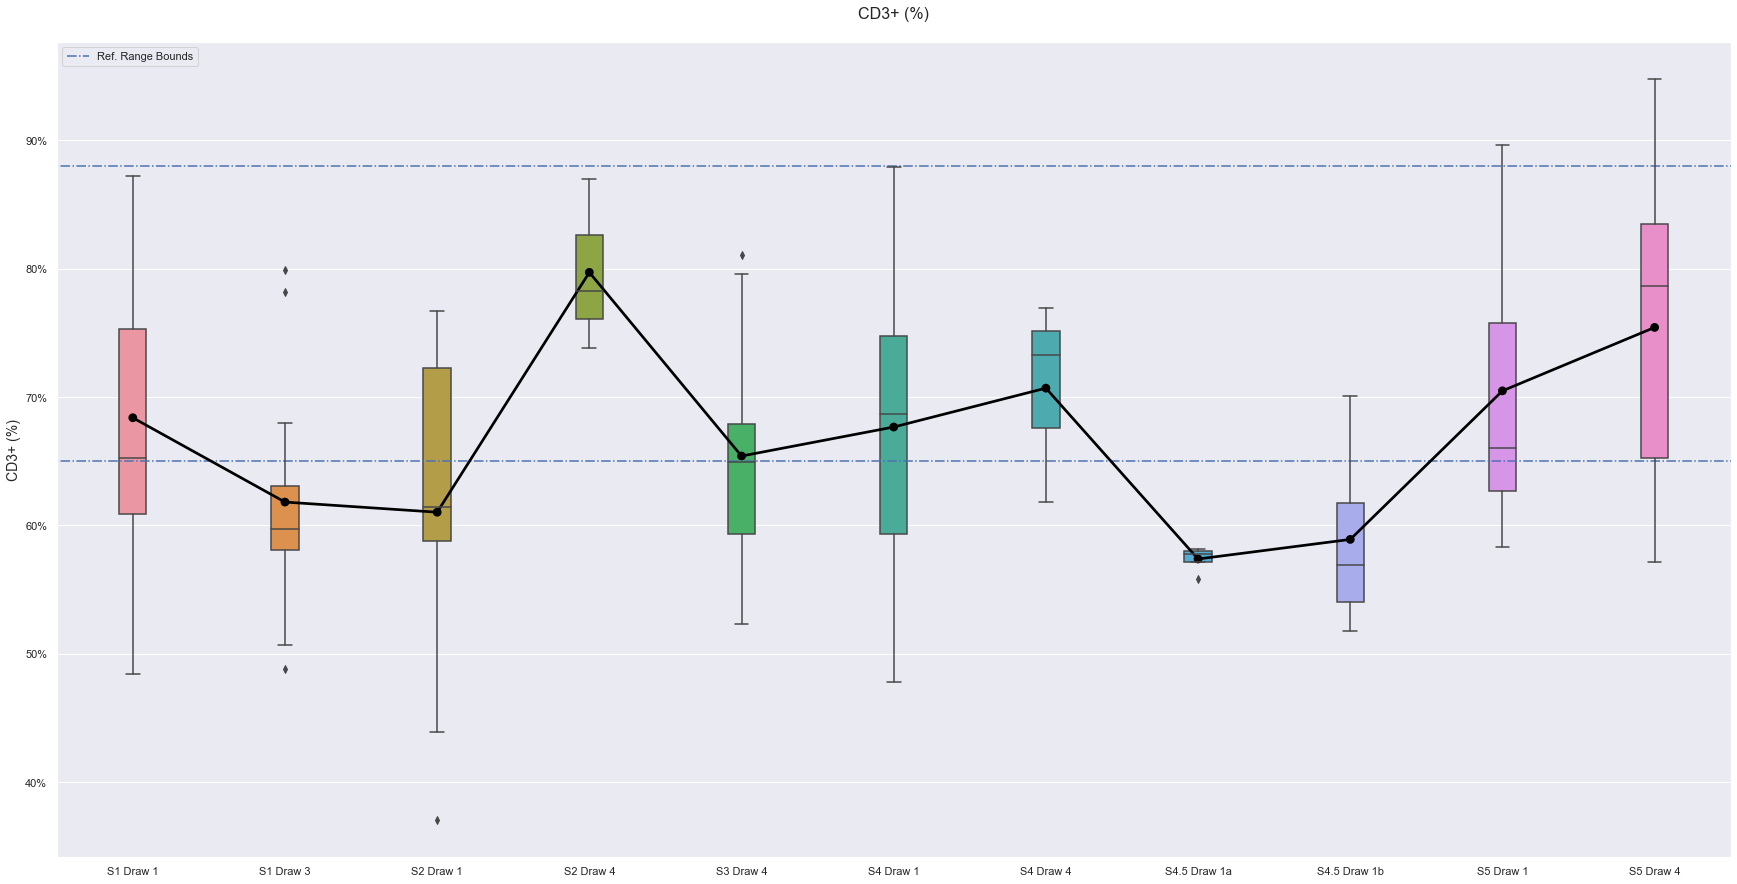

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\utils.py:178: FutureWarning: This function is deprecated and will be removed in a future version
  warnings.warn(msg, FutureWarning)


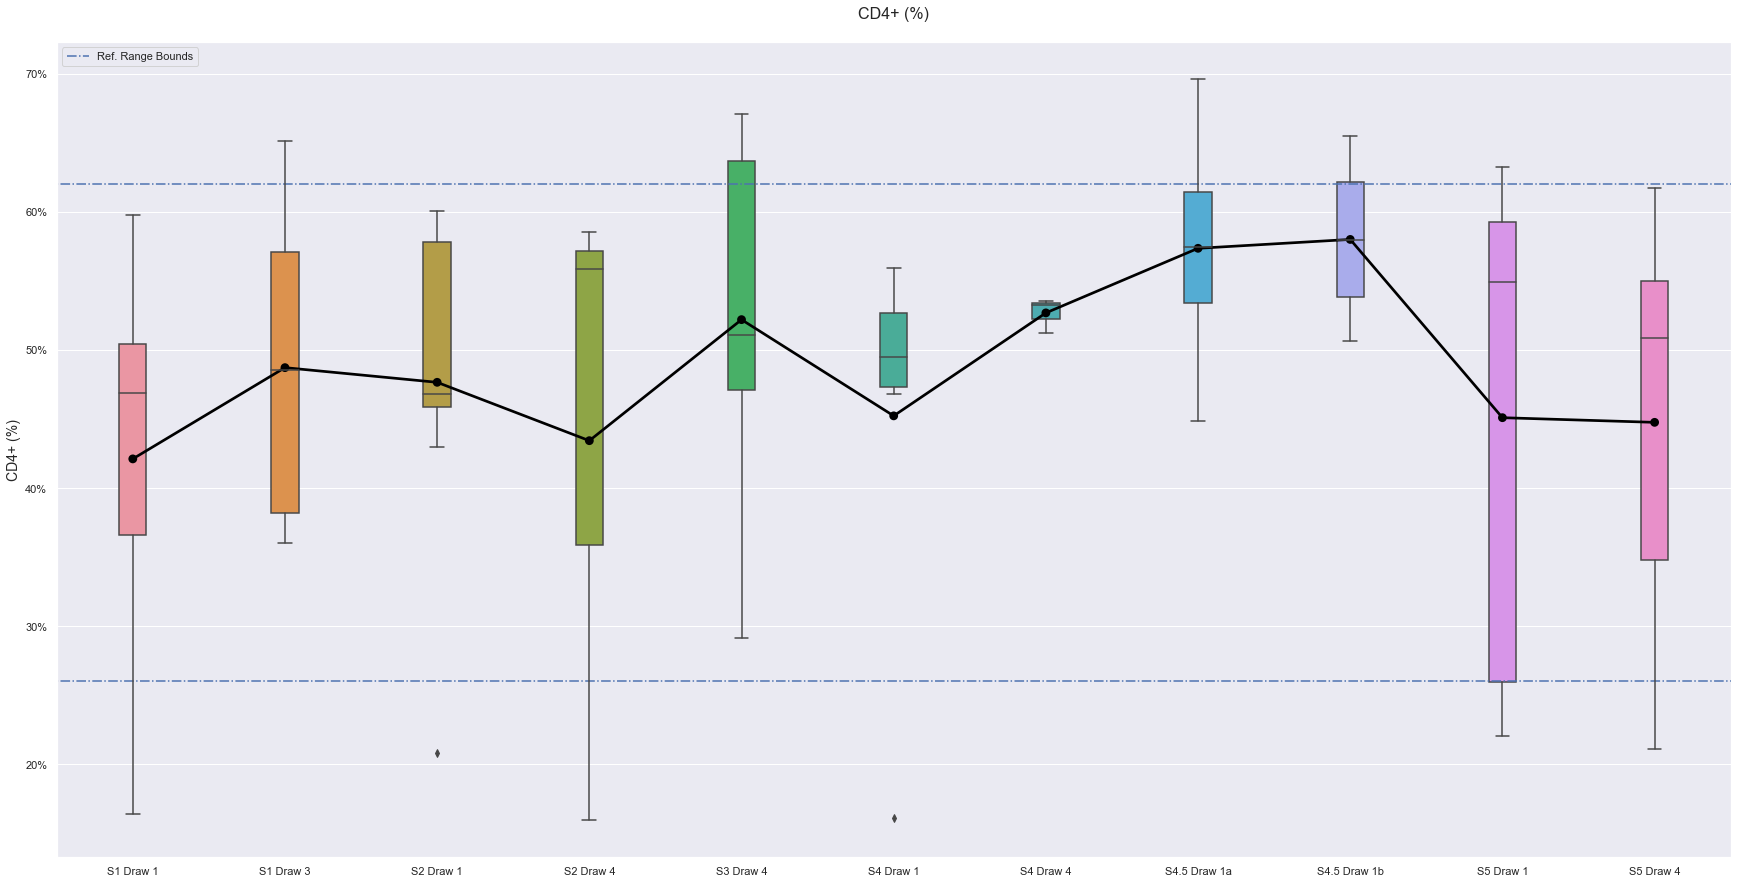

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\utils.py:178: FutureWarning: This function is deprecated and will be removed in a future version
  warnings.warn(msg, FutureWarning)


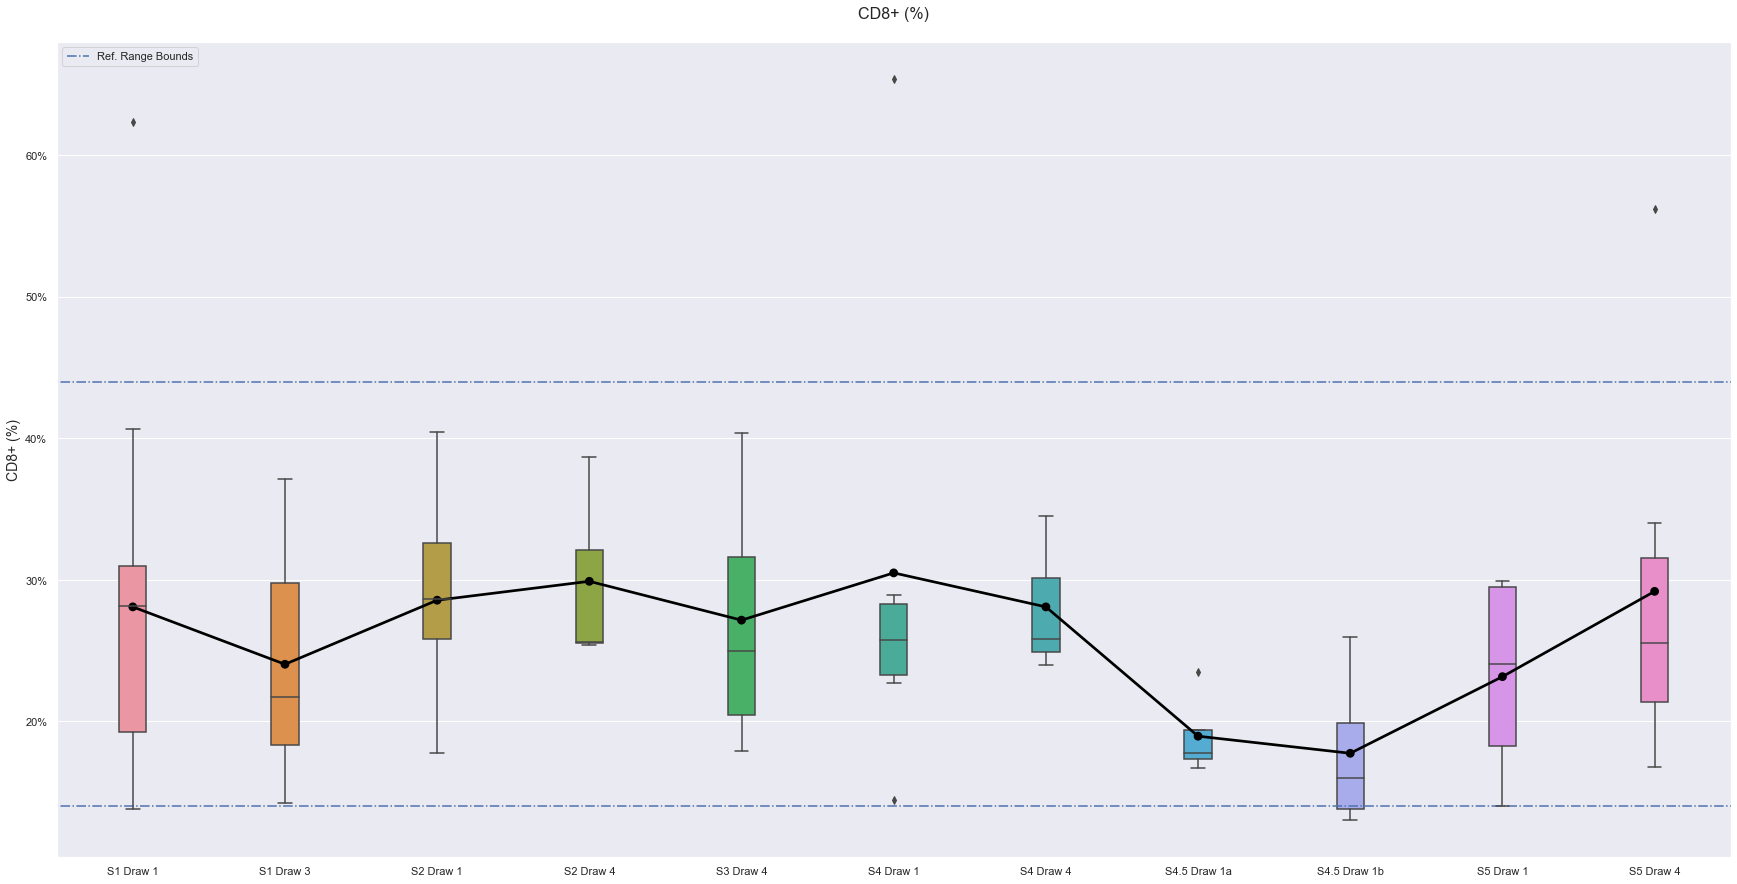

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\utils.py:178: FutureWarning: This function is deprecated and will be removed in a future version
  warnings.warn(msg, FutureWarning)


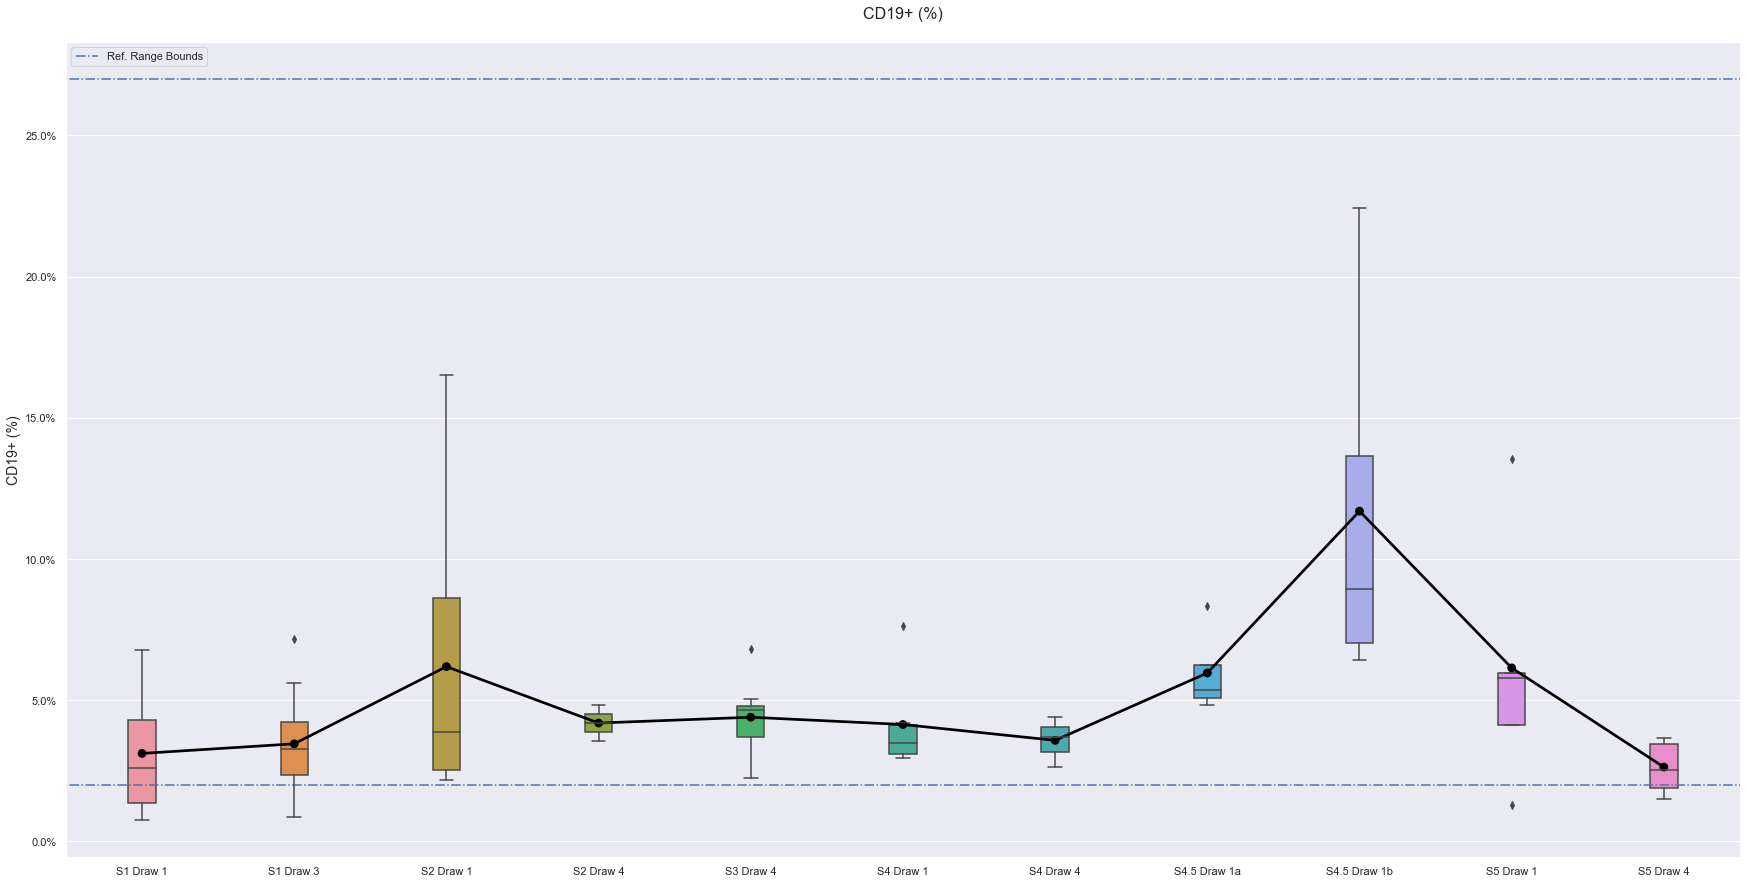

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\utils.py:178: FutureWarning: This function is deprecated and will be removed in a future version
  warnings.warn(msg, FutureWarning)
No handles with labels found to put in legend.


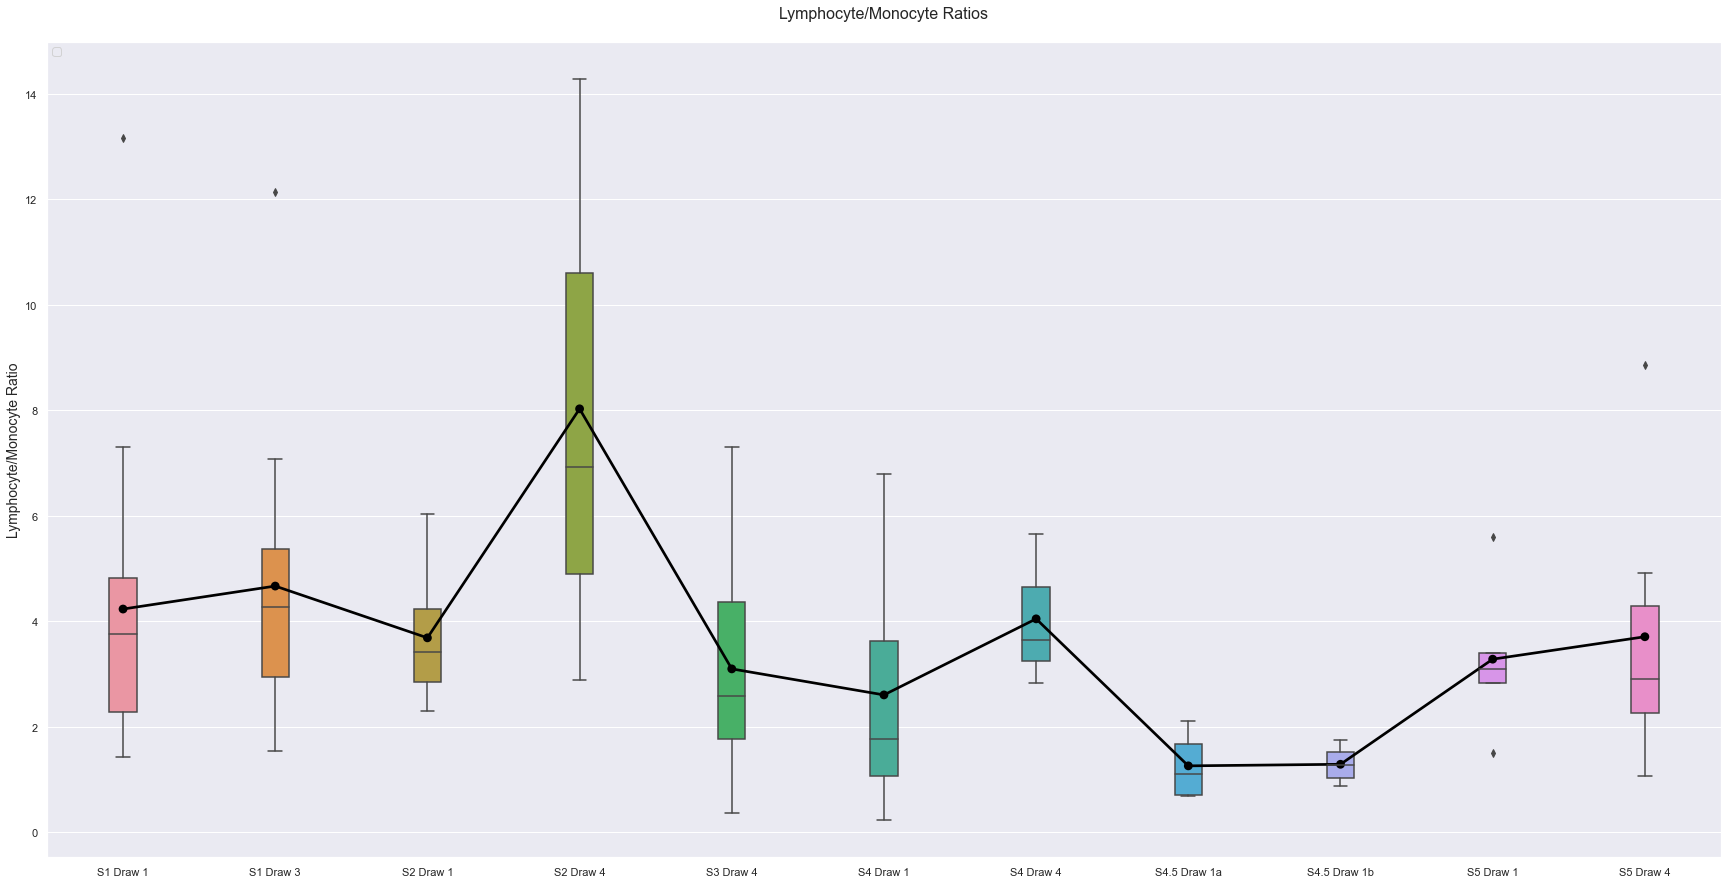

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\utils.py:178: FutureWarning: This function is deprecated and will be removed in a future version
  warnings.warn(msg, FutureWarning)


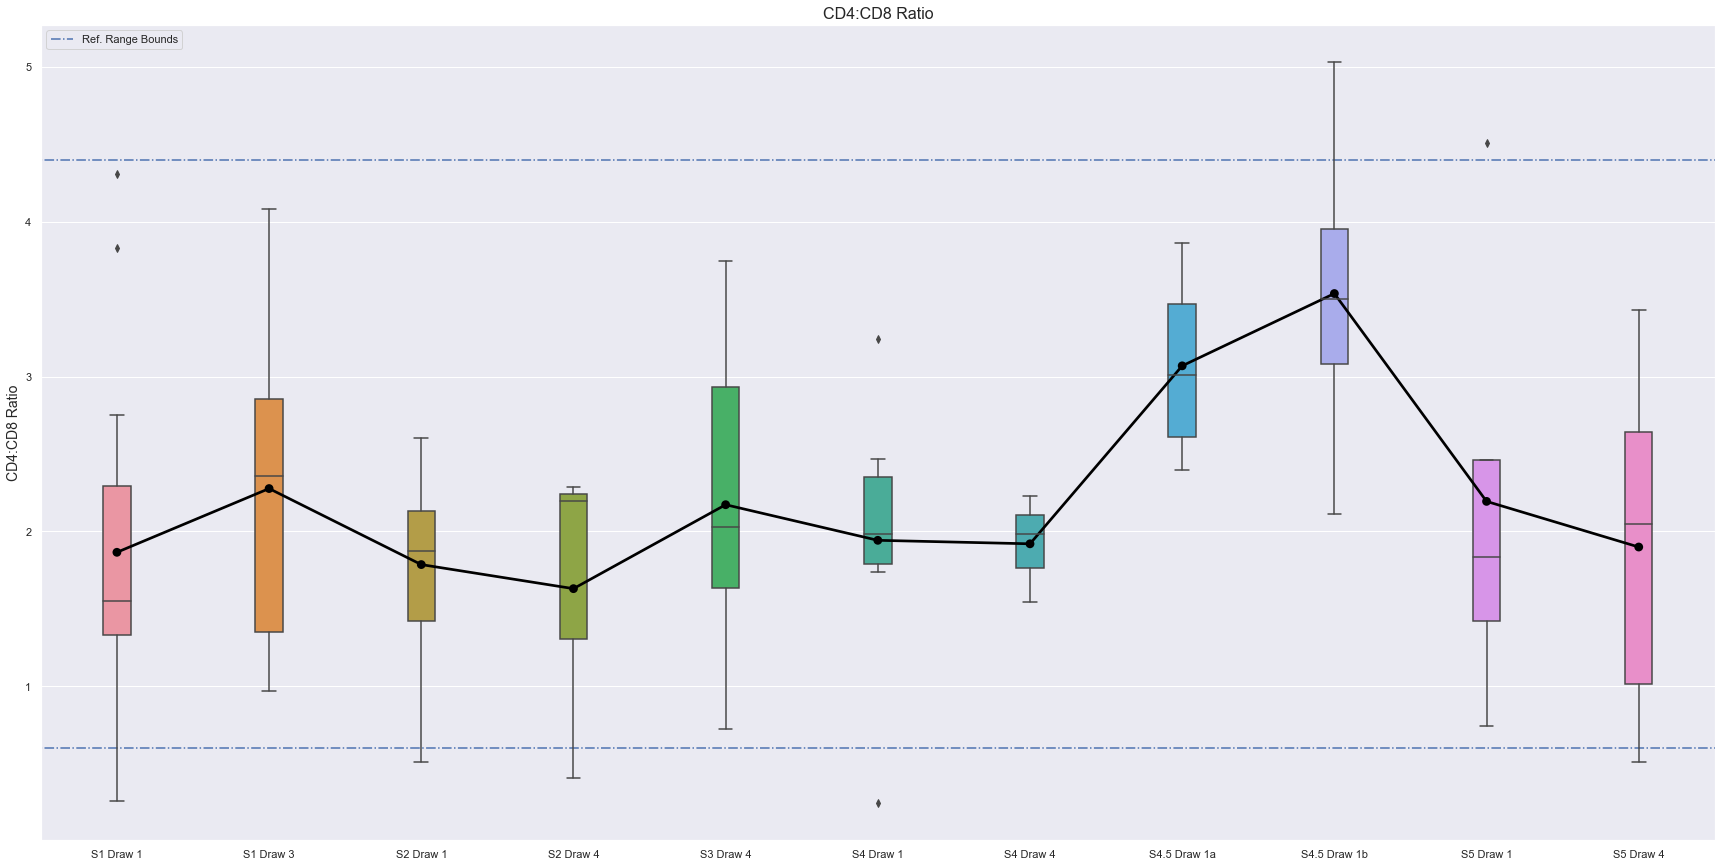

In [135]:
#This time, try only Poor.
for i in desired_feat:
    plot_data= {
        'S1 Draw 1': wd[wd_list[0]][wd[wd_list[0]]['VO2 Rank (Bin)'] == 'Poor'][i],
        'S1 Draw 3': wd[wd_list[1]][wd[wd_list[1]]['VO2 Rank (Bin)'] == 'Poor'][i],
        'S2 Draw 1': wd[wd_list[2]][wd[wd_list[2]]['VO2 Rank (Bin)'] == 'Poor'][i],
        'S2 Draw 4': wd[wd_list[3]][wd[wd_list[3]]['VO2 Rank (Bin)'] == 'Poor'][i],
        'S3 Draw 4': wd[wd_list[4]][wd[wd_list[4]]['VO2 Rank (Bin)'] == 'Poor'][i],
        'S4 Draw 1': wd[wd_list[5]][wd[wd_list[5]]['VO2 Rank (Bin)'] == 'Poor'][i],
        'S4 Draw 4': wd[wd_list[6]][wd[wd_list[6]]['VO2 Rank (Bin)'] == 'Poor'][i],
        'S4.5 Draw 1a': wd[wd_list[7]][wd[wd_list[7]]['VO2 Rank (Bin)'] == 'Poor'][i],
        'S4.5 Draw 1b': wd[wd_list[8]][wd[wd_list[8]]['VO2 Rank (Bin)'] == 'Poor'][i],
        'S5 Draw 1': wd[wd_list[9]][wd[wd_list[9]]['VO2 Rank (Bin)'] == 'Poor'][i],
        'S5 Draw 4': wd[wd_list[10]][wd[wd_list[10]]['VO2 Rank (Bin)'] == 'Poor'][i]
    }
    sorted_keys, sorted_vals = zip(*sorted(plot_data.items(), key=op.itemgetter(0)))

    #Get data in a proper format.
    fixed_data = list(plot_data)
    fig, ax = plt.subplots(figsize=dims)

    #Set up the graph parameters.
    sns.set(context='notebook', style='darkgrid')

    b = sns.boxplot(data=sorted_vals, width=.18)
    
    if i != 'lymphocyte/monocyte ratio':
        sns.utils.axlabel(xlabel='', ylabel=i[1:] + ' (%)', fontsize=axes_label_size)
        b.set_title(i[1:] + ' (%)\n', fontsize=title_size)
        
        #Reference ranges found in the Florida paper.
        ax.hlines(ref.loc[ref_idx[i],['Ref. Min']]/100, xmin = -1, xmax = 12, ls='-.', label = 'Ref. Range Lower Bound')
        ax.hlines(ref.loc[ref_idx[i],['Ref. Max']]/100, xmin = -1, xmax = 12, ls='-.', label = 'Ref. Range Upper Bound')
    else:
        sns.utils.axlabel(xlabel='', ylabel='Lymphocyte/Monocyte Ratio', fontsize=axes_label_size)
        b.set_title('Lymphocyte/Monocyte Ratios\n', fontsize=title_size)
    
    ax = sns.pointplot(data=sorted_vals, ci=None, color='black')
    #sns.swarmplot(data=sorted_vals, size=6, edgecolor="black", linewidth=.9)
    
    if i != 'lymphocyte/monocyte ratio':
        b.axes.yaxis.set_major_formatter(PercentFormatter(1))
        
    #Category labels added here
    plt.xticks(plt.xticks()[0], sorted_keys)
    handles, _ = ax.get_legend_handles_labels()
    ax.legend(loc='upper left', handles=handles, labels=["Ref. Range Bounds"])
    plt.show()
    
#A separate run needed for CD4:CD8 Ratio.
plot_data= {
    'S1 Draw 1': wd[wd_list[0]][wd[wd_list[0]]['VO2 Rank (Bin)'] == 'Poor'][desired_feat[1]]/wd[wd_list[0]][wd[wd_list[0]]['VO2 Rank (Bin)'] == 'Poor'][desired_feat[2]],
    'S1 Draw 3': wd[wd_list[1]][wd[wd_list[1]]['VO2 Rank (Bin)'] == 'Poor'][desired_feat[1]]/wd[wd_list[1]][wd[wd_list[1]]['VO2 Rank (Bin)'] == 'Poor'][desired_feat[2]],
    'S2 Draw 1': wd[wd_list[2]][wd[wd_list[2]]['VO2 Rank (Bin)'] == 'Poor'][desired_feat[1]]/wd[wd_list[2]][wd[wd_list[2]]['VO2 Rank (Bin)'] == 'Poor'][desired_feat[2]],
    'S2 Draw 4': wd[wd_list[3]][wd[wd_list[3]]['VO2 Rank (Bin)'] == 'Poor'][desired_feat[1]]/wd[wd_list[3]][wd[wd_list[3]]['VO2 Rank (Bin)'] == 'Poor'][desired_feat[2]],
    'S3 Draw 4': wd[wd_list[4]][wd[wd_list[4]]['VO2 Rank (Bin)'] == 'Poor'][desired_feat[1]]/wd[wd_list[4]][wd[wd_list[4]]['VO2 Rank (Bin)'] == 'Poor'][desired_feat[2]],
    'S4 Draw 1': wd[wd_list[5]][wd[wd_list[5]]['VO2 Rank (Bin)'] == 'Poor'][desired_feat[1]]/wd[wd_list[5]][wd[wd_list[5]]['VO2 Rank (Bin)'] == 'Poor'][desired_feat[2]],
    'S4 Draw 4': wd[wd_list[6]][wd[wd_list[6]]['VO2 Rank (Bin)'] == 'Poor'][desired_feat[1]]/wd[wd_list[6]][wd[wd_list[6]]['VO2 Rank (Bin)'] == 'Poor'][desired_feat[2]],
    'S4.5 Draw 1a': wd[wd_list[7]][wd[wd_list[7]]['VO2 Rank (Bin)'] == 'Poor'][desired_feat[1]]/wd[wd_list[7]][wd[wd_list[7]]['VO2 Rank (Bin)'] == 'Poor'][desired_feat[2]],
    'S4.5 Draw 1b': wd[wd_list[8]][wd[wd_list[8]]['VO2 Rank (Bin)'] == 'Poor'][desired_feat[1]]/wd[wd_list[8]][wd[wd_list[8]]['VO2 Rank (Bin)'] == 'Poor'][desired_feat[2]],
    'S5 Draw 1': wd[wd_list[9]][wd[wd_list[9]]['VO2 Rank (Bin)'] == 'Poor'][desired_feat[1]]/wd[wd_list[9]][wd[wd_list[9]]['VO2 Rank (Bin)'] == 'Poor'][desired_feat[2]],
    'S5 Draw 4': wd[wd_list[10]][wd[wd_list[10]]['VO2 Rank (Bin)'] == 'Poor'][desired_feat[1]]/wd[wd_list[10]][wd[wd_list[10]]['VO2 Rank (Bin)'] == 'Poor'][desired_feat[2]]
}
sorted_keys, sorted_vals = zip(*sorted(plot_data.items(), key=op.itemgetter(0)))

#Get data in a proper format.
fixed_data = list(plot_data)
fig, ax = plt.subplots(figsize=dims)

#Set up the graph parameters.
sns.set(context='notebook', style='darkgrid')

b = sns.boxplot(data=sorted_vals, width=.18)

sns.utils.axlabel(xlabel='', ylabel='CD4:CD8 Ratio', fontsize=axes_label_size)
b.set_title('CD4:CD8 Ratio', fontsize=title_size)

#Reference ranges found in the Florida paper.
ax.hlines(ref.loc[cd4_cd8_ratio_idx,['Ref. Min']], xmin = -1, xmax = 12, ls='-.', label = 'Ref. Range Lower Bound')
ax.hlines(ref.loc[cd4_cd8_ratio_idx,['Ref. Max']], xmin = -1, xmax = 12, ls='-.', label = 'Ref. Range Upper Bound')

ax = sns.pointplot(data=sorted_vals, ci=None, color='black')
#sns.swarmplot(data=sorted_vals, size=6, edgecolor="black", linewidth=.9)

if i != 'lymphocyte/monocyte ratio':
    b.axes.yaxis.set_major_formatter(PercentFormatter(1))

#Category labels added here
plt.xticks(plt.xticks()[0], sorted_keys)
handles, _ = ax.get_legend_handles_labels()
ax.legend(loc='upper left', handles=handles, labels=["Ref. Range Bounds"])
plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\utils.py:178: FutureWarning: This function is deprecated and will be removed in a future version
  warnings.warn(msg, FutureWarning)


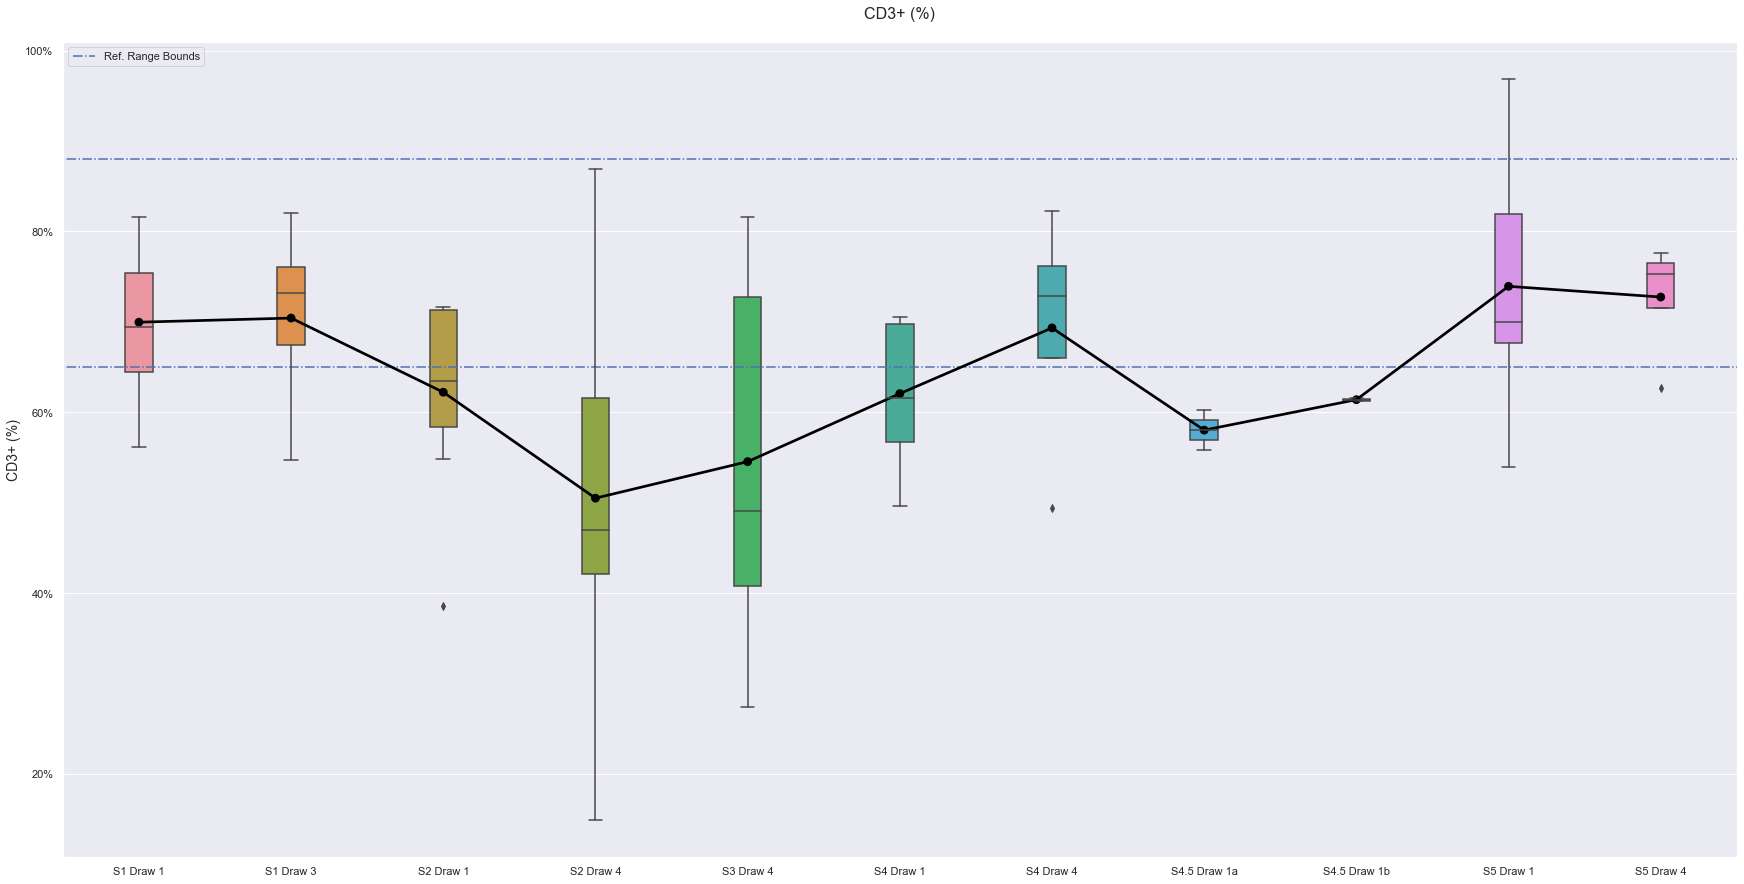

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\utils.py:178: FutureWarning: This function is deprecated and will be removed in a future version
  warnings.warn(msg, FutureWarning)


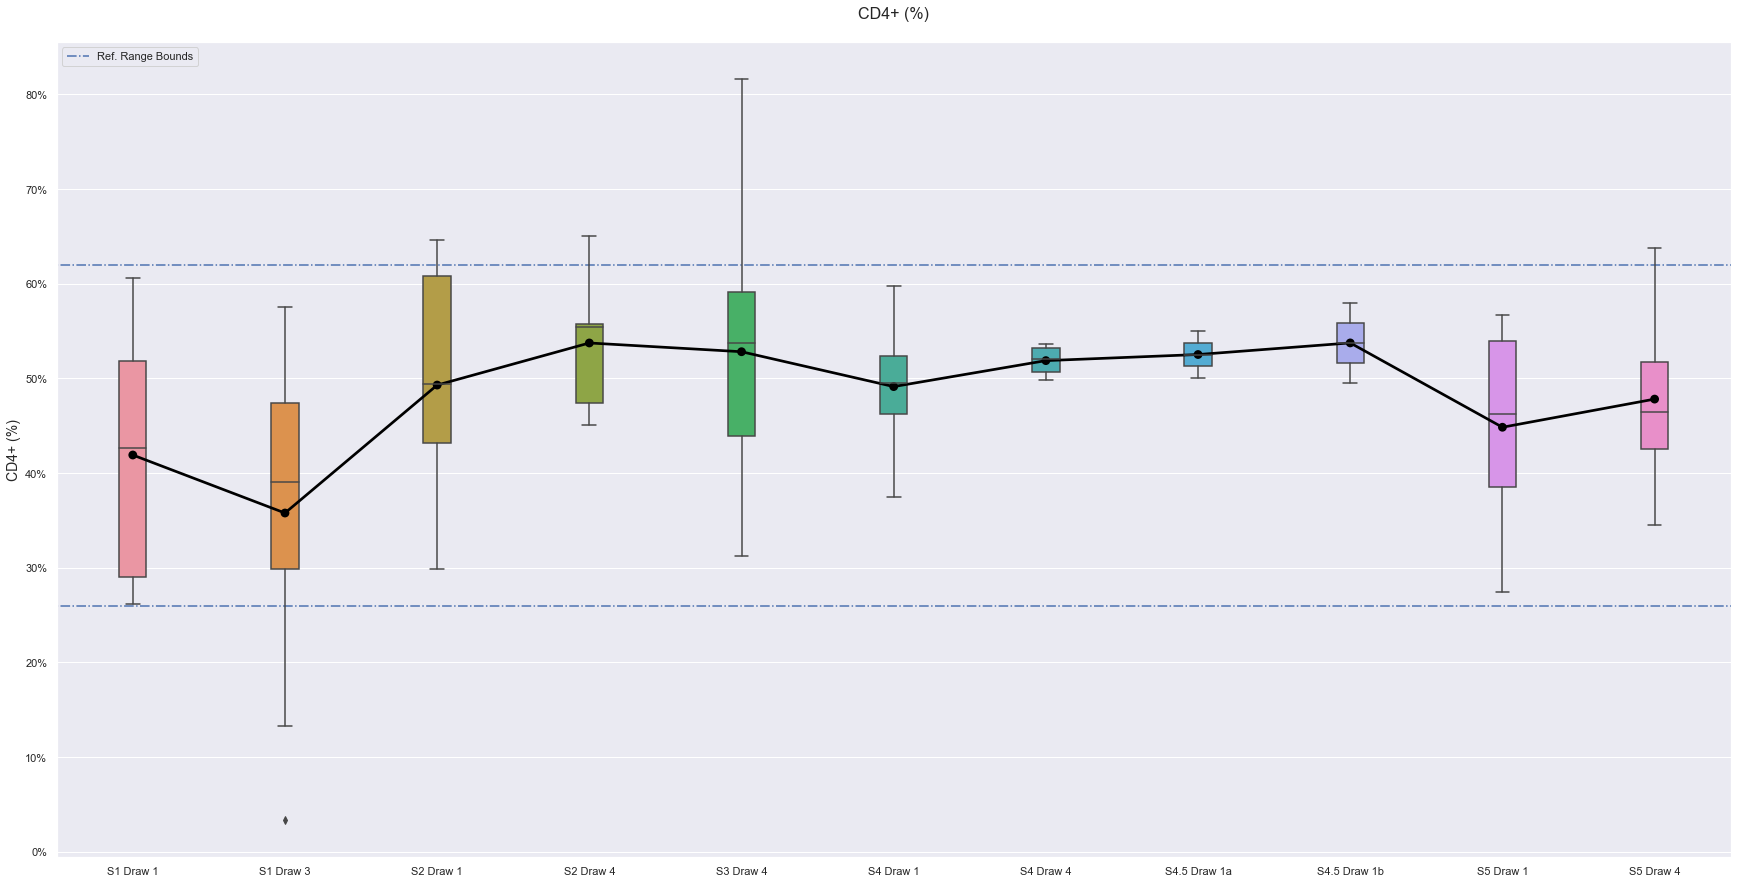

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\utils.py:178: FutureWarning: This function is deprecated and will be removed in a future version
  warnings.warn(msg, FutureWarning)


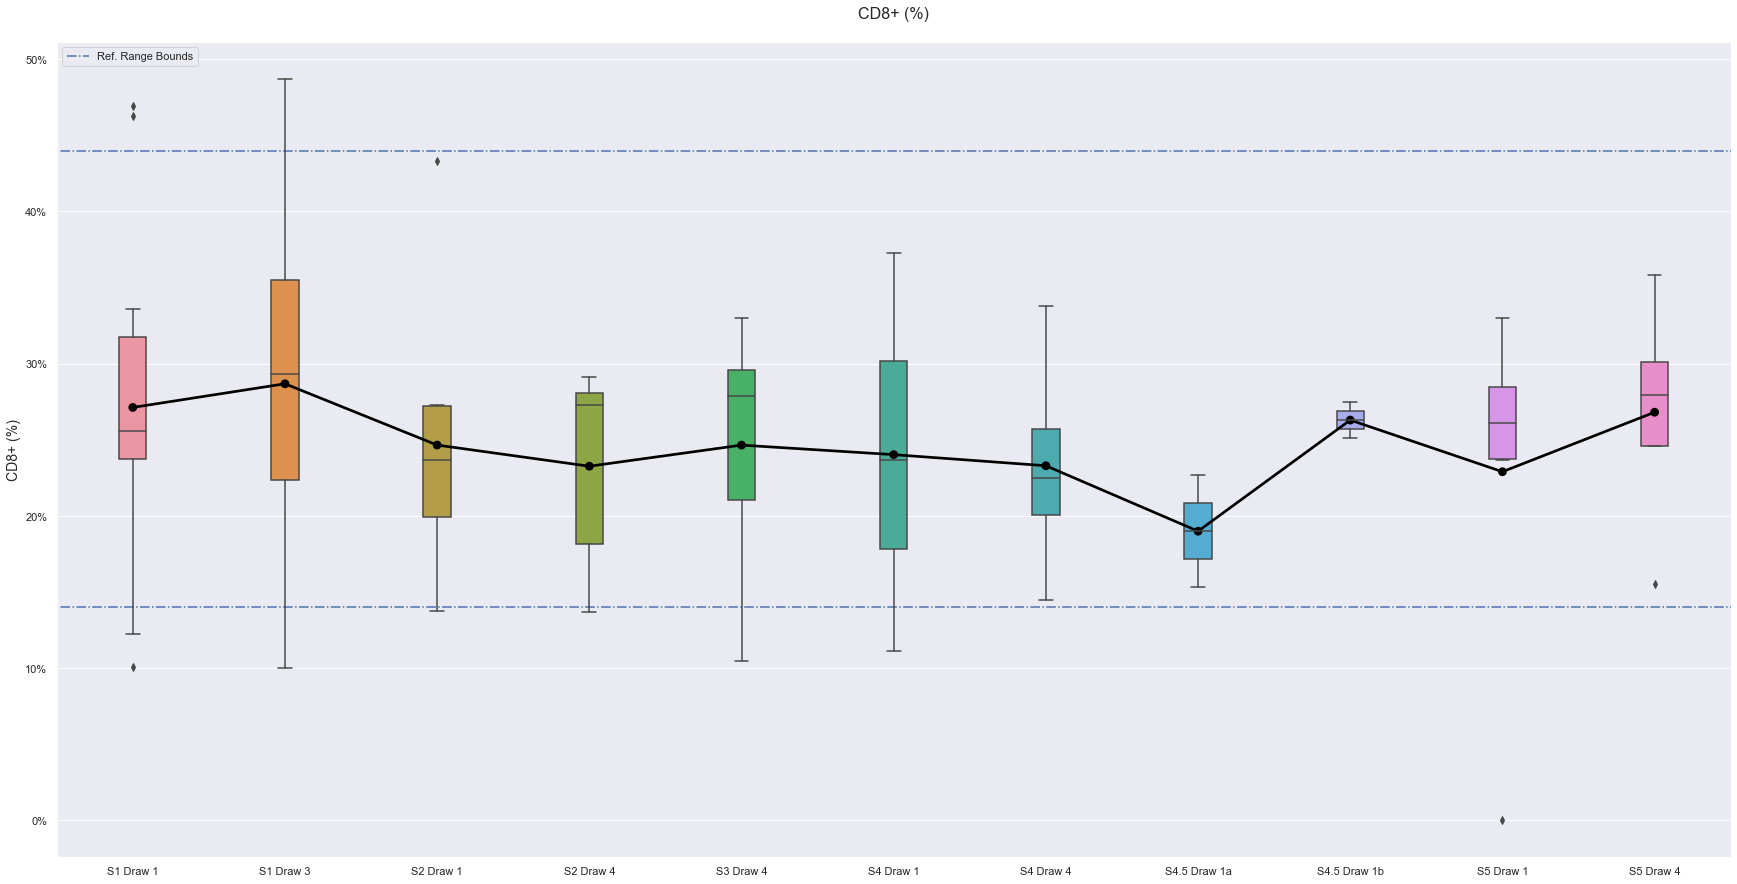

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\utils.py:178: FutureWarning: This function is deprecated and will be removed in a future version
  warnings.warn(msg, FutureWarning)


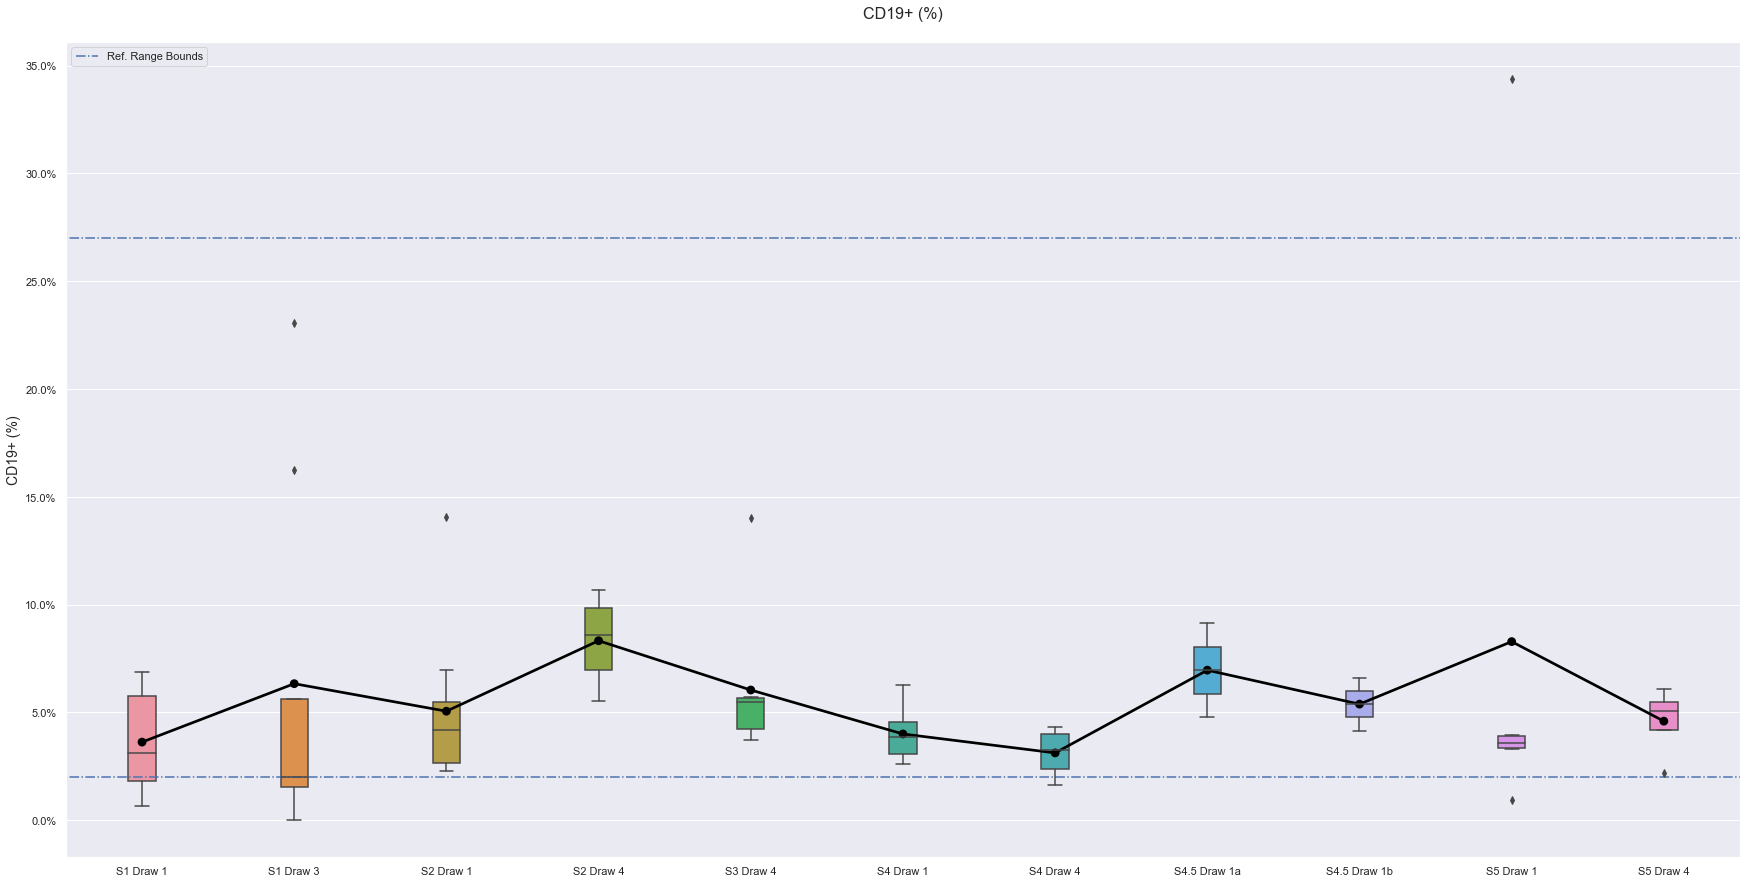

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\utils.py:178: FutureWarning: This function is deprecated and will be removed in a future version
  warnings.warn(msg, FutureWarning)
No handles with labels found to put in legend.


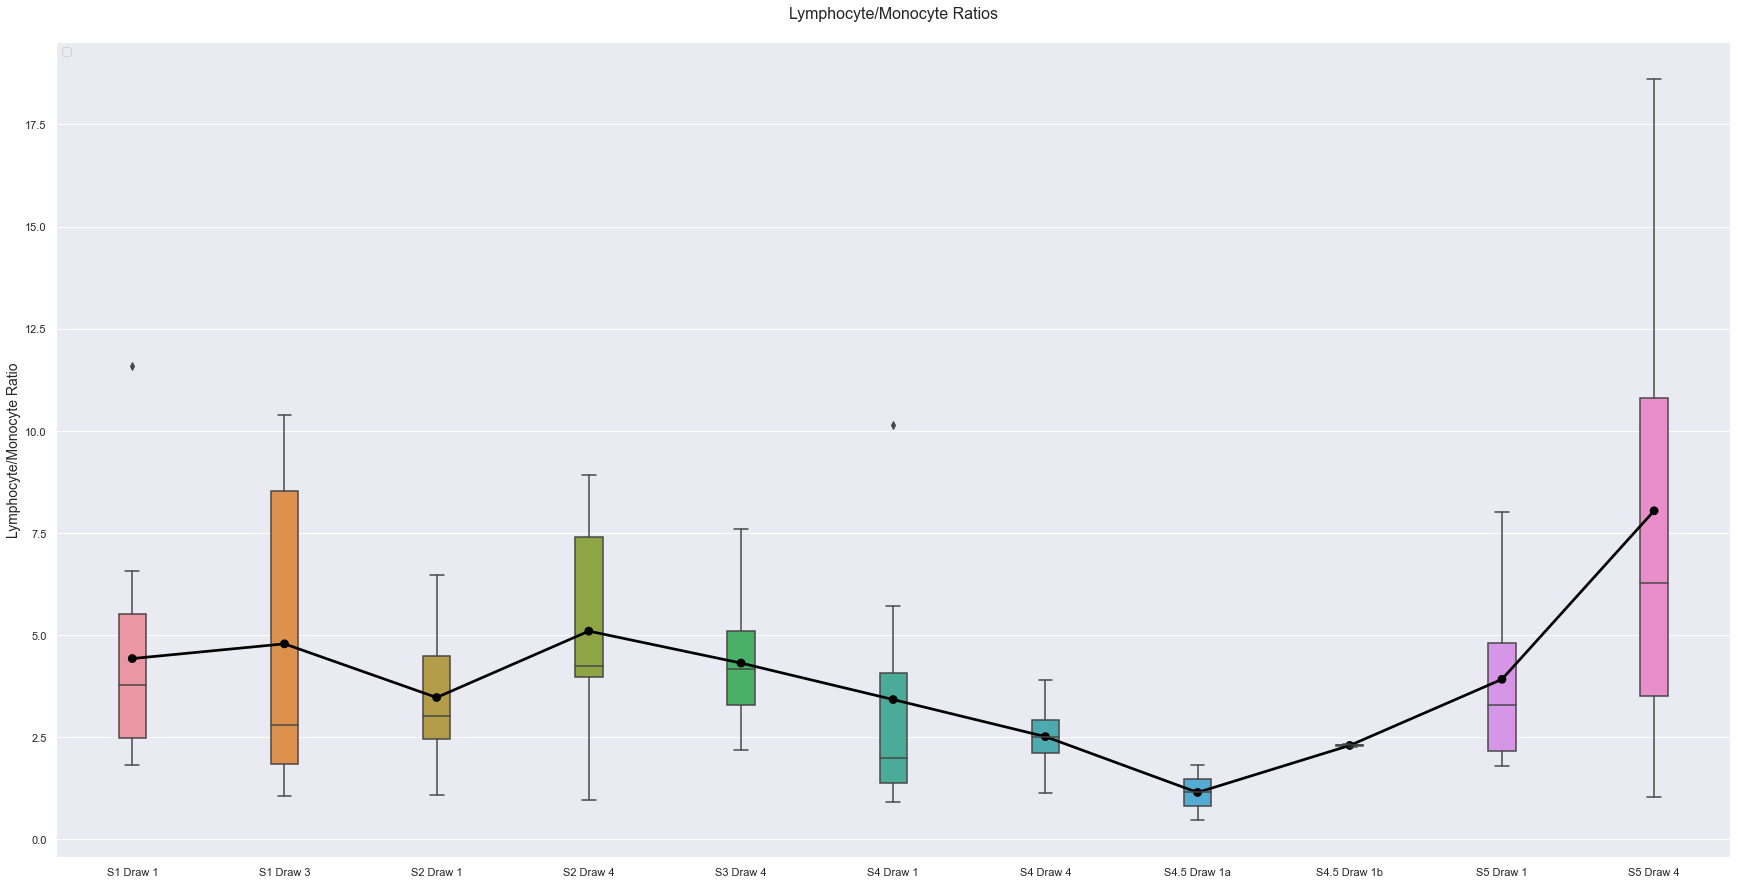

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\utils.py:178: FutureWarning: This function is deprecated and will be removed in a future version
  warnings.warn(msg, FutureWarning)


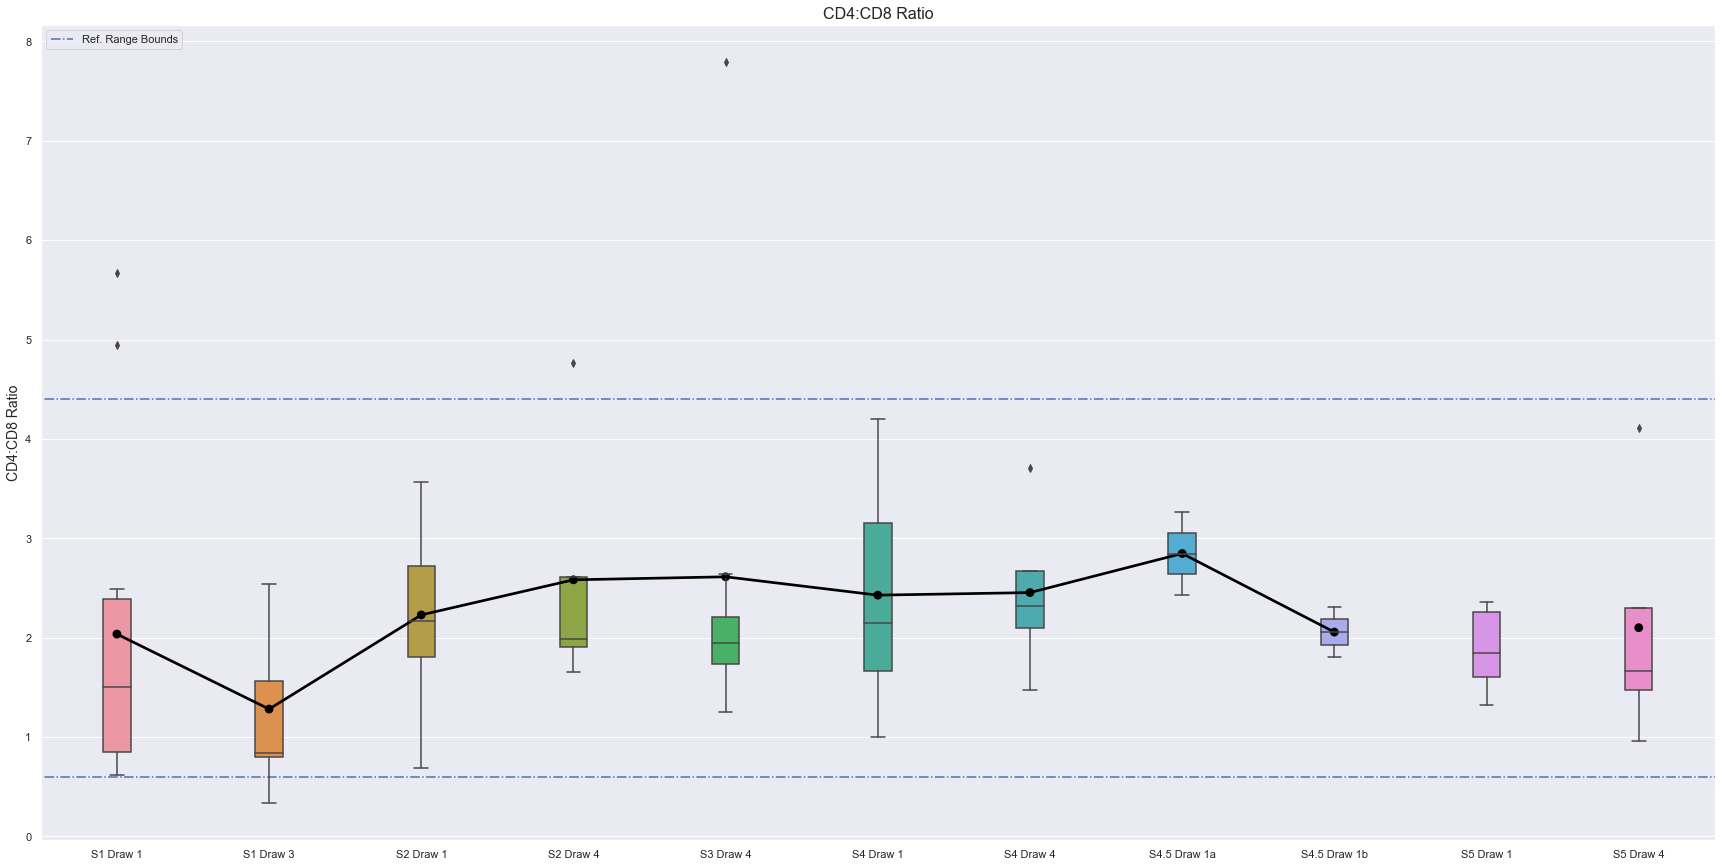

In [136]:
#This time, try only Fair.
for i in desired_feat:
    plot_data= {
        'S1 Draw 1': wd[wd_list[0]][wd[wd_list[0]]['VO2 Rank (Bin)'] == 'Fair'][i],
        'S1 Draw 3': wd[wd_list[1]][wd[wd_list[1]]['VO2 Rank (Bin)'] == 'Fair'][i],
        'S2 Draw 1': wd[wd_list[2]][wd[wd_list[2]]['VO2 Rank (Bin)'] == 'Fair'][i],
        'S2 Draw 4': wd[wd_list[3]][wd[wd_list[3]]['VO2 Rank (Bin)'] == 'Fair'][i],
        'S3 Draw 4': wd[wd_list[4]][wd[wd_list[4]]['VO2 Rank (Bin)'] == 'Fair'][i],
        'S4 Draw 1': wd[wd_list[5]][wd[wd_list[5]]['VO2 Rank (Bin)'] == 'Fair'][i],
        'S4 Draw 4': wd[wd_list[6]][wd[wd_list[6]]['VO2 Rank (Bin)'] == 'Fair'][i],
        'S4.5 Draw 1a': wd[wd_list[7]][wd[wd_list[7]]['VO2 Rank (Bin)'] == 'Fair'][i],
        'S4.5 Draw 1b': wd[wd_list[8]][wd[wd_list[8]]['VO2 Rank (Bin)'] == 'Fair'][i],
        'S5 Draw 1': wd[wd_list[9]][wd[wd_list[9]]['VO2 Rank (Bin)'] == 'Fair'][i],
        'S5 Draw 4': wd[wd_list[10]][wd[wd_list[10]]['VO2 Rank (Bin)'] == 'Fair'][i]
    }
    sorted_keys, sorted_vals = zip(*sorted(plot_data.items(), key=op.itemgetter(0)))

    #Get data in a proper format.
    fixed_data = list(plot_data)
    fig, ax = plt.subplots(figsize=dims)

    #Set up the graph parameters.
    sns.set(context='notebook', style='darkgrid')

    b = sns.boxplot(data=sorted_vals, width=.18)
    
    if i != 'lymphocyte/monocyte ratio':
        sns.utils.axlabel(xlabel='', ylabel=i[1:] + ' (%)', fontsize=axes_label_size)
        b.set_title(i[1:] + ' (%)\n', fontsize=title_size)
        
        #Reference ranges found in the Florida paper.
        ax.hlines(ref.loc[ref_idx[i],['Ref. Min']]/100, xmin = -1, xmax = 12, ls='-.', label = 'Ref. Range Lower Bound')
        ax.hlines(ref.loc[ref_idx[i],['Ref. Max']]/100, xmin = -1, xmax = 12, ls='-.', label = 'Ref. Range Upper Bound')
    else:
        sns.utils.axlabel(xlabel='', ylabel='Lymphocyte/Monocyte Ratio', fontsize=axes_label_size)
        b.set_title('Lymphocyte/Monocyte Ratios\n', fontsize=title_size)
    
    ax = sns.pointplot(data=sorted_vals, ci=None, color='black')
    #sns.swarmplot(data=sorted_vals, size=6, edgecolor="black", linewidth=.9)
    
    if i != 'lymphocyte/monocyte ratio':
        b.axes.yaxis.set_major_formatter(PercentFormatter(1))
        
    #Category labels added here
    plt.xticks(plt.xticks()[0], sorted_keys)
    handles, _ = ax.get_legend_handles_labels()
    ax.legend(loc='upper left', handles=handles, labels=["Ref. Range Bounds"])
    plt.show()
    
#A separate run needed for CD4:CD8 Ratio.
plot_data= {
    'S1 Draw 1': wd[wd_list[0]][wd[wd_list[0]]['VO2 Rank (Bin)'] == 'Fair'][desired_feat[1]]/wd[wd_list[0]][wd[wd_list[0]]['VO2 Rank (Bin)'] == 'Fair'][desired_feat[2]],
    'S1 Draw 3': wd[wd_list[1]][wd[wd_list[1]]['VO2 Rank (Bin)'] == 'Fair'][desired_feat[1]]/wd[wd_list[1]][wd[wd_list[1]]['VO2 Rank (Bin)'] == 'Fair'][desired_feat[2]],
    'S2 Draw 1': wd[wd_list[2]][wd[wd_list[2]]['VO2 Rank (Bin)'] == 'Fair'][desired_feat[1]]/wd[wd_list[2]][wd[wd_list[2]]['VO2 Rank (Bin)'] == 'Fair'][desired_feat[2]],
    'S2 Draw 4': wd[wd_list[3]][wd[wd_list[3]]['VO2 Rank (Bin)'] == 'Fair'][desired_feat[1]]/wd[wd_list[3]][wd[wd_list[3]]['VO2 Rank (Bin)'] == 'Fair'][desired_feat[2]],
    'S3 Draw 4': wd[wd_list[4]][wd[wd_list[4]]['VO2 Rank (Bin)'] == 'Fair'][desired_feat[1]]/wd[wd_list[4]][wd[wd_list[4]]['VO2 Rank (Bin)'] == 'Fair'][desired_feat[2]],
    'S4 Draw 1': wd[wd_list[5]][wd[wd_list[5]]['VO2 Rank (Bin)'] == 'Fair'][desired_feat[1]]/wd[wd_list[5]][wd[wd_list[5]]['VO2 Rank (Bin)'] == 'Fair'][desired_feat[2]],
    'S4 Draw 4': wd[wd_list[6]][wd[wd_list[6]]['VO2 Rank (Bin)'] == 'Fair'][desired_feat[1]]/wd[wd_list[6]][wd[wd_list[6]]['VO2 Rank (Bin)'] == 'Fair'][desired_feat[2]],
    'S4.5 Draw 1a': wd[wd_list[7]][wd[wd_list[7]]['VO2 Rank (Bin)'] == 'Fair'][desired_feat[1]]/wd[wd_list[7]][wd[wd_list[7]]['VO2 Rank (Bin)'] == 'Fair'][desired_feat[2]],
    'S4.5 Draw 1b': wd[wd_list[8]][wd[wd_list[8]]['VO2 Rank (Bin)'] == 'Fair'][desired_feat[1]]/wd[wd_list[8]][wd[wd_list[8]]['VO2 Rank (Bin)'] == 'Fair'][desired_feat[2]],
    'S5 Draw 1': wd[wd_list[9]][wd[wd_list[9]]['VO2 Rank (Bin)'] == 'Fair'][desired_feat[1]]/wd[wd_list[9]][wd[wd_list[9]]['VO2 Rank (Bin)'] == 'Fair'][desired_feat[2]],
    'S5 Draw 4': wd[wd_list[10]][wd[wd_list[10]]['VO2 Rank (Bin)'] == 'Fair'][desired_feat[1]]/wd[wd_list[10]][wd[wd_list[10]]['VO2 Rank (Bin)'] == 'Fair'][desired_feat[2]]
}
sorted_keys, sorted_vals = zip(*sorted(plot_data.items(), key=op.itemgetter(0)))

#Get data in a proper format.
fixed_data = list(plot_data)
fig, ax = plt.subplots(figsize=dims)

#Set up the graph parameters.
sns.set(context='notebook', style='darkgrid')

b = sns.boxplot(data=sorted_vals, width=.18)

sns.utils.axlabel(xlabel='', ylabel='CD4:CD8 Ratio', fontsize=axes_label_size)
b.set_title('CD4:CD8 Ratio', fontsize=title_size)

#Reference ranges found in the Florida paper.
ax.hlines(ref.loc[cd4_cd8_ratio_idx,['Ref. Min']], xmin = -1, xmax = 12, ls='-.', label = 'Ref. Range Lower Bound')
ax.hlines(ref.loc[cd4_cd8_ratio_idx,['Ref. Max']], xmin = -1, xmax = 12, ls='-.', label = 'Ref. Range Upper Bound')

ax = sns.pointplot(data=sorted_vals, ci=None, color='black')
#sns.swarmplot(data=sorted_vals, size=6, edgecolor="black", linewidth=.9)

if i != 'lymphocyte/monocyte ratio':
    b.axes.yaxis.set_major_formatter(PercentFormatter(1))

#Category labels added here
plt.xticks(plt.xticks()[0], sorted_keys)
handles, _ = ax.get_legend_handles_labels()
ax.legend(loc='upper left', handles=handles, labels=["Ref. Range Bounds"])
plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\utils.py:178: FutureWarning: This function is deprecated and will be removed in a future version
  warnings.warn(msg, FutureWarning)


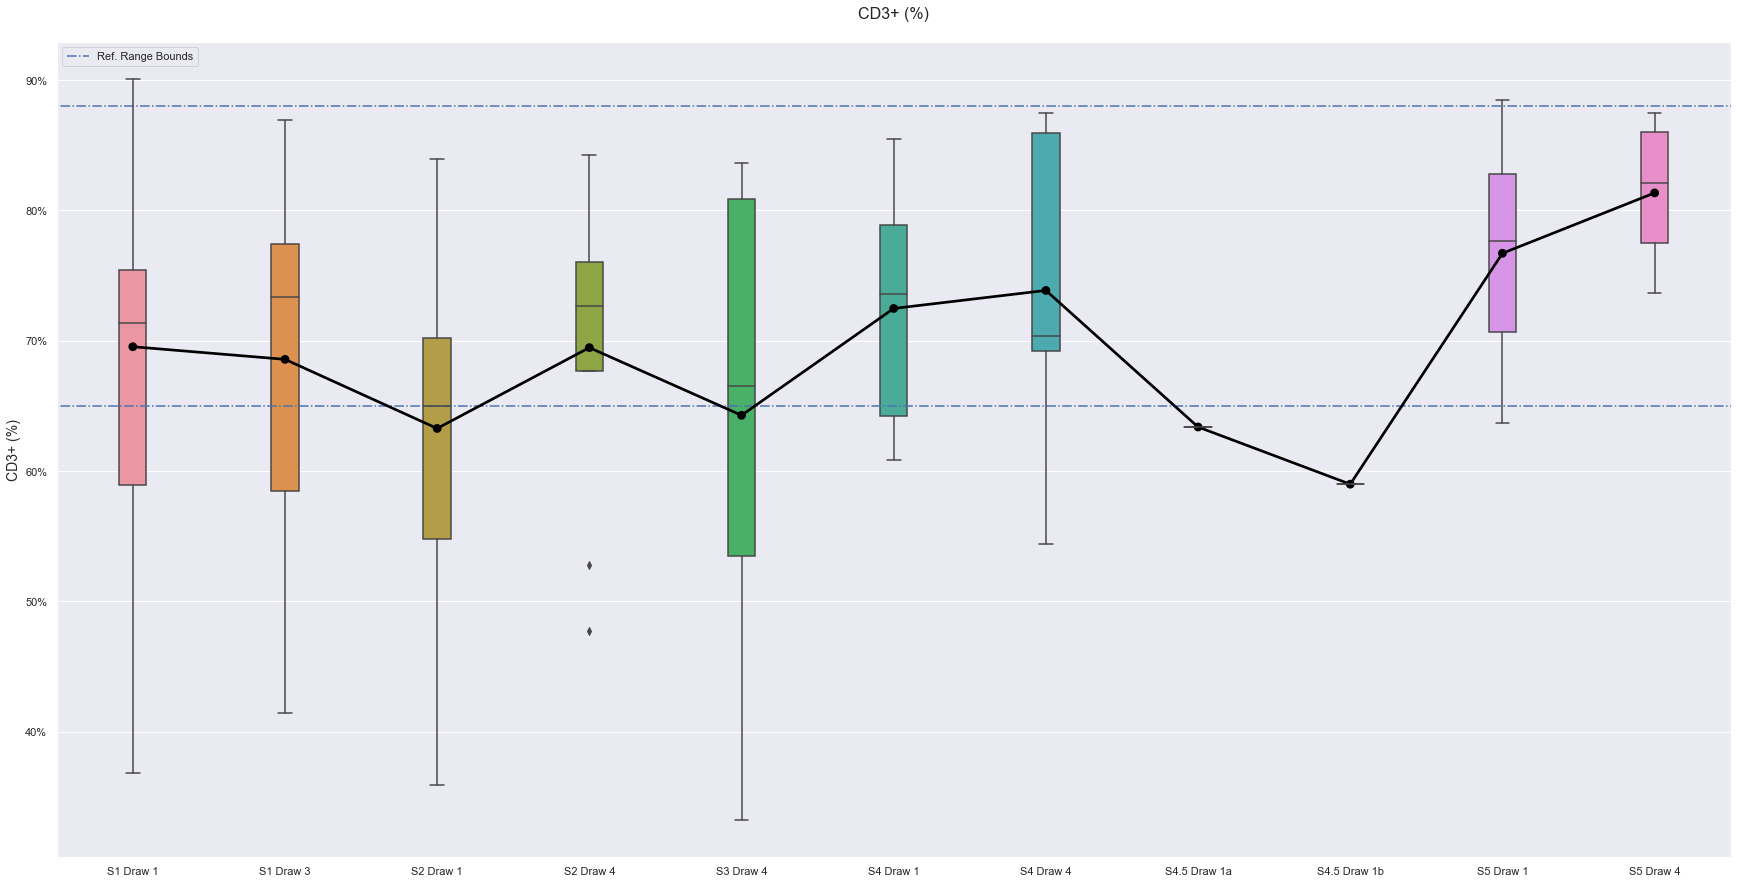

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\utils.py:178: FutureWarning: This function is deprecated and will be removed in a future version
  warnings.warn(msg, FutureWarning)


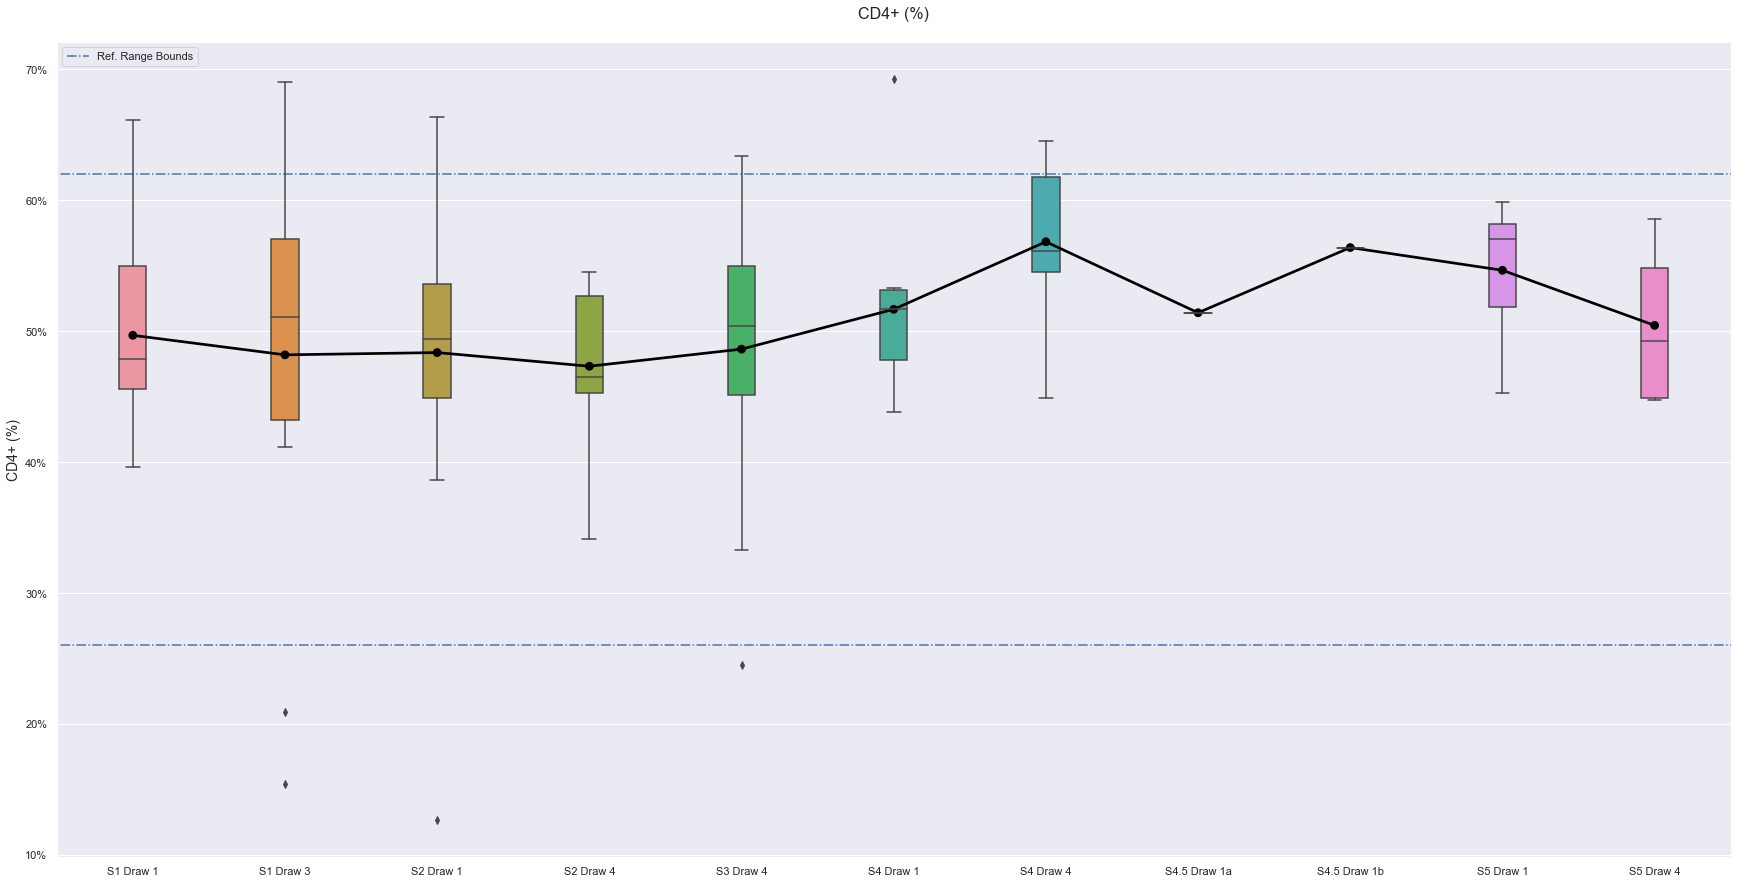

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\utils.py:178: FutureWarning: This function is deprecated and will be removed in a future version
  warnings.warn(msg, FutureWarning)


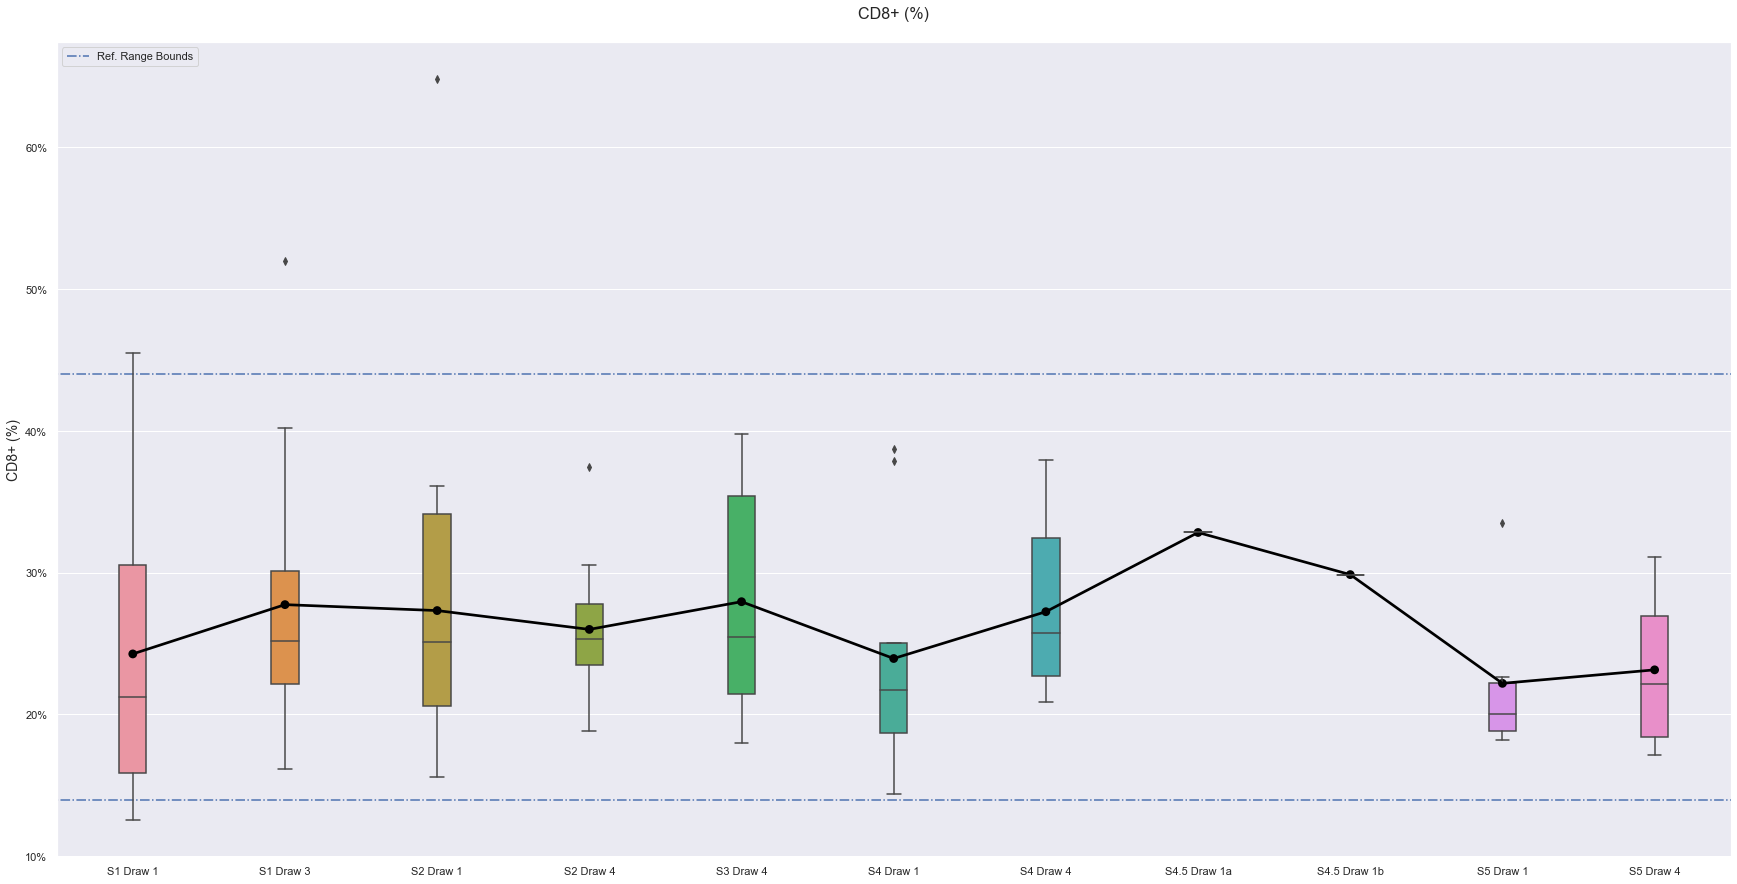

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\utils.py:178: FutureWarning: This function is deprecated and will be removed in a future version
  warnings.warn(msg, FutureWarning)


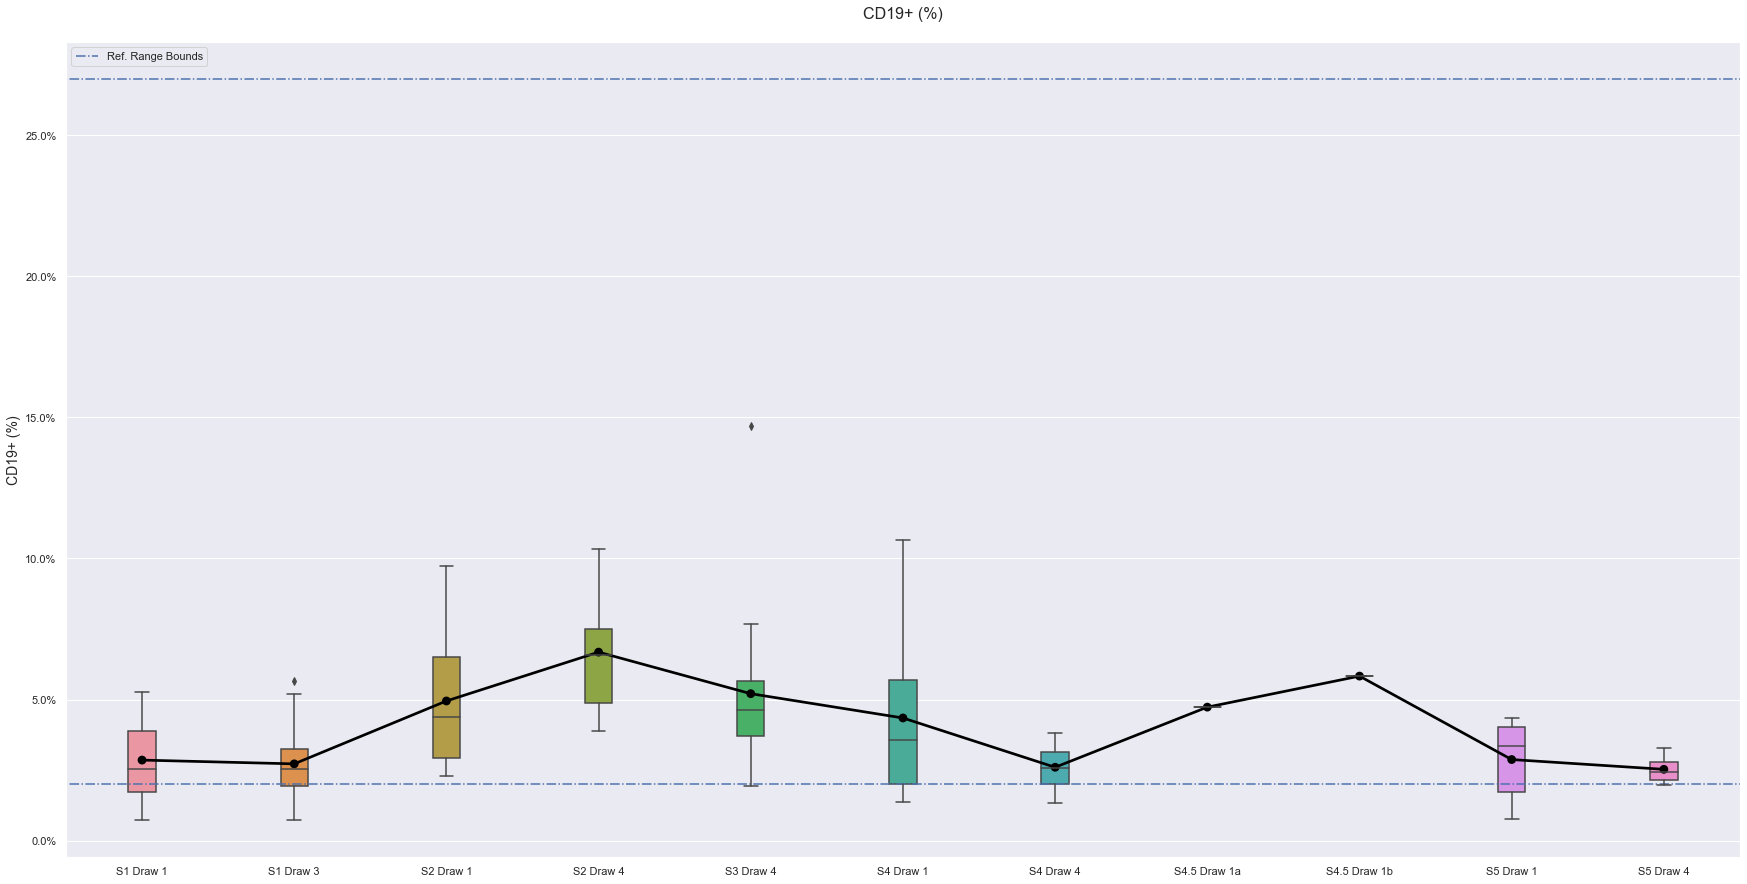

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\utils.py:178: FutureWarning: This function is deprecated and will be removed in a future version
  warnings.warn(msg, FutureWarning)
No handles with labels found to put in legend.


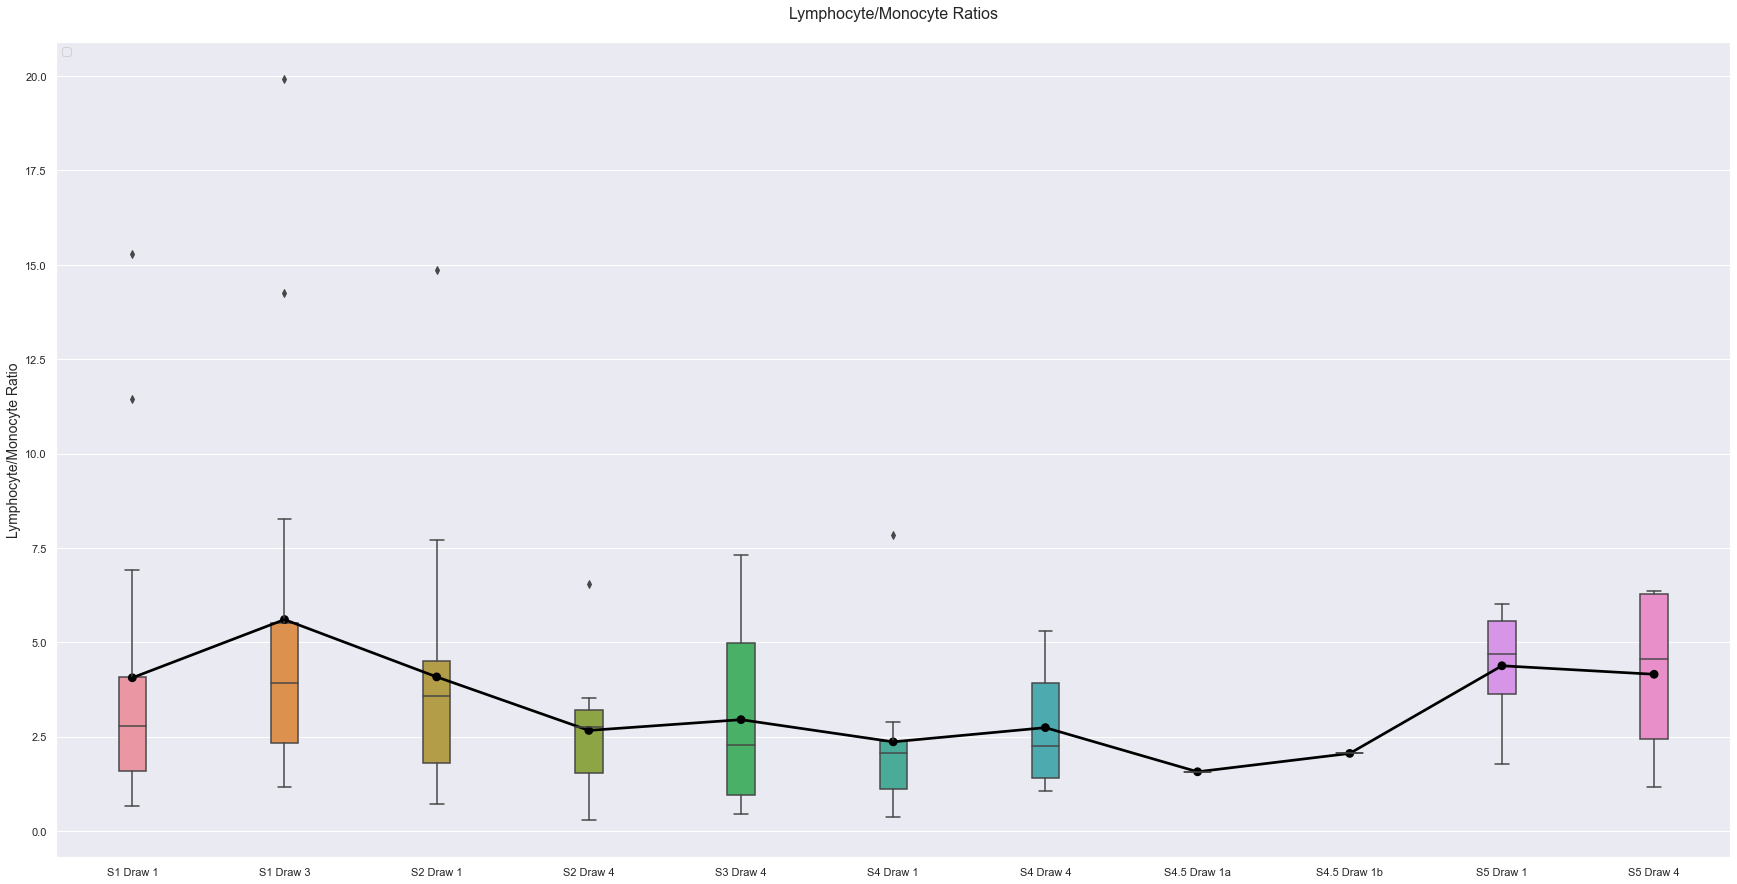

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\utils.py:178: FutureWarning: This function is deprecated and will be removed in a future version
  warnings.warn(msg, FutureWarning)


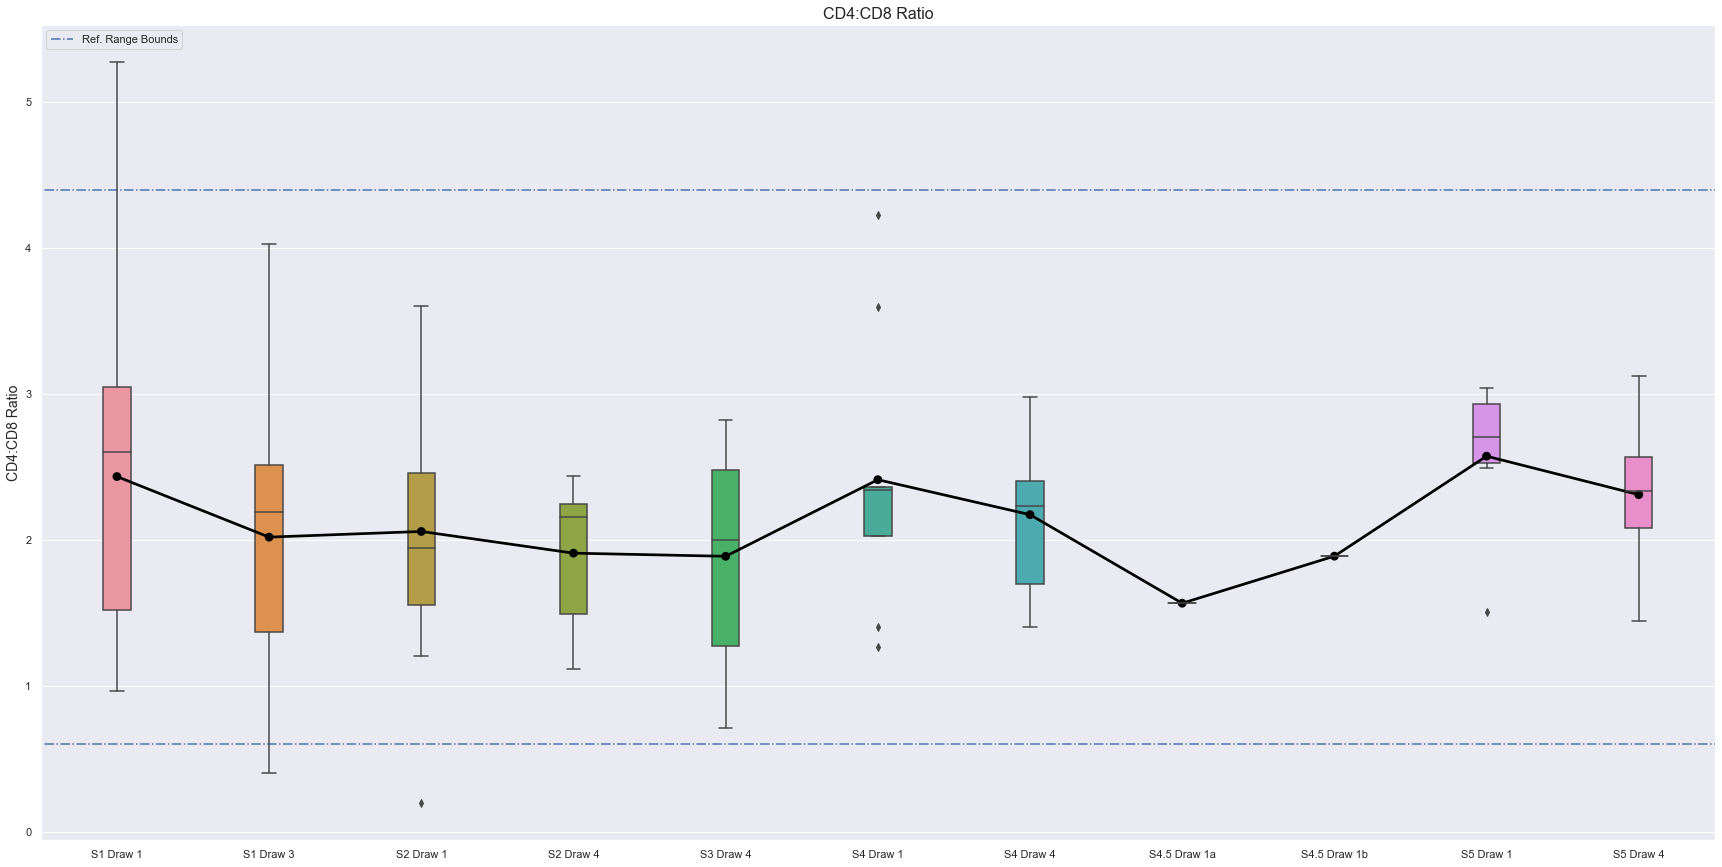

In [137]:
#This time, try only Good.
for i in desired_feat:
    plot_data= {
        'S1 Draw 1': wd[wd_list[0]][wd[wd_list[0]]['VO2 Rank (Bin)'] == 'Good'][i],
        'S1 Draw 3': wd[wd_list[1]][wd[wd_list[1]]['VO2 Rank (Bin)'] == 'Good'][i],
        'S2 Draw 1': wd[wd_list[2]][wd[wd_list[2]]['VO2 Rank (Bin)'] == 'Good'][i],
        'S2 Draw 4': wd[wd_list[3]][wd[wd_list[3]]['VO2 Rank (Bin)'] == 'Good'][i],
        'S3 Draw 4': wd[wd_list[4]][wd[wd_list[4]]['VO2 Rank (Bin)'] == 'Good'][i],
        'S4 Draw 1': wd[wd_list[5]][wd[wd_list[5]]['VO2 Rank (Bin)'] == 'Good'][i],
        'S4 Draw 4': wd[wd_list[6]][wd[wd_list[6]]['VO2 Rank (Bin)'] == 'Good'][i],
        'S4.5 Draw 1a': wd[wd_list[7]][wd[wd_list[7]]['VO2 Rank (Bin)'] == 'Good'][i],
        'S4.5 Draw 1b': wd[wd_list[8]][wd[wd_list[8]]['VO2 Rank (Bin)'] == 'Good'][i],
        'S5 Draw 1': wd[wd_list[9]][wd[wd_list[9]]['VO2 Rank (Bin)'] == 'Good'][i],
        'S5 Draw 4': wd[wd_list[10]][wd[wd_list[10]]['VO2 Rank (Bin)'] == 'Good'][i]
    }
    sorted_keys, sorted_vals = zip(*sorted(plot_data.items(), key=op.itemgetter(0)))

    #Get data in a proper format.
    fixed_data = list(plot_data)
    fig, ax = plt.subplots(figsize=dims)

    #Set up the graph parameters.
    sns.set(context='notebook', style='darkgrid')

    b = sns.boxplot(data=sorted_vals, width=.18)
    
    if i != 'lymphocyte/monocyte ratio':
        sns.utils.axlabel(xlabel='', ylabel=i[1:] + ' (%)', fontsize=axes_label_size)
        b.set_title(i[1:] + ' (%)\n', fontsize=title_size)
        
        #Reference ranges found in the Florida paper.
        ax.hlines(ref.loc[ref_idx[i],['Ref. Min']]/100, xmin = -1, xmax = 12, ls='-.', label = 'Ref. Range Lower Bound')
        ax.hlines(ref.loc[ref_idx[i],['Ref. Max']]/100, xmin = -1, xmax = 12, ls='-.', label = 'Ref. Range Upper Bound')
    else:
        sns.utils.axlabel(xlabel='', ylabel='Lymphocyte/Monocyte Ratio', fontsize=axes_label_size)
        b.set_title('Lymphocyte/Monocyte Ratios\n', fontsize=title_size)
    
    ax = sns.pointplot(data=sorted_vals, ci=None, color='black')
    #sns.swarmplot(data=sorted_vals, size=6, edgecolor="black", linewidth=.9)
    
    if i != 'lymphocyte/monocyte ratio':
        b.axes.yaxis.set_major_formatter(PercentFormatter(1))
        
    #Category labels added here
    plt.xticks(plt.xticks()[0], sorted_keys)
    handles, _ = ax.get_legend_handles_labels()
    ax.legend(loc='upper left', handles=handles, labels=["Ref. Range Bounds"])
    plt.show()
    
#A separate run needed for CD4:CD8 Ratio.
plot_data= {
    'S1 Draw 1': wd[wd_list[0]][wd[wd_list[0]]['VO2 Rank (Bin)'] == 'Good'][desired_feat[1]]/wd[wd_list[0]][wd[wd_list[0]]['VO2 Rank (Bin)'] == 'Good'][desired_feat[2]],
    'S1 Draw 3': wd[wd_list[1]][wd[wd_list[1]]['VO2 Rank (Bin)'] == 'Good'][desired_feat[1]]/wd[wd_list[1]][wd[wd_list[1]]['VO2 Rank (Bin)'] == 'Good'][desired_feat[2]],
    'S2 Draw 1': wd[wd_list[2]][wd[wd_list[2]]['VO2 Rank (Bin)'] == 'Good'][desired_feat[1]]/wd[wd_list[2]][wd[wd_list[2]]['VO2 Rank (Bin)'] == 'Good'][desired_feat[2]],
    'S2 Draw 4': wd[wd_list[3]][wd[wd_list[3]]['VO2 Rank (Bin)'] == 'Good'][desired_feat[1]]/wd[wd_list[3]][wd[wd_list[3]]['VO2 Rank (Bin)'] == 'Good'][desired_feat[2]],
    'S3 Draw 4': wd[wd_list[4]][wd[wd_list[4]]['VO2 Rank (Bin)'] == 'Good'][desired_feat[1]]/wd[wd_list[4]][wd[wd_list[4]]['VO2 Rank (Bin)'] == 'Good'][desired_feat[2]],
    'S4 Draw 1': wd[wd_list[5]][wd[wd_list[5]]['VO2 Rank (Bin)'] == 'Good'][desired_feat[1]]/wd[wd_list[5]][wd[wd_list[5]]['VO2 Rank (Bin)'] == 'Good'][desired_feat[2]],
    'S4 Draw 4': wd[wd_list[6]][wd[wd_list[6]]['VO2 Rank (Bin)'] == 'Good'][desired_feat[1]]/wd[wd_list[6]][wd[wd_list[6]]['VO2 Rank (Bin)'] == 'Good'][desired_feat[2]],
    'S4.5 Draw 1a': wd[wd_list[7]][wd[wd_list[7]]['VO2 Rank (Bin)'] == 'Good'][desired_feat[1]]/wd[wd_list[7]][wd[wd_list[7]]['VO2 Rank (Bin)'] == 'Good'][desired_feat[2]],
    'S4.5 Draw 1b': wd[wd_list[8]][wd[wd_list[8]]['VO2 Rank (Bin)'] == 'Good'][desired_feat[1]]/wd[wd_list[8]][wd[wd_list[8]]['VO2 Rank (Bin)'] == 'Good'][desired_feat[2]],
    'S5 Draw 1': wd[wd_list[9]][wd[wd_list[9]]['VO2 Rank (Bin)'] == 'Good'][desired_feat[1]]/wd[wd_list[9]][wd[wd_list[9]]['VO2 Rank (Bin)'] == 'Good'][desired_feat[2]],
    'S5 Draw 4': wd[wd_list[10]][wd[wd_list[10]]['VO2 Rank (Bin)'] == 'Good'][desired_feat[1]]/wd[wd_list[10]][wd[wd_list[10]]['VO2 Rank (Bin)'] == 'Good'][desired_feat[2]]
}
sorted_keys, sorted_vals = zip(*sorted(plot_data.items(), key=op.itemgetter(0)))

#Get data in a proper format.
fixed_data = list(plot_data)
fig, ax = plt.subplots(figsize=dims)

#Set up the graph parameters.
sns.set(context='notebook', style='darkgrid')

b = sns.boxplot(data=sorted_vals, width=.18)

sns.utils.axlabel(xlabel='', ylabel='CD4:CD8 Ratio', fontsize=axes_label_size)
b.set_title('CD4:CD8 Ratio', fontsize=title_size)

#Reference ranges found in the Florida paper.
ax.hlines(ref.loc[cd4_cd8_ratio_idx,['Ref. Min']], xmin = -1, xmax = 12, ls='-.', label = 'Ref. Range Lower Bound')
ax.hlines(ref.loc[cd4_cd8_ratio_idx,['Ref. Max']], xmin = -1, xmax = 12, ls='-.', label = 'Ref. Range Upper Bound')

ax = sns.pointplot(data=sorted_vals, ci=None, color='black')
#sns.swarmplot(data=sorted_vals, size=6, edgecolor="black", linewidth=.9)

if i != 'lymphocyte/monocyte ratio':
    b.axes.yaxis.set_major_formatter(PercentFormatter(1))

#Category labels added here
plt.xticks(plt.xticks()[0], sorted_keys)
handles, _ = ax.get_legend_handles_labels()
ax.legend(loc='upper left', handles=handles, labels=["Ref. Range Bounds"])
plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\utils.py:178: FutureWarning: This function is deprecated and will be removed in a future version
  warnings.warn(msg, FutureWarning)


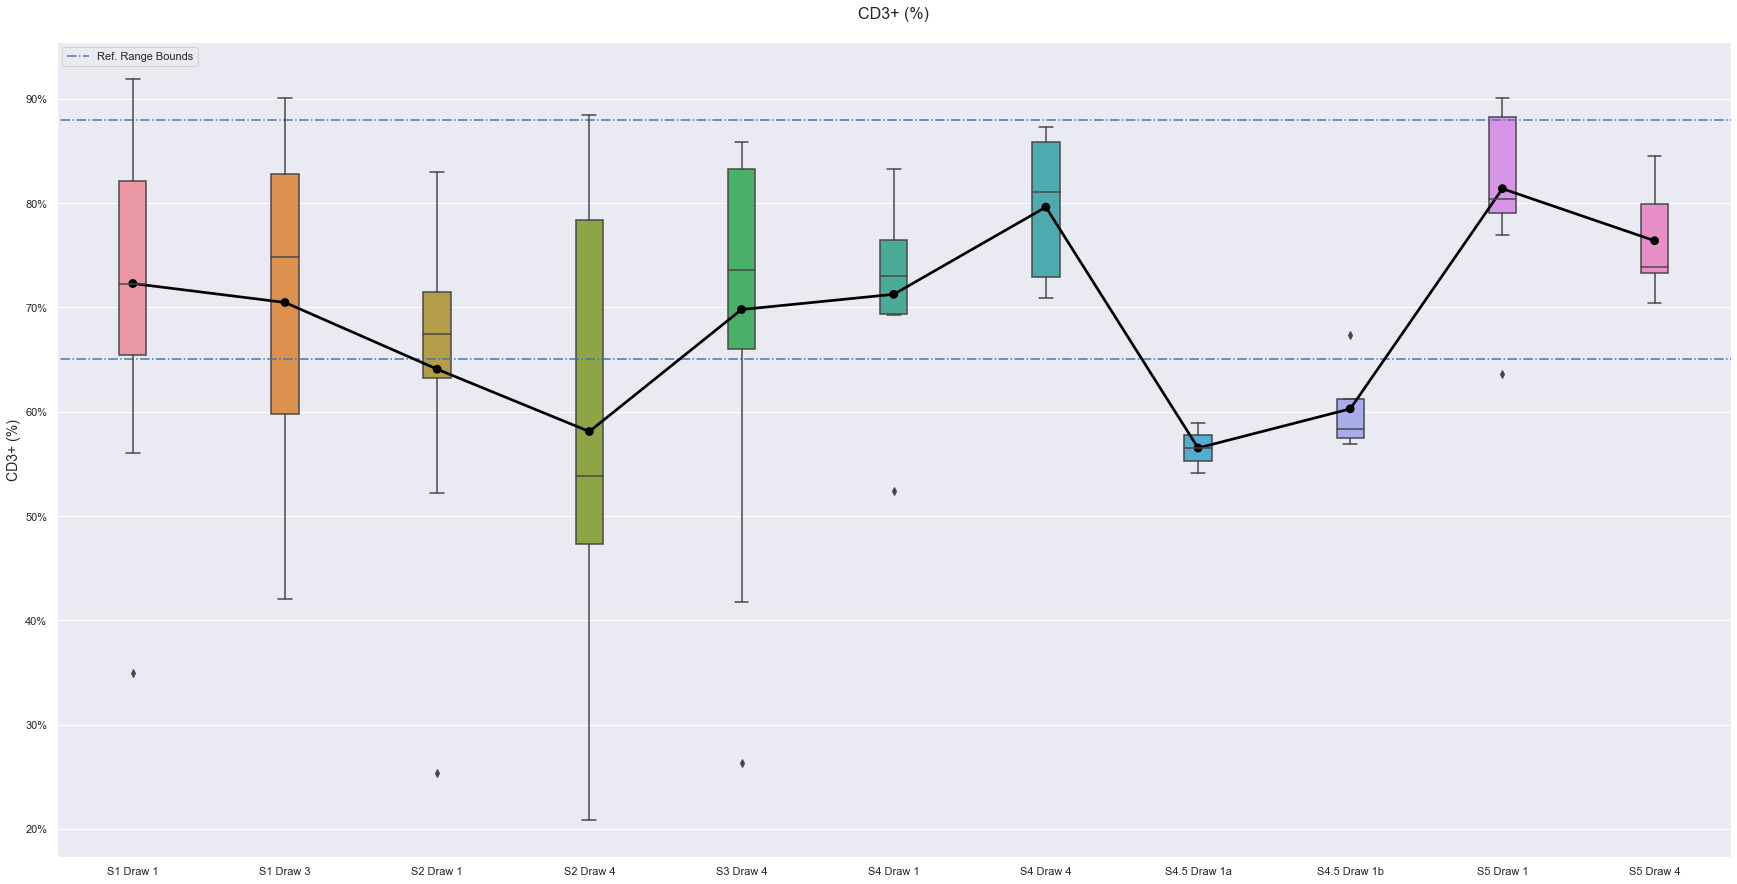

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\utils.py:178: FutureWarning: This function is deprecated and will be removed in a future version
  warnings.warn(msg, FutureWarning)


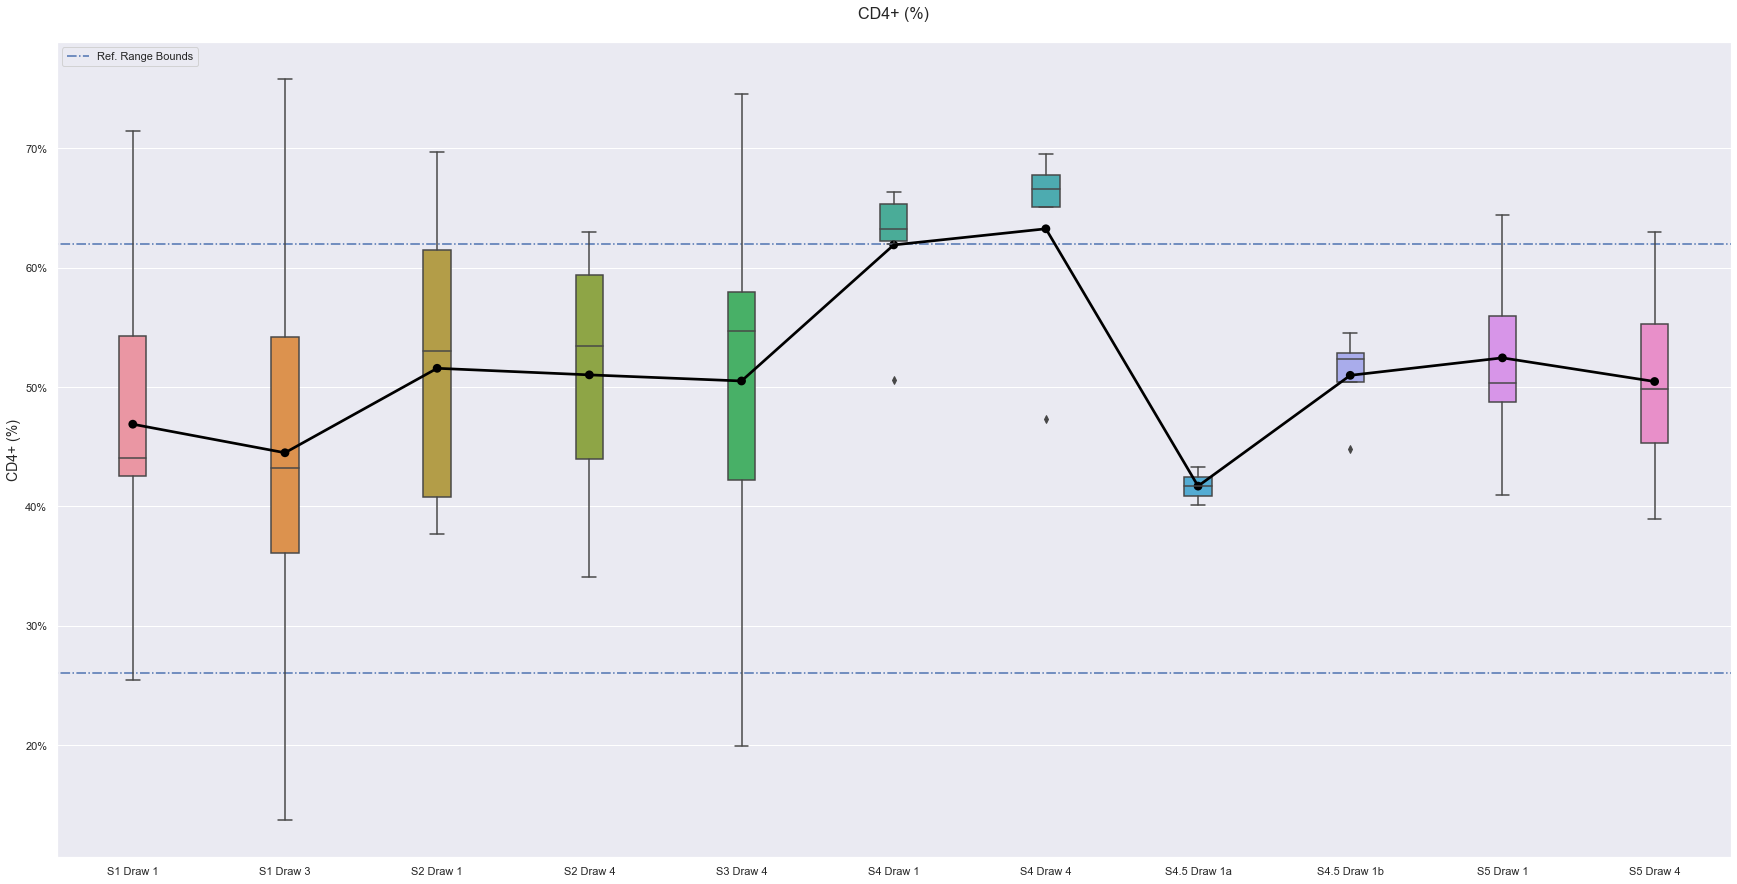

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\utils.py:178: FutureWarning: This function is deprecated and will be removed in a future version
  warnings.warn(msg, FutureWarning)


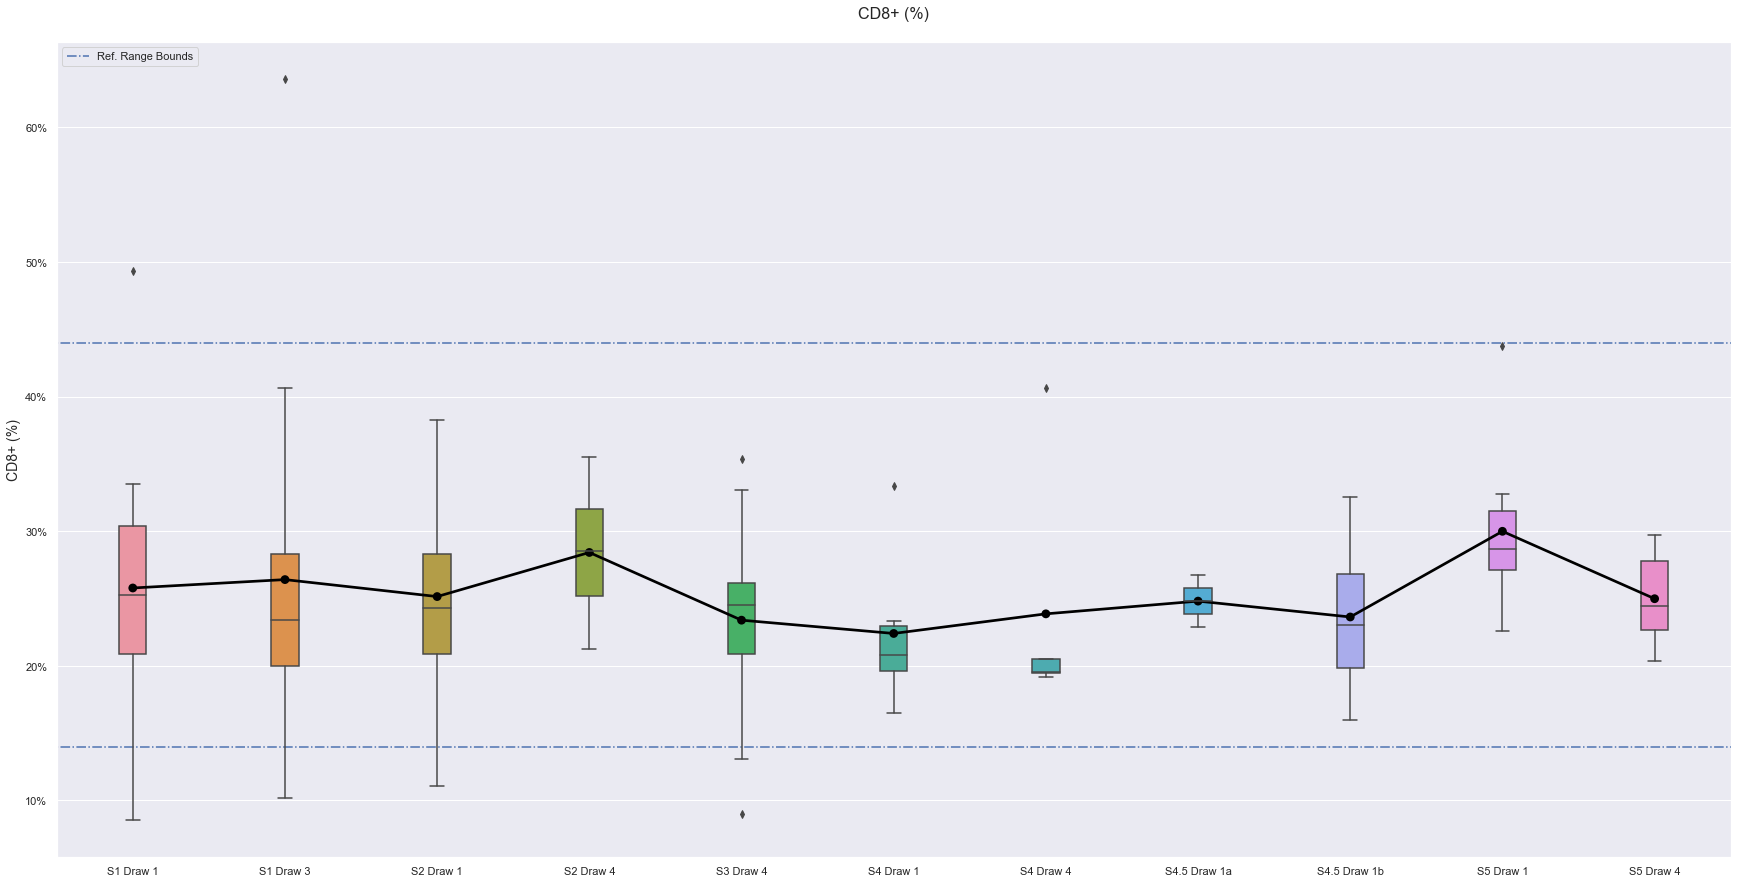

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\utils.py:178: FutureWarning: This function is deprecated and will be removed in a future version
  warnings.warn(msg, FutureWarning)


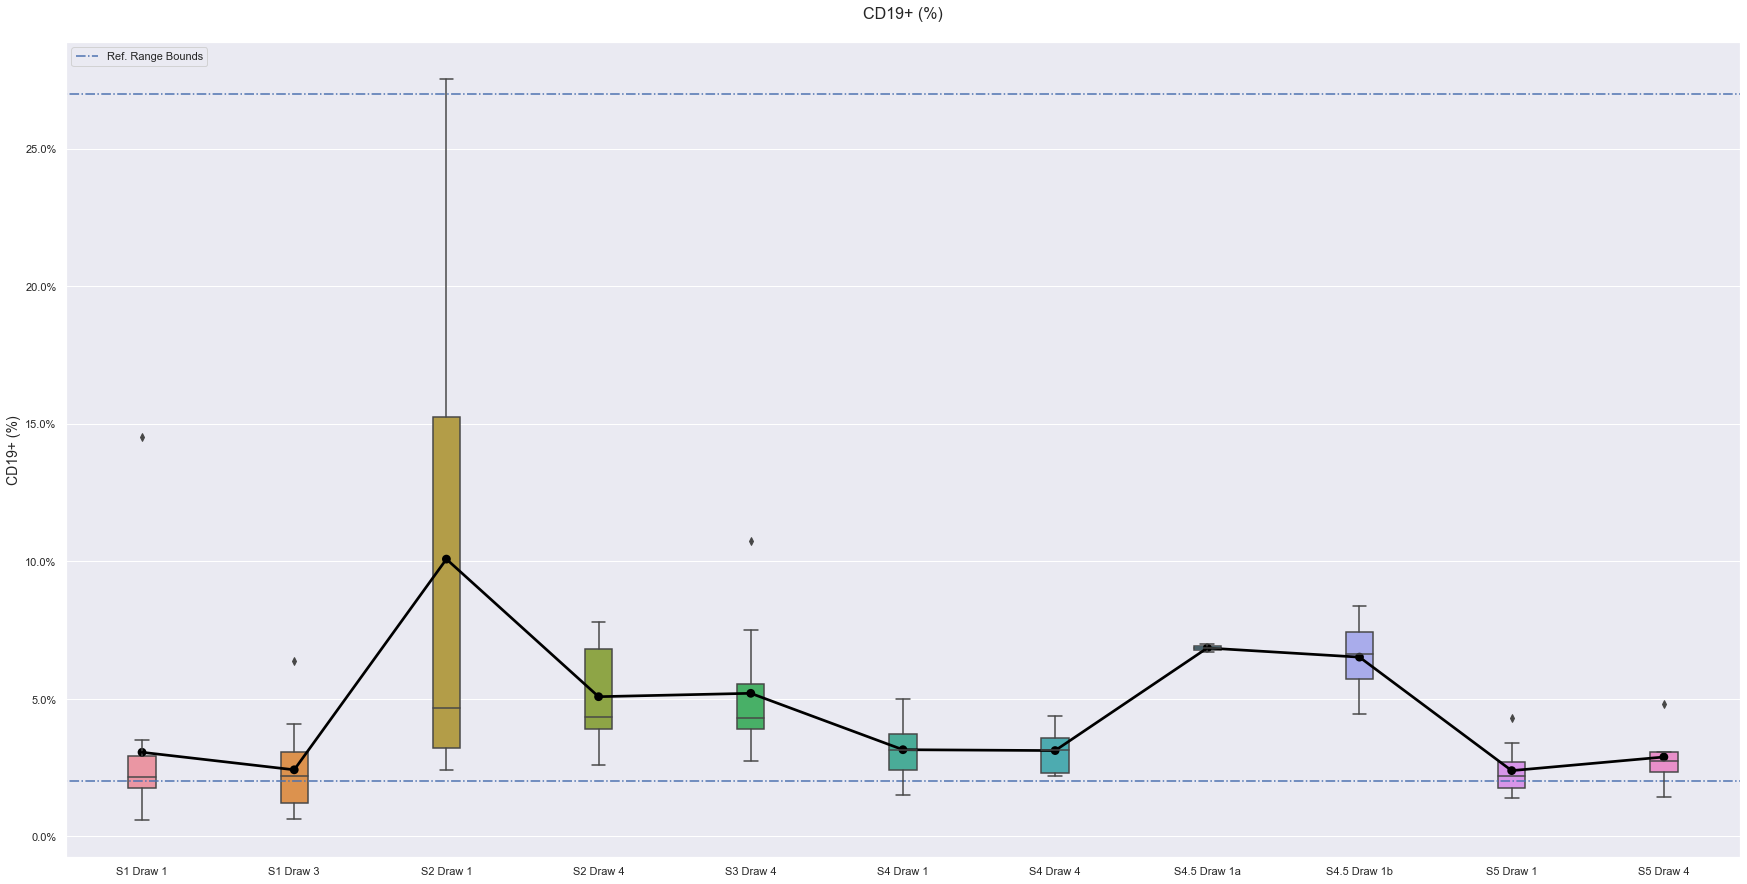

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\utils.py:178: FutureWarning: This function is deprecated and will be removed in a future version
  warnings.warn(msg, FutureWarning)
No handles with labels found to put in legend.


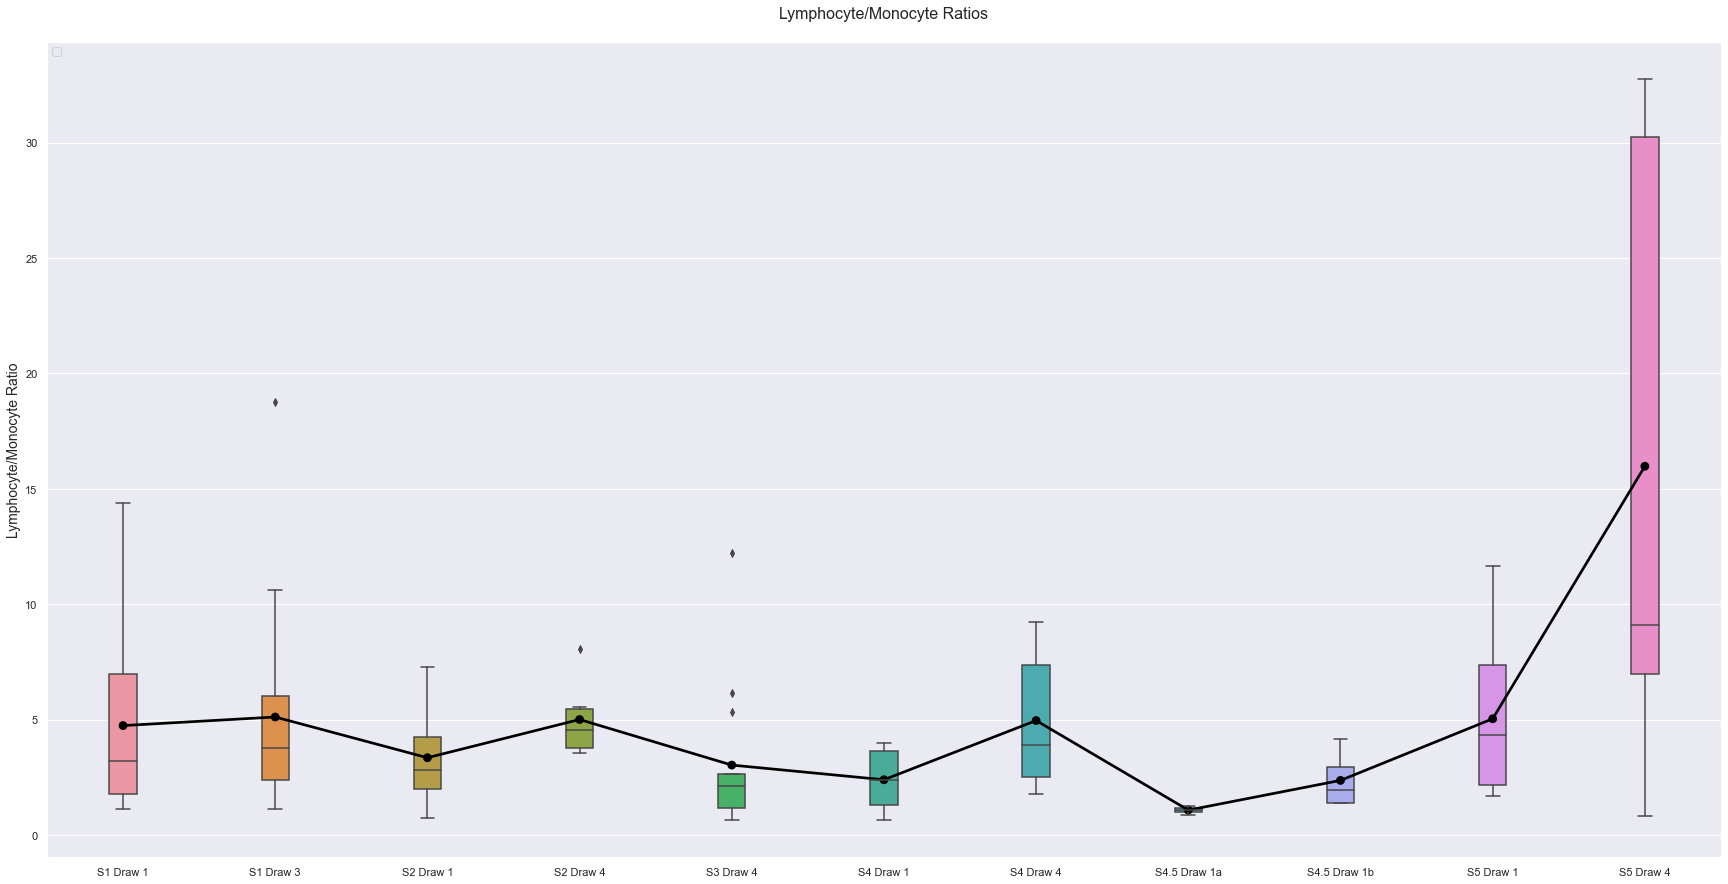

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\utils.py:178: FutureWarning: This function is deprecated and will be removed in a future version
  warnings.warn(msg, FutureWarning)


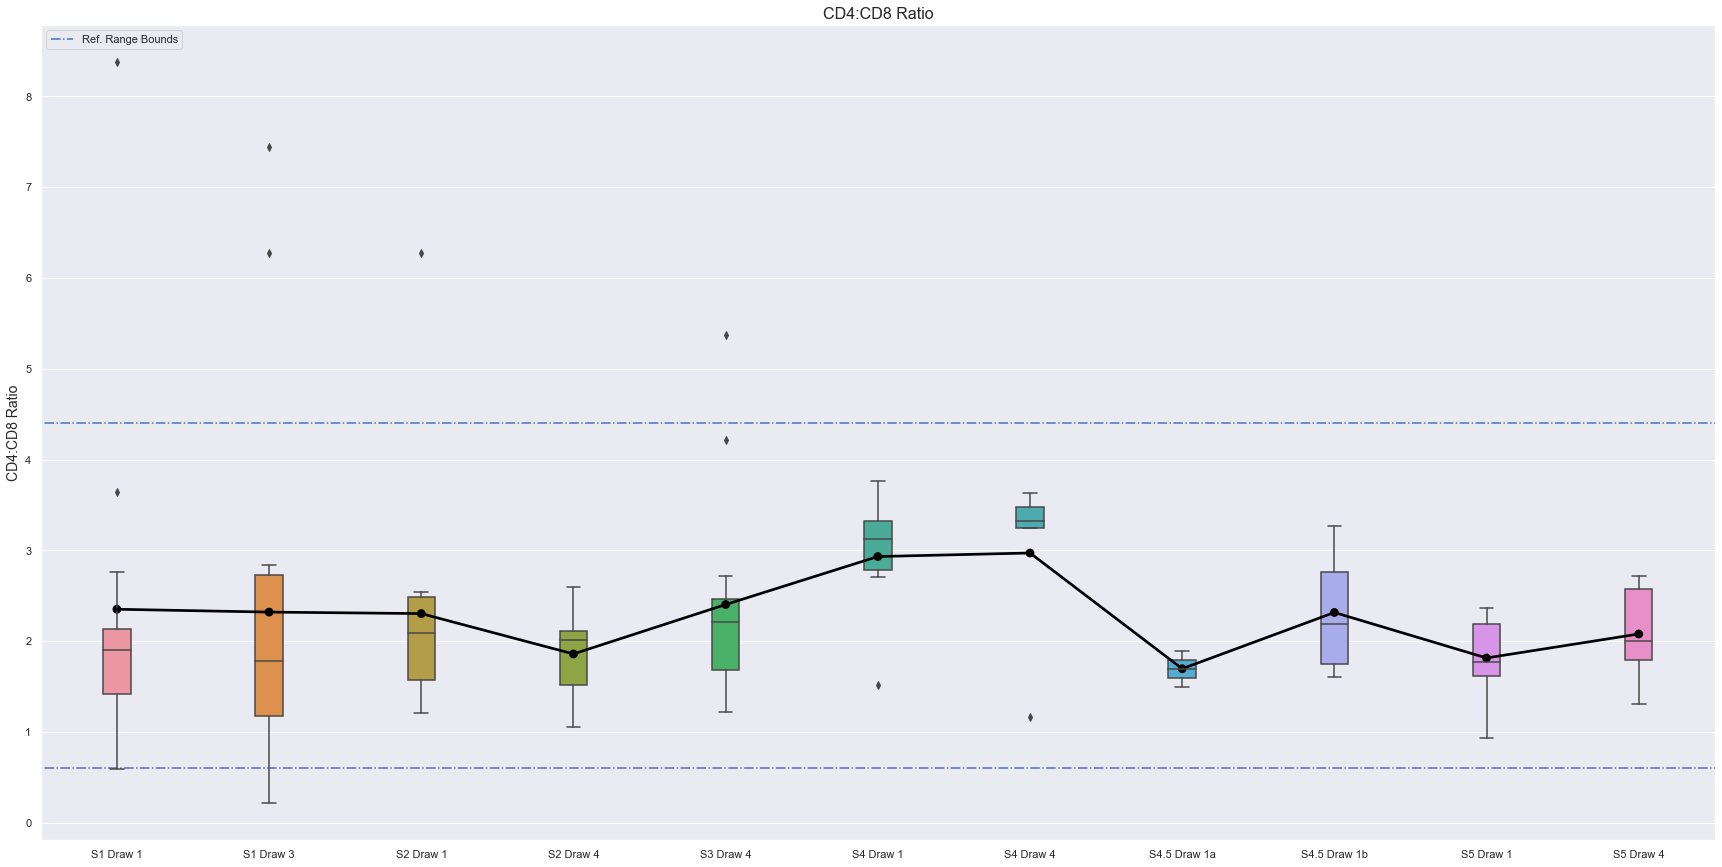

In [138]:
#This time, try only Excellent.
for i in desired_feat:
    plot_data= {
        'S1 Draw 1': wd[wd_list[0]][wd[wd_list[0]]['VO2 Rank (Bin)'] == 'Excellent'][i],
        'S1 Draw 3': wd[wd_list[1]][wd[wd_list[1]]['VO2 Rank (Bin)'] == 'Excellent'][i],
        'S2 Draw 1': wd[wd_list[2]][wd[wd_list[2]]['VO2 Rank (Bin)'] == 'Excellent'][i],
        'S2 Draw 4': wd[wd_list[3]][wd[wd_list[3]]['VO2 Rank (Bin)'] == 'Excellent'][i],
        'S3 Draw 4': wd[wd_list[4]][wd[wd_list[4]]['VO2 Rank (Bin)'] == 'Excellent'][i],
        'S4 Draw 1': wd[wd_list[5]][wd[wd_list[5]]['VO2 Rank (Bin)'] == 'Excellent'][i],
        'S4 Draw 4': wd[wd_list[6]][wd[wd_list[6]]['VO2 Rank (Bin)'] == 'Excellent'][i],
        'S4.5 Draw 1a': wd[wd_list[7]][wd[wd_list[7]]['VO2 Rank (Bin)'] == 'Excellent'][i],
        'S4.5 Draw 1b': wd[wd_list[8]][wd[wd_list[8]]['VO2 Rank (Bin)'] == 'Excellent'][i],
        'S5 Draw 1': wd[wd_list[9]][wd[wd_list[9]]['VO2 Rank (Bin)'] == 'Excellent'][i],
        'S5 Draw 4': wd[wd_list[10]][wd[wd_list[10]]['VO2 Rank (Bin)'] == 'Excellent'][i]
    }
    sorted_keys, sorted_vals = zip(*sorted(plot_data.items(), key=op.itemgetter(0)))

    #Get data in a proper format.
    fixed_data = list(plot_data)
    fig, ax = plt.subplots(figsize=dims)

    #Set up the graph parameters.
    sns.set(context='notebook', style='darkgrid')

    b = sns.boxplot(data=sorted_vals, width=.18)
    
    if i != 'lymphocyte/monocyte ratio':
        sns.utils.axlabel(xlabel='', ylabel=i[1:] + ' (%)', fontsize=axes_label_size)
        b.set_title(i[1:] + ' (%)\n', fontsize=title_size)
        
        #Reference ranges found in the Florida paper.
        ax.hlines(ref.loc[ref_idx[i],['Ref. Min']]/100, xmin = -1, xmax = 12, ls='-.', label = 'Ref. Range Lower Bound')
        ax.hlines(ref.loc[ref_idx[i],['Ref. Max']]/100, xmin = -1, xmax = 12, ls='-.', label = 'Ref. Range Upper Bound')
    else:
        sns.utils.axlabel(xlabel='', ylabel='Lymphocyte/Monocyte Ratio', fontsize=axes_label_size)
        b.set_title('Lymphocyte/Monocyte Ratios\n', fontsize=title_size)
    
    ax = sns.pointplot(data=sorted_vals, ci=None, color='black')
    #sns.swarmplot(data=sorted_vals, size=6, edgecolor="black", linewidth=.9)
    
    if i != 'lymphocyte/monocyte ratio':
        b.axes.yaxis.set_major_formatter(PercentFormatter(1))
        
    #Category labels added here
    plt.xticks(plt.xticks()[0], sorted_keys)
    handles, _ = ax.get_legend_handles_labels()
    ax.legend(loc='upper left', handles=handles, labels=["Ref. Range Bounds"])
    plt.show()
    
#A separate run needed for CD4:CD8 Ratio.
plot_data= {
    'S1 Draw 1': wd[wd_list[0]][wd[wd_list[0]]['VO2 Rank (Bin)'] == 'Excellent'][desired_feat[1]]/wd[wd_list[0]][wd[wd_list[0]]['VO2 Rank (Bin)'] == 'Excellent'][desired_feat[2]],
    'S1 Draw 3': wd[wd_list[1]][wd[wd_list[1]]['VO2 Rank (Bin)'] == 'Excellent'][desired_feat[1]]/wd[wd_list[1]][wd[wd_list[1]]['VO2 Rank (Bin)'] == 'Excellent'][desired_feat[2]],
    'S2 Draw 1': wd[wd_list[2]][wd[wd_list[2]]['VO2 Rank (Bin)'] == 'Excellent'][desired_feat[1]]/wd[wd_list[2]][wd[wd_list[2]]['VO2 Rank (Bin)'] == 'Excellent'][desired_feat[2]],
    'S2 Draw 4': wd[wd_list[3]][wd[wd_list[3]]['VO2 Rank (Bin)'] == 'Excellent'][desired_feat[1]]/wd[wd_list[3]][wd[wd_list[3]]['VO2 Rank (Bin)'] == 'Excellent'][desired_feat[2]],
    'S3 Draw 4': wd[wd_list[4]][wd[wd_list[4]]['VO2 Rank (Bin)'] == 'Excellent'][desired_feat[1]]/wd[wd_list[4]][wd[wd_list[4]]['VO2 Rank (Bin)'] == 'Excellent'][desired_feat[2]],
    'S4 Draw 1': wd[wd_list[5]][wd[wd_list[5]]['VO2 Rank (Bin)'] == 'Excellent'][desired_feat[1]]/wd[wd_list[5]][wd[wd_list[5]]['VO2 Rank (Bin)'] == 'Excellent'][desired_feat[2]],
    'S4 Draw 4': wd[wd_list[6]][wd[wd_list[6]]['VO2 Rank (Bin)'] == 'Excellent'][desired_feat[1]]/wd[wd_list[6]][wd[wd_list[6]]['VO2 Rank (Bin)'] == 'Excellent'][desired_feat[2]],
    'S4.5 Draw 1a': wd[wd_list[7]][wd[wd_list[7]]['VO2 Rank (Bin)'] == 'Excellent'][desired_feat[1]]/wd[wd_list[7]][wd[wd_list[7]]['VO2 Rank (Bin)'] == 'Excellent'][desired_feat[2]],
    'S4.5 Draw 1b': wd[wd_list[8]][wd[wd_list[8]]['VO2 Rank (Bin)'] == 'Excellent'][desired_feat[1]]/wd[wd_list[8]][wd[wd_list[8]]['VO2 Rank (Bin)'] == 'Excellent'][desired_feat[2]],
    'S5 Draw 1': wd[wd_list[9]][wd[wd_list[9]]['VO2 Rank (Bin)'] == 'Excellent'][desired_feat[1]]/wd[wd_list[9]][wd[wd_list[9]]['VO2 Rank (Bin)'] == 'Excellent'][desired_feat[2]],
    'S5 Draw 4': wd[wd_list[10]][wd[wd_list[10]]['VO2 Rank (Bin)'] == 'Excellent'][desired_feat[1]]/wd[wd_list[10]][wd[wd_list[10]]['VO2 Rank (Bin)'] == 'Excellent'][desired_feat[2]]
}
sorted_keys, sorted_vals = zip(*sorted(plot_data.items(), key=op.itemgetter(0)))

#Get data in a proper format.
fixed_data = list(plot_data)
fig, ax = plt.subplots(figsize=dims)

#Set up the graph parameters.
sns.set(context='notebook', style='darkgrid')

b = sns.boxplot(data=sorted_vals, width=.18)

sns.utils.axlabel(xlabel='', ylabel='CD4:CD8 Ratio', fontsize=axes_label_size)
b.set_title('CD4:CD8 Ratio', fontsize=title_size)

#Reference ranges found in the Florida paper.
ax.hlines(ref.loc[cd4_cd8_ratio_idx,['Ref. Min']], xmin = -1, xmax = 12, ls='-.', label = 'Ref. Range Lower Bound')
ax.hlines(ref.loc[cd4_cd8_ratio_idx,['Ref. Max']], xmin = -1, xmax = 12, ls='-.', label = 'Ref. Range Upper Bound')

ax = sns.pointplot(data=sorted_vals, ci=None, color='black')
#sns.swarmplot(data=sorted_vals, size=6, edgecolor="black", linewidth=.9)

if i != 'lymphocyte/monocyte ratio':
    b.axes.yaxis.set_major_formatter(PercentFormatter(1))

#Category labels added here
plt.xticks(plt.xticks()[0], sorted_keys)
handles, _ = ax.get_legend_handles_labels()
ax.legend(loc='upper left', handles=handles, labels=["Ref. Range Bounds"])
plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\utils.py:178: FutureWarning: This function is deprecated and will be removed in a future version
  warnings.warn(msg, FutureWarning)


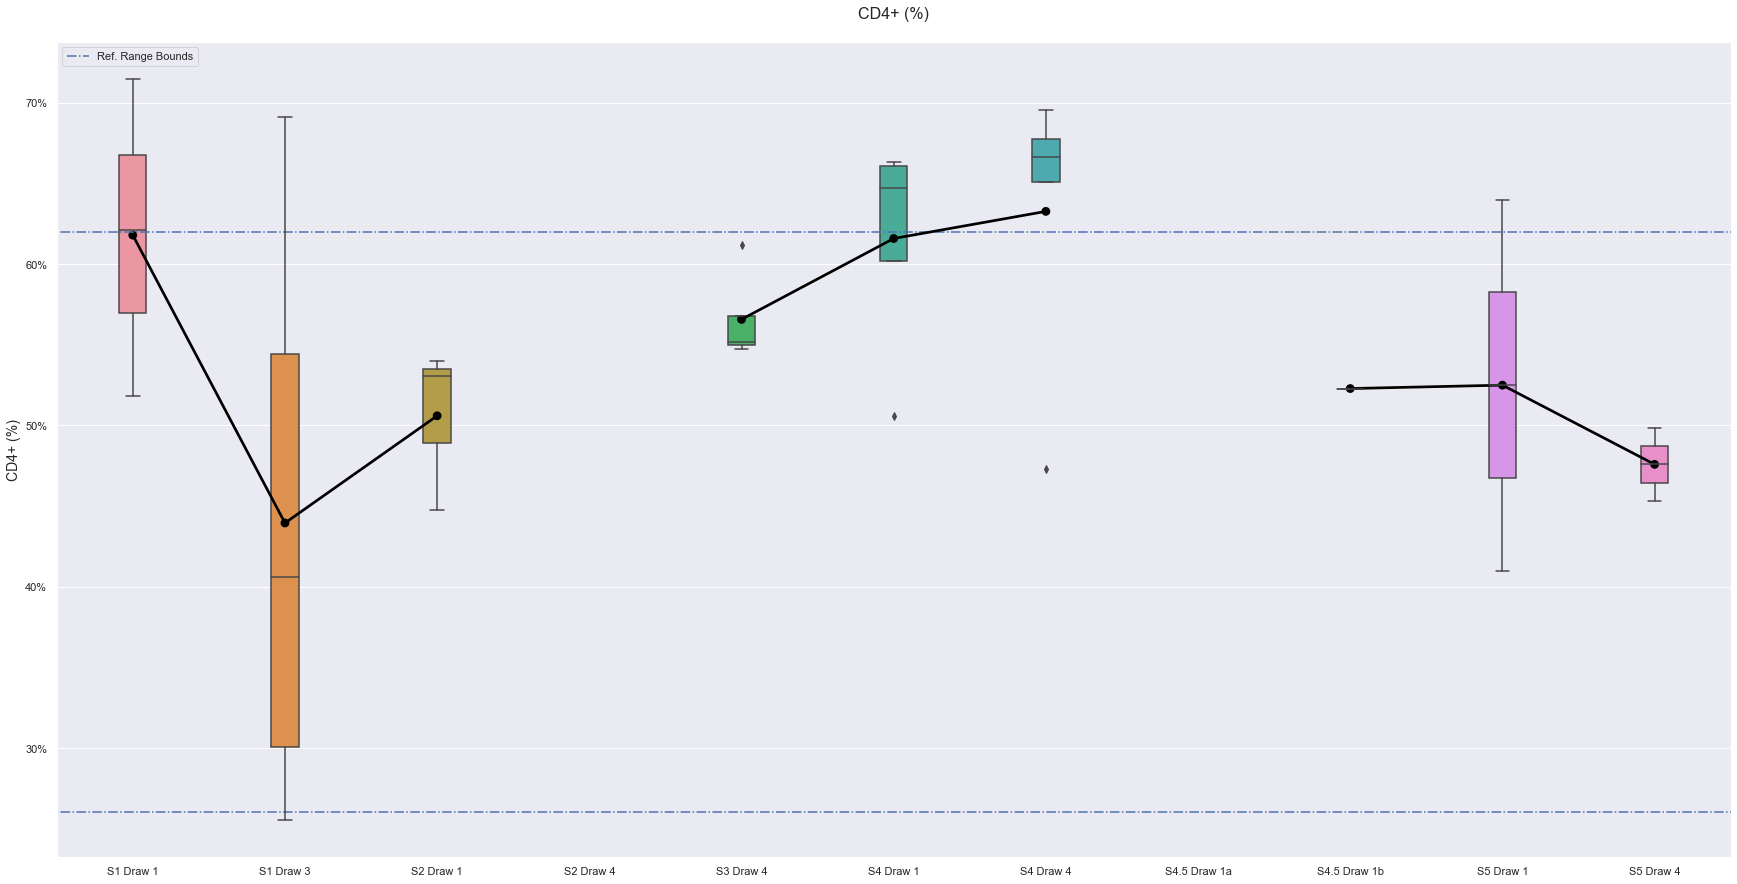

In [142]:
i = desired_feat[1]
plot_data= {
    'S1 Draw 1': wd[wd_list[0]].loc[wd[wd_list[0]]['Subject ID'].isin(wd[wd_list[6]][wd[wd_list[6]]['VO2 Rank (Bin)'] == 'Excellent']['Subject ID'])][i],
    'S1 Draw 3': wd[wd_list[1]].loc[wd[wd_list[1]]['Subject ID'].isin(wd[wd_list[6]][wd[wd_list[6]]['VO2 Rank (Bin)'] == 'Excellent']['Subject ID'])][i],
    'S2 Draw 1': wd[wd_list[2]].loc[wd[wd_list[2]]['Subject ID'].isin(wd[wd_list[6]][wd[wd_list[6]]['VO2 Rank (Bin)'] == 'Excellent']['Subject ID'])][i],
    'S2 Draw 4': wd[wd_list[3]].loc[wd[wd_list[3]]['Subject ID'].isin(wd[wd_list[6]][wd[wd_list[6]]['VO2 Rank (Bin)'] == 'Excellent']['Subject ID'])][i],
    'S3 Draw 4': wd[wd_list[4]].loc[wd[wd_list[4]]['Subject ID'].isin(wd[wd_list[6]][wd[wd_list[6]]['VO2 Rank (Bin)'] == 'Excellent']['Subject ID'])][i],
    'S4 Draw 1': wd[wd_list[5]].loc[wd[wd_list[5]]['Subject ID'].isin(wd[wd_list[6]][wd[wd_list[6]]['VO2 Rank (Bin)'] == 'Excellent']['Subject ID'])][i],
    'S4 Draw 4': wd[wd_list[6]].loc[wd[wd_list[6]]['Subject ID'].isin(wd[wd_list[6]][wd[wd_list[6]]['VO2 Rank (Bin)'] == 'Excellent']['Subject ID'])][i],
    'S4.5 Draw 1a': wd[wd_list[7]].loc[wd[wd_list[7]]['Subject ID'].isin(wd[wd_list[6]][wd[wd_list[6]]['VO2 Rank (Bin)'] == 'Excellent']['Subject ID'])][i],
    'S4.5 Draw 1b': wd[wd_list[8]].loc[wd[wd_list[8]]['Subject ID'].isin(wd[wd_list[6]][wd[wd_list[6]]['VO2 Rank (Bin)'] == 'Excellent']['Subject ID'])][i],
    'S5 Draw 1': wd[wd_list[9]].loc[wd[wd_list[9]]['Subject ID'].isin(wd[wd_list[6]][wd[wd_list[6]]['VO2 Rank (Bin)'] == 'Excellent']['Subject ID'])][i],
    'S5 Draw 4': wd[wd_list[10]].loc[wd[wd_list[10]]['Subject ID'].isin(wd[wd_list[6]][wd[wd_list[6]]['VO2 Rank (Bin)'] == 'Excellent']['Subject ID'])][i]
}
sorted_keys, sorted_vals = zip(*sorted(plot_data.items(), key=op.itemgetter(0)))

#Get data in a proper format.
fixed_data = list(plot_data)
fig, ax = plt.subplots(figsize=dims)

#Set up the graph parameters.
b = sns.boxplot(data=sorted_vals, width=.18)

if i != 'lymphocyte/monocyte ratio':
    sns.utils.axlabel(xlabel='', ylabel=i[1:] + ' (%)', fontsize=axes_label_size)
    b.set_title(i[1:] + ' (%)\n', fontsize=title_size)

    #Reference ranges found in the Florida paper.
    ax.hlines(ref.loc[ref_idx[i],['Ref. Max']]/100, xmin = -1, xmax = 12, ls='-.', label = 'Ref. Range Lower Bound')
    ax.hlines(ref.loc[ref_idx[i],['Ref. Min']]/100, xmin = -1, xmax = 12, ls='-.', label = 'Ref. Range Upper Bound')
else:
    sns.utils.axlabel(xlabel='', ylabel='Lymphocyte/Monocyte Ratio', fontsize=axes_label_size)
    b.set_title('Lymphocyte/Monocyte Ratios\n', fontsize=title_size)

ax = sns.pointplot(data=sorted_vals, ci=None, color='black')
#sns.swarmplot(data=sorted_vals, size=6, edgecolor="black", linewidth=.9)

if i != 'lymphocyte/monocyte ratio':
    b.axes.yaxis.set_major_formatter(PercentFormatter(1))

#Category labels added here
plt.xticks(plt.xticks()[0], sorted_keys)
handles, _ = ax.get_legend_handles_labels()
ax.legend(loc='upper left', handles=handles, labels=["Ref. Range Bounds"])
plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\utils.py:178: FutureWarning: This function is deprecated and will be removed in a future version
  warnings.warn(msg, FutureWarning)


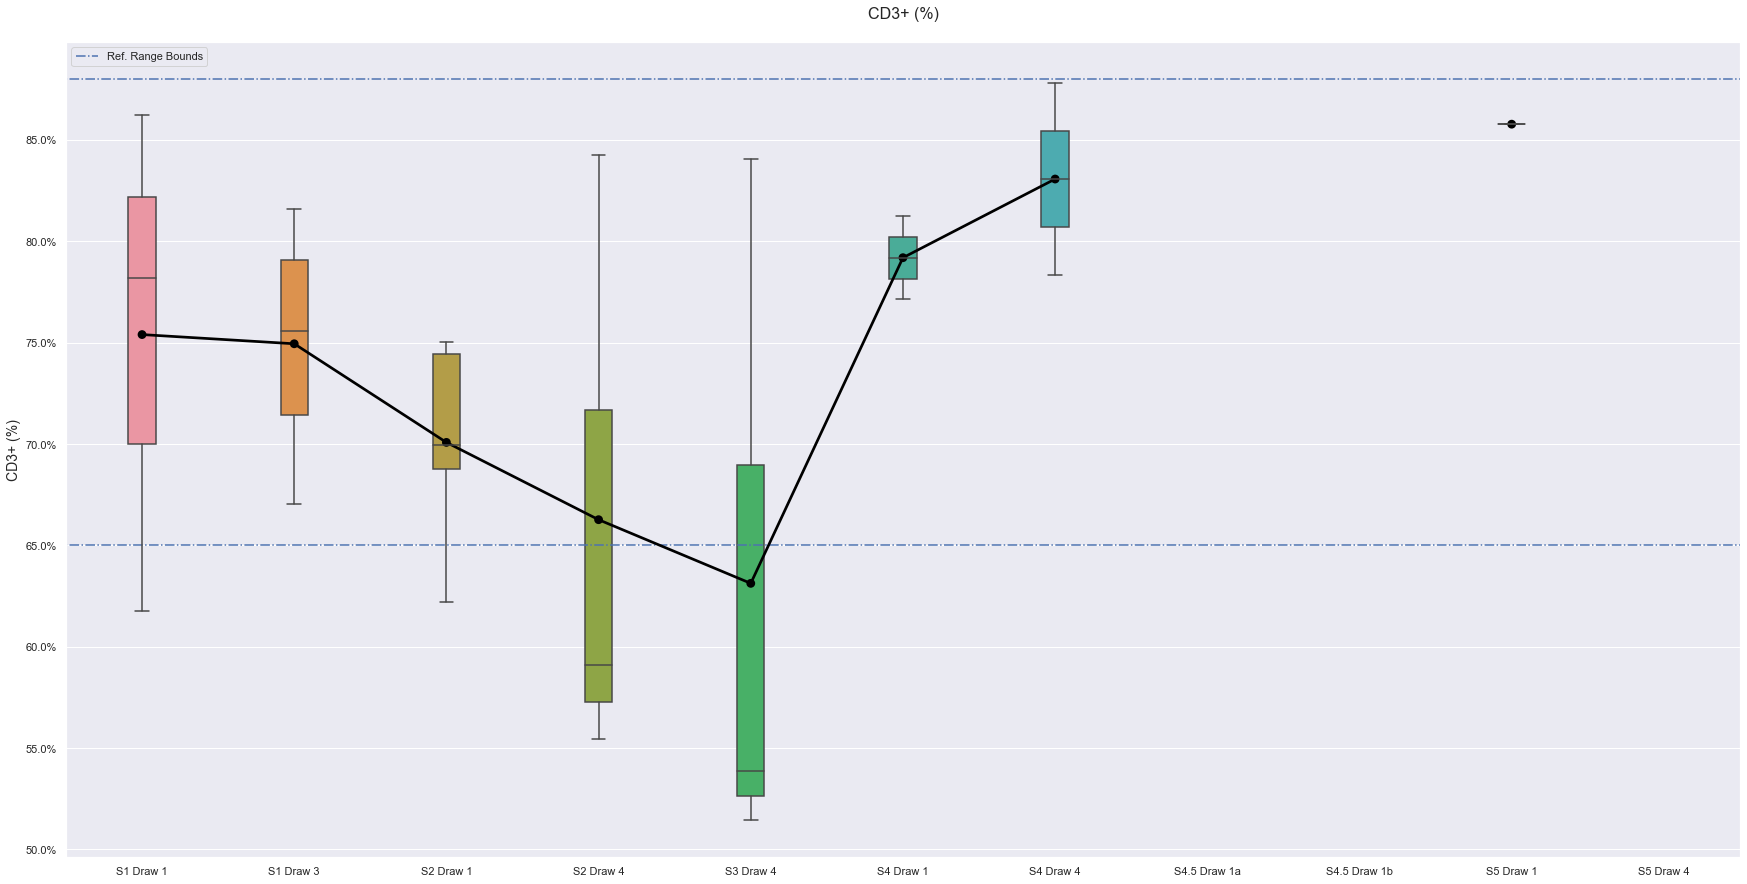

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\utils.py:178: FutureWarning: This function is deprecated and will be removed in a future version
  warnings.warn(msg, FutureWarning)


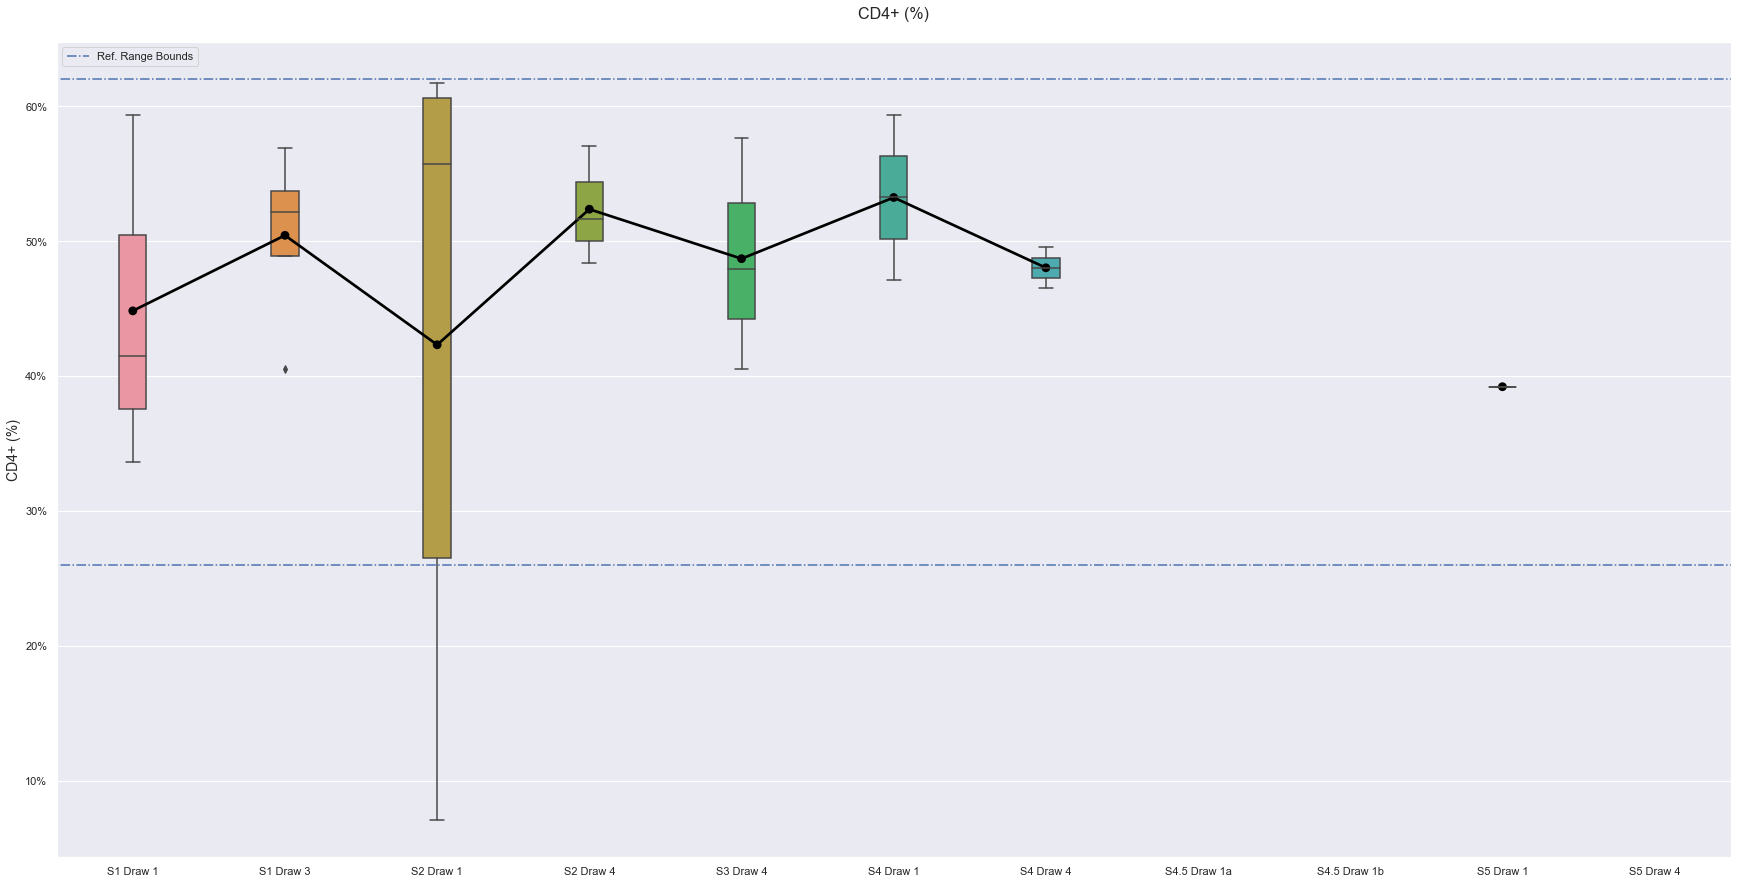

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\utils.py:178: FutureWarning: This function is deprecated and will be removed in a future version
  warnings.warn(msg, FutureWarning)


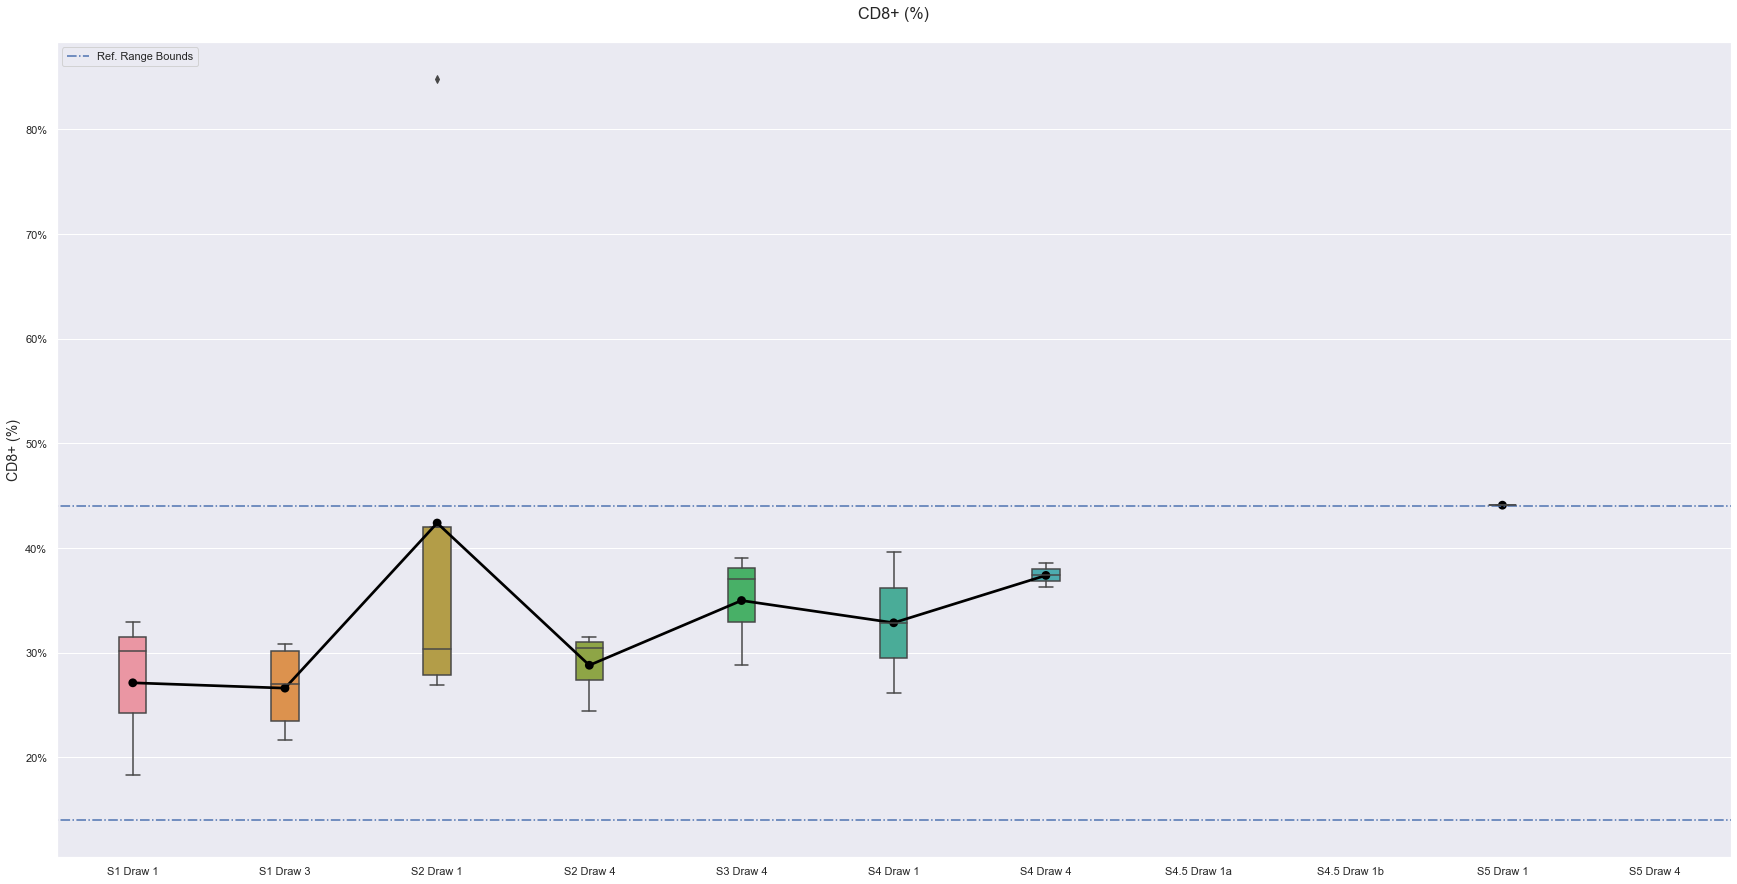

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\utils.py:178: FutureWarning: This function is deprecated and will be removed in a future version
  warnings.warn(msg, FutureWarning)


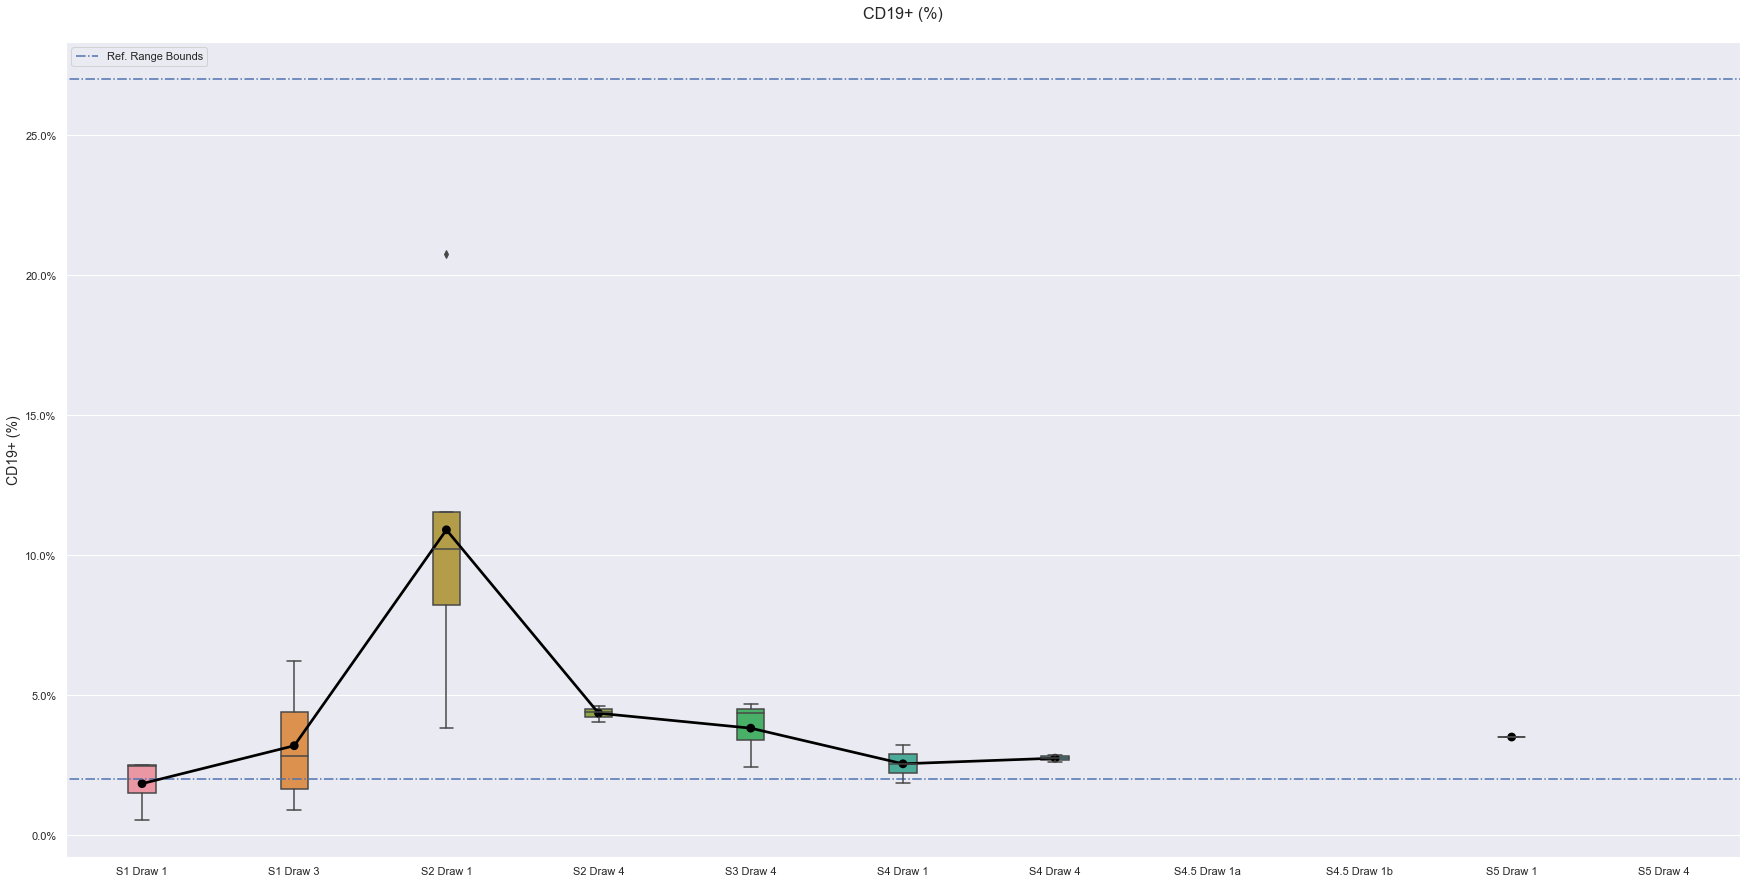

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\utils.py:178: FutureWarning: This function is deprecated and will be removed in a future version
  warnings.warn(msg, FutureWarning)
No handles with labels found to put in legend.


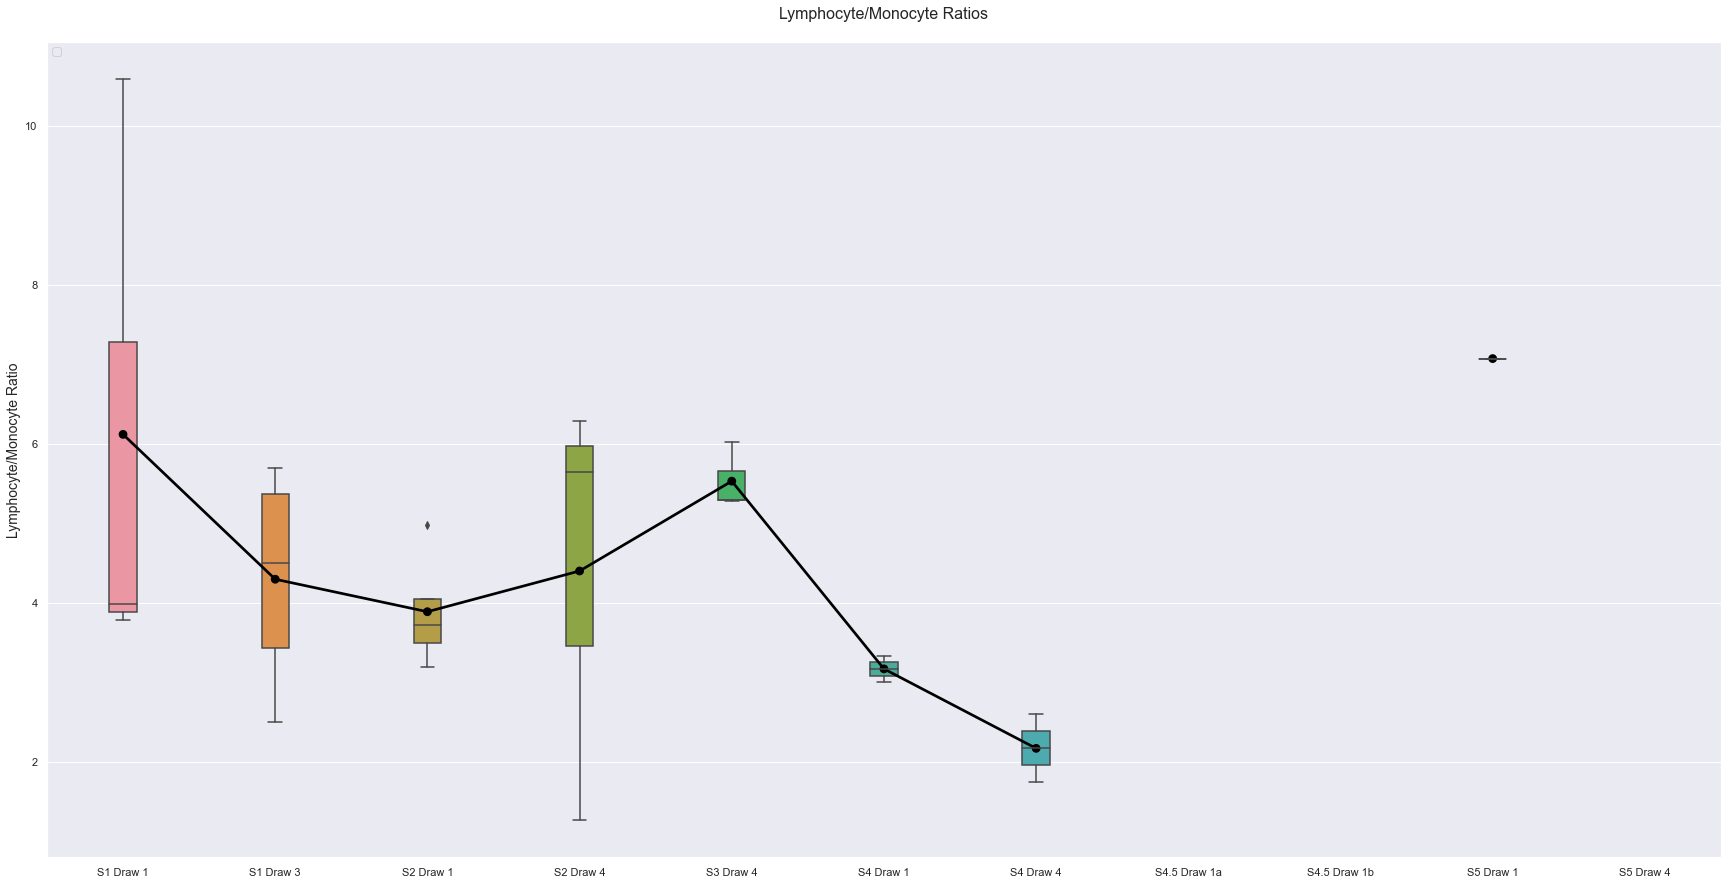

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\utils.py:178: FutureWarning: This function is deprecated and will be removed in a future version
  warnings.warn(msg, FutureWarning)


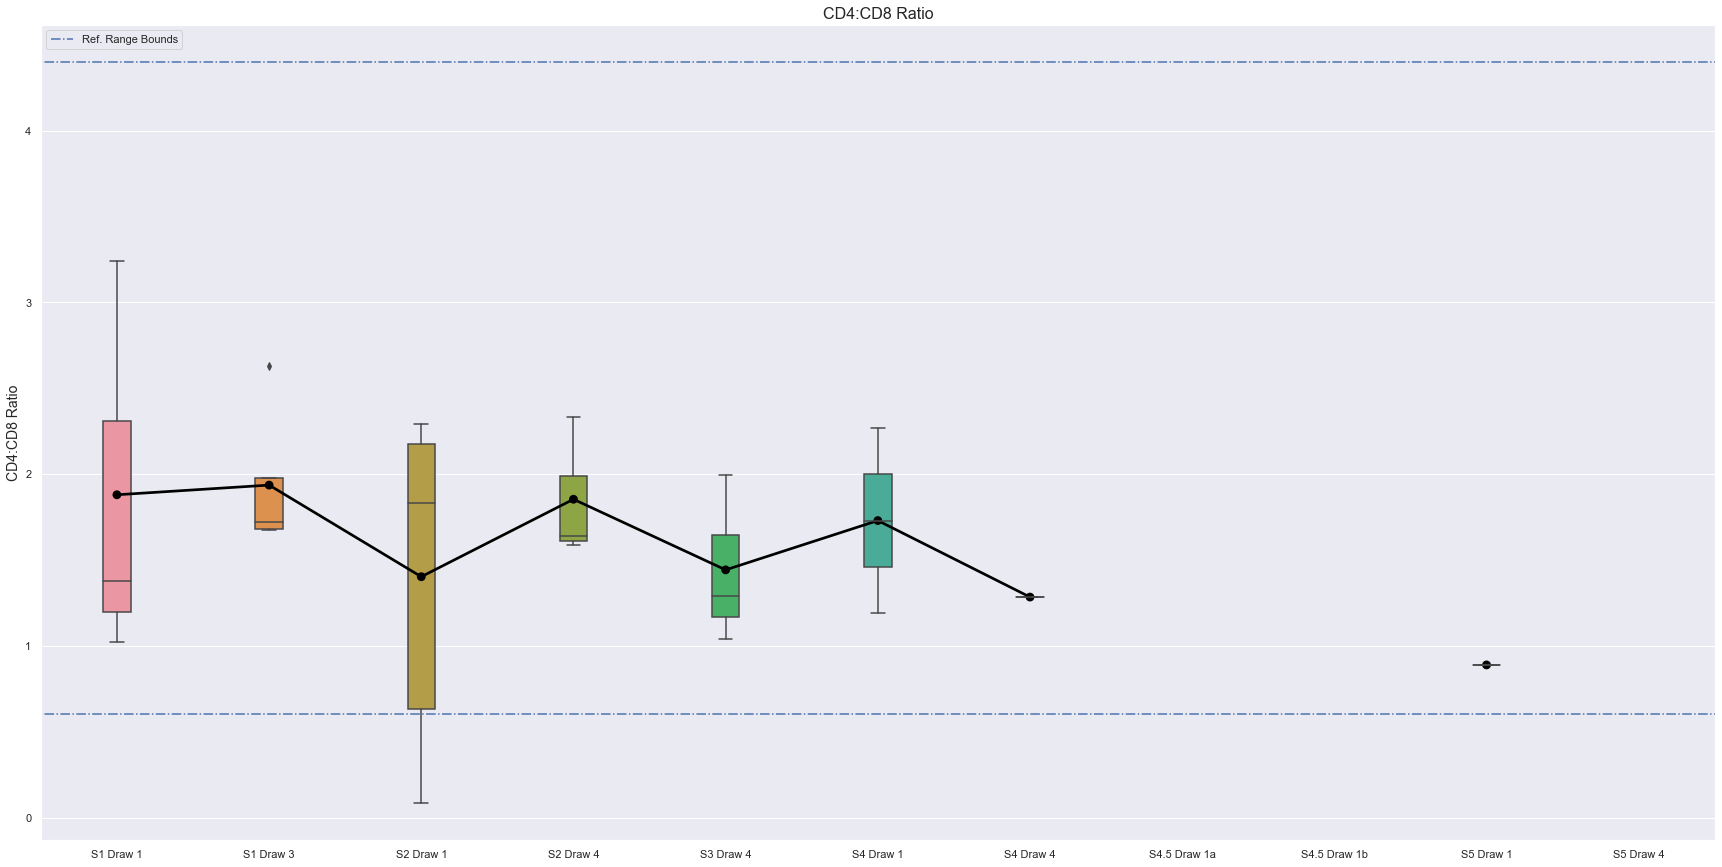

In [143]:
#This time, try only Superior.
for i in desired_feat:
    plot_data= {
        'S1 Draw 1': wd[wd_list[0]][wd[wd_list[0]]['VO2 Rank (Bin)'] == 'Superior'][i],
        'S1 Draw 3': wd[wd_list[1]][wd[wd_list[1]]['VO2 Rank (Bin)'] == 'Superior'][i],
        'S2 Draw 1': wd[wd_list[2]][wd[wd_list[2]]['VO2 Rank (Bin)'] == 'Superior'][i],
        'S2 Draw 4': wd[wd_list[3]][wd[wd_list[3]]['VO2 Rank (Bin)'] == 'Superior'][i],
        'S3 Draw 4': wd[wd_list[4]][wd[wd_list[4]]['VO2 Rank (Bin)'] == 'Superior'][i],
        'S4 Draw 1': wd[wd_list[5]][wd[wd_list[5]]['VO2 Rank (Bin)'] == 'Superior'][i],
        'S4 Draw 4': wd[wd_list[6]][wd[wd_list[6]]['VO2 Rank (Bin)'] == 'Superior'][i],
        'S4.5 Draw 1a': wd[wd_list[7]][wd[wd_list[7]]['VO2 Rank (Bin)'] == 'Superior'][i],
        'S4.5 Draw 1b': wd[wd_list[8]][wd[wd_list[8]]['VO2 Rank (Bin)'] == 'Superior'][i],
        'S5 Draw 1': wd[wd_list[9]][wd[wd_list[9]]['VO2 Rank (Bin)'] == 'Superior'][i],
        'S5 Draw 4': wd[wd_list[10]][wd[wd_list[10]]['VO2 Rank (Bin)'] == 'Superior'][i]
    }
    sorted_keys, sorted_vals = zip(*sorted(plot_data.items(), key=op.itemgetter(0)))

    #Get data in a proper format.
    fixed_data = list(plot_data)
    fig, ax = plt.subplots(figsize=dims)

    #Set up the graph parameters.
    sns.set(context='notebook', style='darkgrid')

    b = sns.boxplot(data=sorted_vals, width=.18)
    
    if i != 'lymphocyte/monocyte ratio':
        sns.utils.axlabel(xlabel='', ylabel=i[1:] + ' (%)', fontsize=axes_label_size)
        b.set_title(i[1:] + ' (%)\n', fontsize=title_size)
        
        #Reference ranges found in the Florida paper.
        ax.hlines(ref.loc[ref_idx[i],['Ref. Min']]/100, xmin = -1, xmax = 12, ls='-.', label = 'Ref. Range Lower Bound')
        ax.hlines(ref.loc[ref_idx[i],['Ref. Max']]/100, xmin = -1, xmax = 12, ls='-.', label = 'Ref. Range Upper Bound')
    else:
        sns.utils.axlabel(xlabel='', ylabel='Lymphocyte/Monocyte Ratio', fontsize=axes_label_size)
        b.set_title('Lymphocyte/Monocyte Ratios\n', fontsize=title_size)
    
    ax = sns.pointplot(data=sorted_vals, ci=None, color='black')
    #sns.swarmplot(data=sorted_vals, size=6, edgecolor="black", linewidth=.9)
    
    if i != 'lymphocyte/monocyte ratio':
        b.axes.yaxis.set_major_formatter(PercentFormatter(1))
        
    #Category labels added here
    plt.xticks(plt.xticks()[0], sorted_keys)
    handles, _ = ax.get_legend_handles_labels()
    ax.legend(loc='upper left', handles=handles, labels=["Ref. Range Bounds"])
    plt.show()
    
#A separate run needed for CD4:CD8 Ratio.
plot_data= {
    'S1 Draw 1': wd[wd_list[0]][wd[wd_list[0]]['VO2 Rank (Bin)'] == 'Superior'][desired_feat[1]]/wd[wd_list[0]][wd[wd_list[0]]['VO2 Rank (Bin)'] == 'Superior'][desired_feat[2]],
    'S1 Draw 3': wd[wd_list[1]][wd[wd_list[1]]['VO2 Rank (Bin)'] == 'Superior'][desired_feat[1]]/wd[wd_list[1]][wd[wd_list[1]]['VO2 Rank (Bin)'] == 'Superior'][desired_feat[2]],
    'S2 Draw 1': wd[wd_list[2]][wd[wd_list[2]]['VO2 Rank (Bin)'] == 'Superior'][desired_feat[1]]/wd[wd_list[2]][wd[wd_list[2]]['VO2 Rank (Bin)'] == 'Superior'][desired_feat[2]],
    'S2 Draw 4': wd[wd_list[3]][wd[wd_list[3]]['VO2 Rank (Bin)'] == 'Superior'][desired_feat[1]]/wd[wd_list[3]][wd[wd_list[3]]['VO2 Rank (Bin)'] == 'Superior'][desired_feat[2]],
    'S3 Draw 4': wd[wd_list[4]][wd[wd_list[4]]['VO2 Rank (Bin)'] == 'Superior'][desired_feat[1]]/wd[wd_list[4]][wd[wd_list[4]]['VO2 Rank (Bin)'] == 'Superior'][desired_feat[2]],
    'S4 Draw 1': wd[wd_list[5]][wd[wd_list[5]]['VO2 Rank (Bin)'] == 'Superior'][desired_feat[1]]/wd[wd_list[5]][wd[wd_list[5]]['VO2 Rank (Bin)'] == 'Superior'][desired_feat[2]],
    'S4 Draw 4': wd[wd_list[6]][wd[wd_list[6]]['VO2 Rank (Bin)'] == 'Superior'][desired_feat[1]]/wd[wd_list[6]][wd[wd_list[6]]['VO2 Rank (Bin)'] == 'Superior'][desired_feat[2]],
    'S4.5 Draw 1a': wd[wd_list[7]][wd[wd_list[7]]['VO2 Rank (Bin)'] == 'Superior'][desired_feat[1]]/wd[wd_list[7]][wd[wd_list[7]]['VO2 Rank (Bin)'] == 'Superior'][desired_feat[2]],
    'S4.5 Draw 1b': wd[wd_list[8]][wd[wd_list[8]]['VO2 Rank (Bin)'] == 'Superior'][desired_feat[1]]/wd[wd_list[8]][wd[wd_list[8]]['VO2 Rank (Bin)'] == 'Superior'][desired_feat[2]],
    'S5 Draw 1': wd[wd_list[9]][wd[wd_list[9]]['VO2 Rank (Bin)'] == 'Superior'][desired_feat[1]]/wd[wd_list[9]][wd[wd_list[9]]['VO2 Rank (Bin)'] == 'Superior'][desired_feat[2]],
    'S5 Draw 4': wd[wd_list[10]][wd[wd_list[10]]['VO2 Rank (Bin)'] == 'Superior'][desired_feat[1]]/wd[wd_list[10]][wd[wd_list[10]]['VO2 Rank (Bin)'] == 'Superior'][desired_feat[2]]
}
sorted_keys, sorted_vals = zip(*sorted(plot_data.items(), key=op.itemgetter(0)))

#Get data in a proper format.
fixed_data = list(plot_data)
fig, ax = plt.subplots(figsize=dims)

#Set up the graph parameters.
sns.set(context='notebook', style='darkgrid')

b = sns.boxplot(data=sorted_vals, width=.18)

sns.utils.axlabel(xlabel='', ylabel='CD4:CD8 Ratio', fontsize=axes_label_size)
b.set_title('CD4:CD8 Ratio', fontsize=title_size)

#Reference ranges found in the Florida paper.
ax.hlines(ref.loc[cd4_cd8_ratio_idx,['Ref. Min']], xmin = -1, xmax = 12, ls='-.', label = 'Ref. Range Lower Bound')
ax.hlines(ref.loc[cd4_cd8_ratio_idx,['Ref. Max']], xmin = -1, xmax = 12, ls='-.', label = 'Ref. Range Upper Bound')

ax = sns.pointplot(data=sorted_vals, ci=None, color='black')
#sns.swarmplot(data=sorted_vals, size=6, edgecolor="black", linewidth=.9)

if i != 'lymphocyte/monocyte ratio':
    b.axes.yaxis.set_major_formatter(PercentFormatter(1))

#Category labels added here
plt.xticks(plt.xticks()[0], sorted_keys)
handles, _ = ax.get_legend_handles_labels()
ax.legend(loc='upper left', handles=handles, labels=["Ref. Range Bounds"])
plt.show()

In [10]:
#Two sample t-test for the entire samples
for i in desired_feat:
    print('Two-sample t-test for ' + i + ' in the subject sample.')
    print('S1 Draw 1 vs. S1 Draw 3: ', ttest_ind(wd[wd_list[0]][i], wd[wd_list[1]][i], equal_var=1, alternative='two-sided'))
    print('S2 Draw 1 vs. S2 Draw 4: ', ttest_ind(wd[wd_list[2]][i], wd[wd_list[3]][i], equal_var=1, alternative='two-sided')) 
    print('S2 Draw 1 vs. S3 Draw 4: ', ttest_ind(wd[wd_list[2]][i], wd[wd_list[4]][i], equal_var=1, alternative='two-sided'))     
    print('S4 Draw 1 vs. S4 Draw 4: ', ttest_ind(wd[wd_list[5]][i], wd[wd_list[6]][i], equal_var=1, alternative='two-sided'))     
    print('S5 Draw 1 vs. S5 Draw 4: ', ttest_ind(wd[wd_list[9]][i], wd[wd_list[10]][i], equal_var=1, alternative='two-sided')) 
    print('\n')

Two-sample t-test for %CD3+ in the subject sample.
S1 Draw 1 vs. S1 Draw 3:  Ttest_indResult(statistic=0.7579248927674563, pvalue=0.4499111768309809)
S2 Draw 1 vs. S2 Draw 4:  Ttest_indResult(statistic=-0.18259102853020143, pvalue=0.8555486671080587)
S2 Draw 1 vs. S3 Draw 4:  Ttest_indResult(statistic=0.27783010626600646, pvalue=0.7816642962262975)
S4 Draw 1 vs. S4 Draw 4:  Ttest_indResult(statistic=-1.893977589391657, pvalue=0.06339738254145098)
S5 Draw 1 vs. S5 Draw 4:  Ttest_indResult(statistic=0.1919311510589228, pvalue=0.8485296103901903)


Two-sample t-test for %CD4+ in the subject sample.
S1 Draw 1 vs. S1 Draw 3:  Ttest_indResult(statistic=-0.11808150493941648, pvalue=0.906191112487373)
S2 Draw 1 vs. S2 Draw 4:  Ttest_indResult(statistic=-0.2948691045455837, pvalue=0.7688045233208871)
S2 Draw 1 vs. S3 Draw 4:  Ttest_indResult(statistic=-0.8715130609162322, pvalue=0.38537224626783073)
S4 Draw 1 vs. S4 Draw 4:  Ttest_indResult(statistic=-1.2349052591542538, pvalue=0.22202217500854

In [12]:
#Two sample t-test for just males
for i in desired_feat:
    print('Two-sample t-test for ' + i + ' in the male subjects sample.')
    print('S1 Draw 1 vs. S1 Draw 3: ', ttest_ind(wd[wd_list[0]][wd[wd_list[0]]['Gender'] == 'M'][i], 
                                                 wd[wd_list[1]][wd[wd_list[1]]['Gender'] == 'M'][i], equal_var=1, alternative='two-sided'))
    print('S2 Draw 1 vs. S2 Draw 4: ', ttest_ind(wd[wd_list[2]][wd[wd_list[2]]['Gender'] == 'M'][i], 
                                                 wd[wd_list[3]][wd[wd_list[3]]['Gender'] == 'M'][i], equal_var=1, alternative='two-sided')) 
    print('S2 Draw 1 vs. S3 Draw 4: ', ttest_ind(wd[wd_list[2]][wd[wd_list[2]]['Gender'] == 'M'][i], 
                                                 wd[wd_list[4]][wd[wd_list[4]]['Gender'] == 'M'][i], equal_var=1, alternative='two-sided'))     
    print('S4 Draw 1 vs. S4 Draw 4: ', ttest_ind(wd[wd_list[5]][wd[wd_list[5]]['Gender'] == 'M'][i], 
                                                 wd[wd_list[6]][wd[wd_list[6]]['Gender'] == 'M'][i], equal_var=1, alternative='two-sided'))     
    print('S5 Draw 1 vs. S5 Draw 4: ', ttest_ind(wd[wd_list[9]][wd[wd_list[9]]['Gender'] == 'M'][i], 
                                                 wd[wd_list[10]][wd[wd_list[10]]['Gender'] == 'M'][i], equal_var=1, alternative='two-sided')) 
    print('\n')

Two-sample t-test for %CD3+ in the male subjects sample.
S1 Draw 1 vs. S1 Draw 3:  Ttest_indResult(statistic=0.8065742282817386, pvalue=0.42184521816017406)
S2 Draw 1 vs. S2 Draw 4:  Ttest_indResult(statistic=-0.2953746298205381, pvalue=0.768594727721707)
S2 Draw 1 vs. S3 Draw 4:  Ttest_indResult(statistic=0.7154501155357101, pvalue=0.4762249667902668)
S4 Draw 1 vs. S4 Draw 4:  Ttest_indResult(statistic=-2.5216652541031617, pvalue=0.015465739997180178)
S5 Draw 1 vs. S5 Draw 4:  Ttest_indResult(statistic=-0.3244442558033311, pvalue=0.7470725333610073)


Two-sample t-test for %CD4+ in the male subjects sample.
S1 Draw 1 vs. S1 Draw 3:  Ttest_indResult(statistic=-0.42093308762749904, pvalue=0.6747163447544441)
S2 Draw 1 vs. S2 Draw 4:  Ttest_indResult(statistic=-0.5539390722575057, pvalue=0.5814113558862986)
S2 Draw 1 vs. S3 Draw 4:  Ttest_indResult(statistic=-1.1252143288996206, pvalue=0.2635578288864526)
S4 Draw 1 vs. S4 Draw 4:  Ttest_indResult(statistic=-0.8905516208608024, pvalue=0.3

In [13]:
#Female subjects
for i in desired_feat:
    print('Two-sample t-test for ' + i + ' in the female subjects sample.')
    print('S1 Draw 1 vs. S1 Draw 3: ', ttest_ind(wd[wd_list[0]][wd[wd_list[0]]['Gender'] == 'F'][i], 
                                                 wd[wd_list[1]][wd[wd_list[1]]['Gender'] == 'F'][i], equal_var=1, alternative='two-sided'))
    print('S2 Draw 1 vs. S2 Draw 4: ', ttest_ind(wd[wd_list[2]][wd[wd_list[2]]['Gender'] == 'F'][i], 
                                                 wd[wd_list[3]][wd[wd_list[3]]['Gender'] == 'F'][i], equal_var=1, alternative='two-sided')) 
    print('S2 Draw 1 vs. S3 Draw 4: ', ttest_ind(wd[wd_list[2]][wd[wd_list[2]]['Gender'] == 'F'][i], 
                                                 wd[wd_list[4]][wd[wd_list[4]]['Gender'] == 'F'][i], equal_var=1, alternative='two-sided'))     
    print('S4 Draw 1 vs. S4 Draw 4: ', ttest_ind(wd[wd_list[5]][wd[wd_list[5]]['Gender'] == 'F'][i], 
                                                 wd[wd_list[6]][wd[wd_list[6]]['Gender'] == 'F'][i], equal_var=1, alternative='two-sided'))     
    print('S5 Draw 1 vs. S5 Draw 4: ', ttest_ind(wd[wd_list[9]][wd[wd_list[9]]['Gender'] == 'F'][i], 
                                                 wd[wd_list[10]][wd[wd_list[10]]['Gender'] == 'F'][i], equal_var=1, alternative='two-sided')) 
    print('\n')

Two-sample t-test for %CD3+ in the female subjects sample.
S1 Draw 1 vs. S1 Draw 3:  Ttest_indResult(statistic=0.34158703230823534, pvalue=0.7355163135276004)
S2 Draw 1 vs. S2 Draw 4:  Ttest_indResult(statistic=0.05859054039425701, pvalue=0.9541063372733027)
S2 Draw 1 vs. S3 Draw 4:  Ttest_indResult(statistic=-0.7090888655033623, pvalue=0.48735295148407143)
S4 Draw 1 vs. S4 Draw 4:  Ttest_indResult(statistic=0.44651256191347527, pvalue=0.665777176665268)
S5 Draw 1 vs. S5 Draw 4:  Ttest_indResult(statistic=1.3707698375778337, pvalue=0.22877794978886382)


Two-sample t-test for %CD4+ in the female subjects sample.
S1 Draw 1 vs. S1 Draw 3:  Ttest_indResult(statistic=0.49572399375148035, pvalue=0.6244190102342069)
S2 Draw 1 vs. S2 Draw 4:  Ttest_indResult(statistic=0.7015854366976214, pvalue=0.4944361951165561)
S2 Draw 1 vs. S3 Draw 4:  Ttest_indResult(statistic=0.027983749634030185, pvalue=0.9779830394213309)
S4 Draw 1 vs. S4 Draw 4:  Ttest_indResult(statistic=-1.54827616334928, pvalue=0.

In [14]:
#Those with poor VO2Max rank
for i in desired_feat:
    print('Two-sample t-test for ' + i + ' in the \'Very Poor\' subject sample.')
    print('S1 Draw 1 vs. S1 Draw 3: ', ttest_ind(wd[wd_list[0]][wd[wd_list[0]]['VO2 Rank (Bin)'] == 'Very Poor'][i], 
                                                 wd[wd_list[1]][wd[wd_list[1]]['VO2 Rank (Bin)'] == 'Very Poor'][i], equal_var=1, alternative='two-sided'))
    print('S2 Draw 1 vs. S2 Draw 4: ', ttest_ind(wd[wd_list[2]][wd[wd_list[2]]['VO2 Rank (Bin)'] == 'Very Poor'][i], 
                                                 wd[wd_list[3]][wd[wd_list[3]]['VO2 Rank (Bin)'] == 'Very Poor'][i], equal_var=1, alternative='two-sided')) 
    print('S2 Draw 1 vs. S3 Draw 4: ', ttest_ind(wd[wd_list[2]][wd[wd_list[2]]['VO2 Rank (Bin)'] == 'Very Poor'][i], 
                                                 wd[wd_list[4]][wd[wd_list[4]]['VO2 Rank (Bin)'] == 'Very Poor'][i], equal_var=1, alternative='two-sided'))     
    print('S4 Draw 1 vs. S4 Draw 4: ', ttest_ind(wd[wd_list[5]][wd[wd_list[5]]['VO2 Rank (Bin)'] == 'Very Poor'][i], 
                                                 wd[wd_list[6]][wd[wd_list[6]]['VO2 Rank (Bin)'] == 'Very Poor'][i], equal_var=1, alternative='two-sided'))     
    print('S5 Draw 1 vs. S5 Draw 4: ', ttest_ind(wd[wd_list[9]][wd[wd_list[9]]['VO2 Rank (Bin)'] == 'Very Poor'][i], 
                                                 wd[wd_list[10]][wd[wd_list[10]]['VO2 Rank (Bin)'] == 'Very Poor'][i], equal_var=1, alternative='two-sided')) 
    print('\n')

Two-sample t-test for %CD3+ in the 'Very Poor' subject sample.
S1 Draw 1 vs. S1 Draw 3:  Ttest_indResult(statistic=0.058021418360586656, pvalue=0.9548746091287719)
S2 Draw 1 vs. S2 Draw 4:  Ttest_indResult(statistic=-0.4059018700845719, pvalue=0.6969356082991779)
S2 Draw 1 vs. S3 Draw 4:  Ttest_indResult(statistic=2.727178647696264, pvalue=0.02595882919798414)
S4 Draw 1 vs. S4 Draw 4:  Ttest_indResult(statistic=nan, pvalue=nan)
S5 Draw 1 vs. S5 Draw 4:  Ttest_indResult(statistic=-0.3211610076145683, pvalue=0.7610786716461271)


Two-sample t-test for %CD4+ in the 'Very Poor' subject sample.
S1 Draw 1 vs. S1 Draw 3:  Ttest_indResult(statistic=-0.41616121361398234, pvalue=0.6860826879687989)
S2 Draw 1 vs. S2 Draw 4:  Ttest_indResult(statistic=0.021200659241751466, pvalue=0.9836772523033528)
S2 Draw 1 vs. S3 Draw 4:  Ttest_indResult(statistic=-0.41712643605116445, pvalue=0.6875545071964599)
S4 Draw 1 vs. S4 Draw 4:  Ttest_indResult(statistic=nan, pvalue=nan)
S5 Draw 1 vs. S5 Draw 4:  Ttest

/Users/Derek/opt/anaconda3/lib/python3.8/site-packages/numpy/core/fromnumeric.py:3702: RuntimeWarning: Degrees of freedom <= 0 for slice
  return _methods._var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/Users/Derek/opt/anaconda3/lib/python3.8/site-packages/numpy/core/_methods.py:253: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


In [15]:
#Those with poor VO2Max rank
for i in desired_feat:
    print('Two-sample t-test for ' + i + ' in the \'Poor\' subject sample.')
    print('S1 Draw 1 vs. S1 Draw 3: ', ttest_ind(wd[wd_list[0]][wd[wd_list[0]]['VO2 Rank (Bin)'] == 'Poor'][i], 
                                                 wd[wd_list[1]][wd[wd_list[1]]['VO2 Rank (Bin)'] == 'Poor'][i], equal_var=1, alternative='two-sided'))
    print('S2 Draw 1 vs. S2 Draw 4: ', ttest_ind(wd[wd_list[2]][wd[wd_list[2]]['VO2 Rank (Bin)'] == 'Poor'][i], 
                                                 wd[wd_list[3]][wd[wd_list[3]]['VO2 Rank (Bin)'] == 'Poor'][i], equal_var=1, alternative='two-sided')) 
    print('S2 Draw 1 vs. S3 Draw 4: ', ttest_ind(wd[wd_list[2]][wd[wd_list[2]]['VO2 Rank (Bin)'] == 'Poor'][i], 
                                                 wd[wd_list[4]][wd[wd_list[4]]['VO2 Rank (Bin)'] == 'Poor'][i], equal_var=1, alternative='two-sided'))     
    print('S4 Draw 1 vs. S4 Draw 4: ', ttest_ind(wd[wd_list[5]][wd[wd_list[5]]['VO2 Rank (Bin)'] == 'Poor'][i], 
                                                 wd[wd_list[6]][wd[wd_list[6]]['VO2 Rank (Bin)'] == 'Poor'][i], equal_var=1, alternative='two-sided'))     
    print('S5 Draw 1 vs. S5 Draw 4: ', ttest_ind(wd[wd_list[9]][wd[wd_list[9]]['VO2 Rank (Bin)'] == 'Poor'][i], 
                                                 wd[wd_list[10]][wd[wd_list[10]]['VO2 Rank (Bin)'] == 'Poor'][i], equal_var=1, alternative='two-sided')) 
    print('\n')

Two-sample t-test for %CD3+ in the 'Poor' subject sample.
S1 Draw 1 vs. S1 Draw 3:  Ttest_indResult(statistic=1.5574974686485636, pvalue=0.13192269830075967)
S2 Draw 1 vs. S2 Draw 4:  Ttest_indResult(statistic=-2.2836222349092155, pvalue=0.04550459433717648)
S2 Draw 1 vs. S3 Draw 4:  Ttest_indResult(statistic=-0.8349447863894507, pvalue=0.4153290051458378)
S4 Draw 1 vs. S4 Draw 4:  Ttest_indResult(statistic=-0.337676381479787, pvalue=0.7455071990289859)
S5 Draw 1 vs. S5 Draw 4:  Ttest_indResult(statistic=-0.6344610626313228, pvalue=0.5400224601727779)


Two-sample t-test for %CD4+ in the 'Poor' subject sample.
S1 Draw 1 vs. S1 Draw 3:  Ttest_indResult(statistic=-1.4741964777986458, pvalue=0.15291079097668753)
S2 Draw 1 vs. S2 Draw 4:  Ttest_indResult(statistic=0.41944884827388124, pvalue=0.6837564843843671)
S2 Draw 1 vs. S3 Draw 4:  Ttest_indResult(statistic=-0.8074288343057767, pvalue=0.43057262149385944)
S4 Draw 1 vs. S4 Draw 4:  Ttest_indResult(statistic=-0.8514245512304143, pvalue=

In [16]:
#Those with fair VO2Max
for i in desired_feat:
    print('Two-sample t-test for ' + i + ' in the \'Fair\' subject sample.')
    print('S1 Draw 1 vs. S1 Draw 3: ', ttest_ind(wd[wd_list[0]][wd[wd_list[0]]['VO2 Rank (Bin)'] == 'Fair'][i], 
                                                 wd[wd_list[1]][wd[wd_list[1]]['VO2 Rank (Bin)'] == 'Fair'][i], equal_var=1, alternative='two-sided'))
    print('S2 Draw 1 vs. S2 Draw 4: ', ttest_ind(wd[wd_list[2]][wd[wd_list[2]]['VO2 Rank (Bin)'] == 'Fair'][i], 
                                                 wd[wd_list[3]][wd[wd_list[3]]['VO2 Rank (Bin)'] == 'Fair'][i], equal_var=1, alternative='two-sided')) 
    print('S2 Draw 1 vs. S3 Draw 4: ', ttest_ind(wd[wd_list[2]][wd[wd_list[2]]['VO2 Rank (Bin)'] == 'Fair'][i], 
                                                 wd[wd_list[4]][wd[wd_list[4]]['VO2 Rank (Bin)'] == 'Fair'][i], equal_var=1, alternative='two-sided'))     
    print('S4 Draw 1 vs. S4 Draw 4: ', ttest_ind(wd[wd_list[5]][wd[wd_list[5]]['VO2 Rank (Bin)'] == 'Fair'][i], 
                                                 wd[wd_list[6]][wd[wd_list[6]]['VO2 Rank (Bin)'] == 'Fair'][i], equal_var=1, alternative='two-sided'))     
    print('S5 Draw 1 vs. S5 Draw 4: ', ttest_ind(wd[wd_list[9]][wd[wd_list[9]]['VO2 Rank (Bin)'] == 'Fair'][i], 
                                                 wd[wd_list[10]][wd[wd_list[10]]['VO2 Rank (Bin)'] == 'Fair'][i], equal_var=1, alternative='two-sided')) 
    print('\n')

Two-sample t-test for %CD3+ in the 'Fair' subject sample.
S1 Draw 1 vs. S1 Draw 3:  Ttest_indResult(statistic=-0.12232218639459894, pvalue=0.9038646468185554)
S2 Draw 1 vs. S2 Draw 4:  Ttest_indResult(statistic=1.1880182366897525, pvalue=0.25780831655565256)
S2 Draw 1 vs. S3 Draw 4:  Ttest_indResult(statistic=0.9787974941701897, pvalue=0.3432035347211818)
S4 Draw 1 vs. S4 Draw 4:  Ttest_indResult(statistic=-1.1013370743857198, pvalue=0.29933090386900046)
S5 Draw 1 vs. S5 Draw 4:  Ttest_indResult(statistic=0.14520825721979627, pvalue=0.8881382903675918)


Two-sample t-test for %CD4+ in the 'Fair' subject sample.
S1 Draw 1 vs. S1 Draw 3:  Ttest_indResult(statistic=0.9409644571687553, pvalue=0.35795046876682846)
S2 Draw 1 vs. S2 Draw 4:  Ttest_indResult(statistic=-0.7345497628967088, pvalue=0.4767231412147881)
S2 Draw 1 vs. S3 Draw 4:  Ttest_indResult(statistic=-0.5244333942254591, pvalue=0.6076408063355188)
S4 Draw 1 vs. S4 Draw 4:  Ttest_indResult(statistic=-0.7554279421910742, pvalue=0

In [17]:
for i in desired_feat:
    print('Two-sample t-test for ' + i + ' in the \'Good\' subject sample.')
    print('S1 Draw 1 vs. S1 Draw 3: ', ttest_ind(wd[wd_list[0]][wd[wd_list[0]]['VO2 Rank (Bin)'] == 'Good'][i], 
                                                 wd[wd_list[1]][wd[wd_list[1]]['VO2 Rank (Bin)'] == 'Good'][i], equal_var=1, alternative='two-sided'))
    print('S2 Draw 1 vs. S2 Draw 4: ', ttest_ind(wd[wd_list[2]][wd[wd_list[2]]['VO2 Rank (Bin)'] == 'Good'][i], 
                                                 wd[wd_list[3]][wd[wd_list[3]]['VO2 Rank (Bin)'] == 'Good'][i], equal_var=1, alternative='two-sided')) 
    print('S2 Draw 1 vs. S3 Draw 4: ', ttest_ind(wd[wd_list[2]][wd[wd_list[2]]['VO2 Rank (Bin)'] == 'Good'][i], 
                                                 wd[wd_list[4]][wd[wd_list[4]]['VO2 Rank (Bin)'] == 'Good'][i], equal_var=1, alternative='two-sided'))     
    print('S4 Draw 1 vs. S4 Draw 4: ', ttest_ind(wd[wd_list[5]][wd[wd_list[5]]['VO2 Rank (Bin)'] == 'Good'][i], 
                                                 wd[wd_list[6]][wd[wd_list[6]]['VO2 Rank (Bin)'] == 'Good'][i], equal_var=1, alternative='two-sided'))     
    print('S5 Draw 1 vs. S5 Draw 4: ', ttest_ind(wd[wd_list[9]][wd[wd_list[9]]['VO2 Rank (Bin)'] == 'Good'][i], 
                                                 wd[wd_list[10]][wd[wd_list[10]]['VO2 Rank (Bin)'] == 'Good'][i], equal_var=1, alternative='two-sided')) 
    print('\n')

Two-sample t-test for %CD3+ in the 'Good' subject sample.
S1 Draw 1 vs. S1 Draw 3:  Ttest_indResult(statistic=0.19176804031552908, pvalue=0.8492603581266325)
S2 Draw 1 vs. S2 Draw 4:  Ttest_indResult(statistic=-1.1905624568671145, pvalue=0.2454685018997851)
S2 Draw 1 vs. S3 Draw 4:  Ttest_indResult(statistic=-0.19410833619282375, pvalue=0.8473994774901638)
S4 Draw 1 vs. S4 Draw 4:  Ttest_indResult(statistic=-0.2937482633751606, pvalue=0.7727265077797429)
S5 Draw 1 vs. S5 Draw 4:  Ttest_indResult(statistic=-0.8618671129657406, pvalue=0.41384716468710603)


Two-sample t-test for %CD4+ in the 'Good' subject sample.
S1 Draw 1 vs. S1 Draw 3:  Ttest_indResult(statistic=0.3732444123728472, pvalue=0.7116810799113564)
S2 Draw 1 vs. S2 Draw 4:  Ttest_indResult(statistic=0.24435082819039416, pvalue=0.809036047922494)
S2 Draw 1 vs. S3 Draw 4:  Ttest_indResult(statistic=-0.06623596702131736, pvalue=0.9476294103990728)
S4 Draw 1 vs. S4 Draw 4:  Ttest_indResult(statistic=-1.594228733913271, pvalue=0.

In [18]:
for i in desired_feat:
    print('Two-sample t-test for ' + i + ' in the \'Excellent\' subject sample.')
    print('S1 Draw 1 vs. S1 Draw 3: ', ttest_ind(wd[wd_list[0]][wd[wd_list[0]]['VO2 Rank (Bin)'] == 'Excellent'][i], 
                                                 wd[wd_list[1]][wd[wd_list[1]]['VO2 Rank (Bin)'] == 'Excellent'][i], equal_var=1, alternative='two-sided'))
    print('S2 Draw 1 vs. S2 Draw 4: ', ttest_ind(wd[wd_list[2]][wd[wd_list[2]]['VO2 Rank (Bin)'] == 'Excellent'][i], 
                                                 wd[wd_list[3]][wd[wd_list[3]]['VO2 Rank (Bin)'] == 'Excellent'][i], equal_var=1, alternative='two-sided')) 
    print('S2 Draw 1 vs. S3 Draw 4: ', ttest_ind(wd[wd_list[2]][wd[wd_list[2]]['VO2 Rank (Bin)'] == 'Excellent'][i], 
                                                 wd[wd_list[4]][wd[wd_list[4]]['VO2 Rank (Bin)'] == 'Excellent'][i], equal_var=1, alternative='two-sided'))     
    print('S4 Draw 1 vs. S4 Draw 4: ', ttest_ind(wd[wd_list[5]][wd[wd_list[5]]['VO2 Rank (Bin)'] == 'Excellent'][i], 
                                                 wd[wd_list[6]][wd[wd_list[6]]['VO2 Rank (Bin)'] == 'Excellent'][i], equal_var=1, alternative='two-sided'))     
    print('S5 Draw 1 vs. S5 Draw 4: ', ttest_ind(wd[wd_list[9]][wd[wd_list[9]]['VO2 Rank (Bin)'] == 'Excellent'][i], 
                                                 wd[wd_list[10]][wd[wd_list[10]]['VO2 Rank (Bin)'] == 'Excellent'][i], equal_var=1, alternative='two-sided')) 
    print('\n')

Two-sample t-test for %CD3+ in the 'Excellent' subject sample.
S1 Draw 1 vs. S1 Draw 3:  Ttest_indResult(statistic=0.3045531706694121, pvalue=0.7630416112287941)
S2 Draw 1 vs. S2 Draw 4:  Ttest_indResult(statistic=0.6667997149025543, pvalue=0.5138491889086358)
S2 Draw 1 vs. S3 Draw 4:  Ttest_indResult(statistic=-0.9058523724840227, pvalue=0.3740188634675612)
S4 Draw 1 vs. S4 Draw 4:  Ttest_indResult(statistic=-1.483039221895287, pvalue=0.17221285219698057)
S5 Draw 1 vs. S5 Draw 4:  Ttest_indResult(statistic=1.2429687937355378, pvalue=0.2358311476694125)


Two-sample t-test for %CD4+ in the 'Excellent' subject sample.
S1 Draw 1 vs. S1 Draw 3:  Ttest_indResult(statistic=0.43348414006261876, pvalue=0.6681068406253573)
S2 Draw 1 vs. S2 Draw 4:  Ttest_indResult(statistic=0.10201388828421644, pvalue=0.9199392789581464)
S2 Draw 1 vs. S3 Draw 4:  Ttest_indResult(statistic=0.2202490303798439, pvalue=0.8275399841672044)
S4 Draw 1 vs. S4 Draw 4:  Ttest_indResult(statistic=-0.3006306627422407, pva

In [19]:
for i in desired_feat:
    print('Two-sample t-test for ' + i + ' in the \'Superior\' subject sample.')
    print('S1 Draw 1 vs. S1 Draw 3: ', ttest_ind(wd[wd_list[0]][wd[wd_list[0]]['VO2 Rank (Bin)'] == 'Superior'][i], 
                                                 wd[wd_list[1]][wd[wd_list[1]]['VO2 Rank (Bin)'] == 'Superior'][i], equal_var=1, alternative='two-sided'))
    print('S2 Draw 1 vs. S2 Draw 4: ', ttest_ind(wd[wd_list[2]][wd[wd_list[2]]['VO2 Rank (Bin)'] == 'Superior'][i], 
                                                 wd[wd_list[3]][wd[wd_list[3]]['VO2 Rank (Bin)'] == 'Superior'][i], equal_var=1, alternative='two-sided')) 
    print('S2 Draw 1 vs. S3 Draw 4: ', ttest_ind(wd[wd_list[2]][wd[wd_list[2]]['VO2 Rank (Bin)'] == 'Superior'][i], 
                                                 wd[wd_list[4]][wd[wd_list[4]]['VO2 Rank (Bin)'] == 'Superior'][i], equal_var=1, alternative='two-sided'))     
    print('S4 Draw 1 vs. S4 Draw 4: ', ttest_ind(wd[wd_list[5]][wd[wd_list[5]]['VO2 Rank (Bin)'] == 'Superior'][i], 
                                                 wd[wd_list[6]][wd[wd_list[6]]['VO2 Rank (Bin)'] == 'Superior'][i], equal_var=1, alternative='two-sided'))     
    print('S5 Draw 1 vs. S5 Draw 4: ', ttest_ind(wd[wd_list[9]][wd[wd_list[9]]['VO2 Rank (Bin)'] == 'Superior'][i], 
                                                 wd[wd_list[10]][wd[wd_list[10]]['VO2 Rank (Bin)'] == 'Superior'][i], equal_var=1, alternative='two-sided')) 
    print('\n')

Two-sample t-test for %CD3+ in the 'Superior' subject sample.
S1 Draw 1 vs. S1 Draw 3:  Ttest_indResult(statistic=0.06388051257618897, pvalue=0.9515406035432238)
S2 Draw 1 vs. S2 Draw 4:  Ttest_indResult(statistic=0.5225614573069559, pvalue=0.6200047684718241)
S2 Draw 1 vs. S3 Draw 4:  Ttest_indResult(statistic=0.8412685887154303, pvalue=0.43244091910777577)
S4 Draw 1 vs. S4 Draw 4:  Ttest_indResult(statistic=-0.7490256767240105, pvalue=0.5319539652917125)
S5 Draw 1 vs. S5 Draw 4:  Ttest_indResult(statistic=nan, pvalue=nan)


Two-sample t-test for %CD4+ in the 'Superior' subject sample.
S1 Draw 1 vs. S1 Draw 3:  Ttest_indResult(statistic=-0.7379372479786718, pvalue=0.4937080237735104)
S2 Draw 1 vs. S2 Draw 4:  Ttest_indResult(statistic=-0.685136456120354, pvalue=0.5188358941188942)
S2 Draw 1 vs. S3 Draw 4:  Ttest_indResult(statistic=-0.42562977991585865, pvalue=0.6852217854850947)
S4 Draw 1 vs. S4 Draw 4:  Ttest_indResult(statistic=0.8282763822502048, pvalue=0.49461901527330276)
S5 Dra